## Objective
The company is looking at prospective properties to buy to enter the market. 
 - We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

3. determine the optimal value of lambda for ridge and lasso regression.

# Sections included 
1. Data Understanding and Exploration
        1.1 Importing libraries
        1.2 Loading Dataset
        1.3 Analyzing dataset
2. Data Cleaning
        2.1 Null value handling
        2.2 Removing unnecessary columns
        2.3 Fix Column datatype
        2.4 Fix Column Header and Footer
        2.5 Fix column values
3. Data Analysis
        3.1 Univariate Analysis
        3.2 Bivariate Analysis
        
4. Data Preparation
        4.1 Dummy variable creation
        4.2 Spliting X and y
        4.3 scaling the features
        4.4 Creating training and test set

5. Model Building and Evaluation
        5.1 MODEL- A : Taking all the features
            - Ridge Regulation
            - LASSO Regularization
            - Comparing the metrics
        5.2 MODEL- B : Using RFE
            - Ridge Regulation
            - LASSO Regularization
            - Comparing the metrics
        

## 1. Data Understanding and Exploration

### 1.1 Importing libraries

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [394]:
### importing modules for model building
import sklearn
from sklearn.model_selection import train_test_split   # for splitting traing and test sets
from sklearn.preprocessing import MinMaxScaler         # for rescaling of the data
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE              # Model building using RFE
from sklearn.linear_model import LinearRegression      # Model building using sklearn
from sklearn.metrics import r2_score,mean_squared_error# Calculating r2 scores and MSE

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [395]:
### For Regularization
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [396]:
### For Auto EDA
import sweetviz as sv # For analyzing EDA automatically

### 1.2 Loading Dataset

In [397]:
housing = pd.read_csv('train.csv')

In [398]:
## Formatting the view of jupyter notebook

# Setting the maximum rows to 400
pd.set_option('display.max_rows', 400)

# Setting the maximum columns as per the data dictionary, able to view all the avaialable columns for analysis
pd.set_option('display.max_columns', 200)

pd.set_option('display.width', 1000)

housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

### 1.3 Analyzing dataset

In [399]:
## Shape of the dataset
print(housing.shape)

(1460, 81)


In [400]:
## info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [401]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

## Insights
- The data set contains 1460 rows and 81 columns
- Some of the categorical columns are set as integer type, will handle them in the data cleaning section

## 2. Data Cleaning

###  2.1 Null value handling

In [402]:
## getting the total null values in each column
missing_values = housing.isnull().sum()

### Missing value percentage
missing_percent = (missing_values/ len(housing)) * 100

missing_df = pd.DataFrame({
    'column_name': housing.columns,
    'missing_values': missing_values,
    '% missing': missing_percent
})

missing_df.sort_values(by='% missing', ascending=False)

column_name  missing_values  % missing
PoolQC                PoolQC            1453  99.520548
MiscFeature      MiscFeature            1406  96.301370
Alley                  Alley            1369  93.767123
Fence                  Fence            1179  80.753425
FireplaceQu      FireplaceQu             690  47.260274
LotFrontage      LotFrontage             259  17.739726
GarageYrBlt      GarageYrBlt              81   5.547945
GarageCond        GarageCond              81   5.547945
GarageType        GarageType              81   5.547945
GarageFinish    GarageFinish              81   5.547945
GarageQual        GarageQual              81   5.547945
BsmtFinType2    BsmtFinType2              38   2.602740
BsmtExposure    BsmtExposure              38   2.602740
BsmtQual            BsmtQual              37   2.534247
BsmtCond            BsmtCond              37   2.534247
BsmtFinType1    BsmtFinType1              37   2.534247
MasVnrArea        MasVnrArea               8   0.547945
MasVnrType        MasVnrType               8   0.547945
Electrical        Electrical               1   0.068493
Id                        Id               0   0.000000
Functional        Functional               0   0.000000
Fireplaces        Fireplaces               0   0.000000
KitchenQual      KitchenQual               0   0.000000
KitchenAbvGr    KitchenAbvGr               0   0.000000
BedroomAbvGr    BedroomAbvGr               0   0.000000
HalfBath            HalfBath               0   0.000000
FullBath            FullBath               0   0.000000
BsmtHalfBath    BsmtHalfBath               0   0.000000
TotRmsAbvGrd    TotRmsAbvGrd               0   0.000000
GarageCars        GarageCars               0   0.000000
GrLivArea          GrLivArea               0   0.000000
GarageArea        GarageArea               0   0.000000
PavedDrive        PavedDrive               0   0.000000
WoodDeckSF        WoodDeckSF               0   0.000000
OpenPorchSF      OpenPorchSF               0   0.000000
EnclosedPorch  EnclosedPorch               0   0.000000
3SsnPorch          3SsnPorch               0   0.000000
ScreenPorch      ScreenPorch               0   0.000000
PoolArea            PoolArea               0   0.000000
MiscVal              MiscVal               0   0.000000
MoSold                MoSold               0   0.000000
YrSold                YrSold               0   0.000000
SaleType            SaleType               0   0.000000
SaleCondition  SaleCondition               0   0.000000
BsmtFullBath    BsmtFullBath               0   0.000000
HeatingQC          HeatingQC               0   0.000000
LowQualFinSF    LowQualFinSF               0   0.000000
LandSlope          LandSlope               0   0.000000
OverallQual      OverallQual               0   0.000000
HouseStyle        HouseStyle               0   0.000000
BldgType            BldgType               0   0.000000
Condition2        Condition2               0   0.000000
Condition1        Condition1               0   0.000000
Neighborhood    Neighborhood               0   0.000000
LotConfig          LotConfig               0   0.000000
YearBuilt          YearBuilt               0   0.000000
Utilities          Utilities               0   0.000000
LandContour      LandContour               0   0.000000
LotShape            LotShape               0   0.000000
Street                Street               0   0.000000
LotArea              LotArea               0   0.000000
MSZoning            MSZoning               0   0.000000
OverallCond      OverallCond               0   0.000000
YearRemodAdd    YearRemodAdd               0   0.000000
2ndFlrSF            2ndFlrSF               0   0.000000
BsmtFinSF2        BsmtFinSF2               0   0.000000
1stFlrSF            1stFlrSF               0   0.000000
CentralAir        CentralAir               0   0.000000
MSSubClass        MSSubClass               0   0.000000
Heating              Heating               0   0.000000
TotalBsmtSF      TotalBsmtSF             

In [403]:
## Dropping PoolQC and MiscFeature due to high null value count

print('Initial Columns - ', len(housing.columns))
housing.drop(['PoolQC', 'MiscFeature'], axis=1, inplace=True)

print('Final Columns post drop - ', len(housing.columns))


Initial Columns -  81
Final Columns post drop -  79


## Insight
- Columns PoolQC and MiscFeature have a very high null content, dropping these fields

### 2.2 Removing unnecessary columns

In [404]:
### Delete Extra rows: Detecting column number indicator, blank rows etc

## Dropping rows which have all null values
print(f'shape of dataframe before dropping rows {housing.shape}')
housing.dropna(axis='index', how='all', inplace=True)
print(f'shape of dataframe after dropping rows {housing.shape}')

shape of dataframe before dropping rows (1460, 79)
shape of dataframe after dropping rows (1460, 79)


## Insight
- No rows present having all null values

In [405]:
## removing the reduntant column id
housing.drop(['Id'], axis=1, inplace=True)
housing.shape

(1460, 78)

## Insights
- Few columns - PoolQC, MiscFeature have very high null values, these columns are dropped
- These fields having null values will be analyzed more in the univarite section and will be handled 
- Redundant column Id has been removed

### 2.3 Fix Column datatype

### Analyzing Categorical Fields

In [406]:
### Getting the columns having distinct values <=25 --- Categorical Columns

categorical_columns = []
for col in housing.columns:
    if len((housing[col].value_counts()).keys()) <=25:
        print(f'COLUMN --------{col}')
        print(housing[col].value_counts())
        categorical_columns.append(col)
        

COLUMN --------MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
COLUMN --------MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
COLUMN --------Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
COLUMN --------Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
COLUMN --------LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
COLUMN --------LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
COLUMN --------Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
COLUMN --------LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
COLUMN --------LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope,

In [407]:
# Printing categorical fields
print(categorical_columns)
print("Number of categorical colums - ",len(categorical_columns))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Number of categorical colums -  59


## Insights
- Around 59 columns seems to be categorical in nature
- Few Fields though having less values shall not be considered as categorical and will be removed

### Removing the fields which are not categorical fron the categorical field list
- 3SsnPorch
- PoolArea
- MiscVal
- LowQualFinSF

In [408]:
print("Initial number of categorival columns - ", len(categorical_columns))

fields_to_remove_from_category = ['3SsnPorch', 'PoolArea', 'MiscVal', 'LowQualFinSF']
categorical_columns = [ col for col in categorical_columns if col not in fields_to_remove_from_category]

print("Final number of categorival columns - ", len(categorical_columns))

Initial number of categorival columns -  59
Final number of categorival columns -  55


## Insights
- Around 55 columns identified as categorical
- Will analyze more on this ana also create dummy variables for the same.

### Converting the datatype of categorical columns

In [409]:
housing[categorical_columns] = housing[categorical_columns].astype('string')

### Replacing null values with NA for categorical columns

In [410]:
for col in categorical_columns:
    housing[col].fillna('NA', inplace=True)

In [411]:
housing[categorical_columns].isnull().sum().sort_values(ascending=False)

MSSubClass       0
Functional       0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
BsmtFinType2     0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
MoSold           0
YrSold           0
SaleType         0
Heating          0
BsmtFinType1     0
MSZoning         0
HouseStyle       0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
OverallQual      0
BsmtExposure     0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual    

## Insights
- Columns having null values for the categorical fields are not dropped and subtantial amount of data may be lost
- Replaced the null values with NA and will act as a different category

### Analyzing Numerical Fields

In [412]:
## assigning the columns which are not categorical
numerical_columns = [col for col in housing.columns if col not in categorical_columns]
print('Total number of numerical columns - ', len(numerical_columns))
print('numerical columns - ', numerical_columns)

Total number of numerical columns -  23
numerical columns -  ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [413]:
housing[numerical_columns].head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice
0         65.0     8450       2003          2003       196.0         706           0        150          856       856       854             0       1710       2003.0         548           0           61              0          0            0         0        0     208500
1         80.0     9600       1976          1976         0.0         978           0        284         1262      1262         0             0       1262       1976.0         460         298            0              0          0            0         0        0     181500
2         68.0    11250       2001          2002       162.0         486           0        434          920       920       866             0       1786       2001.0         608           0           42              0          0            0         0        0     223500
3         60.0     9550       1915          1970         0.0         216           0        540          756       961       756             0       1717       1998.0         642           0           35            272          0            0         0        0     140000
4         84.0    14260       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198       2000.0         836         192           84              0          0            0         0        0     250000

In [414]:
### Analyzing the null values

housing[numerical_columns].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
GrLivArea          0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
LowQualFinSF       0
LotArea            0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
SalePrice          0
dtype: int64

### Handling null values for numerical fields

In [415]:
## replacing  NA values to 0 for LotFrontage
housing['LotFrontage'] = housing['LotFrontage'].fillna(0)

## Analyzing column GarageYrBlt
housing['GarageYrBlt'].value_counts()
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

### Analyzing column MasVnrArea
housing['MasVnrArea'].value_counts()
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

In [416]:
housing[numerical_columns].isnull().sum().sort_values(ascending=False)

LotFrontage      0
GrLivArea        0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageYrBlt      0
LowQualFinSF     0
LotArea          0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
SalePrice        0
dtype: int64

In [417]:
housing[numerical_columns] = housing[numerical_columns].astype("int")

## Insights
- Around 23 columns are numerical
- data type has been changed to int
- the null values has been replaced by 0

### 2.4 Fix Column Header and Footer


In [418]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  MiscVal MoSold YrSold SaleType SaleCondition  SalePrice
0         60       RL           65     8450   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace         196        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710            1            0        2        1            3            1          Gd            8        Typ          0          NA     Attchd         2003          RFn          2         548         TA         TA          Y           0           61              0          0            0         0    NA        0      2   2008       WD        Normal     208500
1         20       RL           80     9600   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None           0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262            0            1        2        0            3            1          TA            6        Typ          1          TA     Attchd         1976          RFn          2         460         TA         TA          Y         298            0              0          0            0         0    NA        0      5   2007       WD        Normal     181500
2         60       RL           68    11250   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace         162        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786            1            0        2        1            3            1          Gd            6        Typ          1          TA     Attchd         2001          RFn          2         608         TA         TA          Y           0           42              0          0            0         0    NA        0      9   2008       WD        Normal     223500
3         70       RL           60     9550   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None           0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717            1            0        1        0            3            1  

## Insights
- Column Headers ans Footers looks to be fine

### Mapping the business values to the categorical fields

In [419]:
## MSSubClass

housing['MSSubClass'] = housing['MSSubClass'].map({
"20":"1-STORY 1946 & NEWER ALL STYLES",
"30":"1-STORY 1945 & OLDER",
"40":"1-STORY W/FINISHED ATTIC ALL AGES",
"45":"1-1/2 STORY - UNFINISHED ALL AGES",
"50":"1-1/2 STORY FINISHED ALL AGES",
"60":"2-STORY 1946 & NEWER",
"70":"2-STORY 1945 & OLDER",
"75":"2-1/2 STORY ALL AGES",
"80":"SPLIT OR MULTI-LEVEL",
"85":"SPLIT FOYER",
"90":"DUPLEX - ALL STYLES AND AGES",
"120":"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
"150":"1-1/2 STORY PUD - ALL AGES",
"160":"2-STORY PUD - 1946 & NEWER",
"180":"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
"190":"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}
)

housing['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [420]:
### OverallQual

housing['OverallQual'] = housing['OverallQual'].map(
{
"10":"Very Excellent",
"9":"Excellent",
"8":"Very Good",
"7":"Good",
"6":"Above Average",
"5":"Average",
"4":"Below Average",
"3":"Fair",
"2":"Poor",
"1":"Very Poor"
})

housing['OverallQual'].value_counts()

Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64

In [421]:
###  OverallCond

housing['OverallCond'] = housing['OverallCond'].map({
"10":"Very Excellent",
"9":"Excellent",
"8":"Very Good",
"7":"Good",
"6":"Above Average",
"5":"Average",
"4":"Below Average",
"3":"Fair",
"2":"Poor",
"1":"Very Poor"
})

housing['OverallCond'].value_counts()

Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

In [422]:
### KitchenQual

housing['KitchenQual'] = housing['KitchenQual'].map({
   "Ex":"Excellent",
"Gd":"Good",
"TA":"Typical/Average",
"Fa":"Fair",
"Po":"Poor" 
})

housing['KitchenQual'].value_counts()

Typical/Average    735
Good               586
Excellent          100
Fair                39
Name: KitchenQual, dtype: int64

In [423]:
### Functional

housing['Functional'] = housing['Functional'].map({
"Typ":"Typical Functionality",
"Min1":"Minor Deductions 1",
"Min2":"Minor Deductions 2",
"Mod":"Moderate Deductions",
"Maj1":"Major Deductions 1",
"Maj2":"Major Deductions 2",
"Sev":"Severely Damaged",
"Sal":"Salvage only" 
})

housing['Functional'].value_counts()

Typical Functionality    1360
Minor Deductions 2         34
Minor Deductions 1         31
Moderate Deductions        15
Major Deductions 1         14
Major Deductions 2          5
Severely Damaged            1
Name: Functional, dtype: int64

In [424]:
### PavedDrive

housing['PavedDrive'] = housing['PavedDrive'].map({
"Y":"Paved" ,
"P":"Partial Pavement",
"N":"Dirt/Gravel" 
})

housing['PavedDrive'].value_counts()

Paved               1340
Dirt/Gravel           90
Partial Pavement      30
Name: PavedDrive, dtype: int64

In [425]:
### MoSold

housing['MoSold'] = housing['MoSold'].map({
    "1": "Jan",
    "2": "Feb",
    "3": "Mar",
    "4": "Apr",
    "5": "May",
    "6": "Jun",
    "7": "Jul",
    "8": "Aug",
    "9": "Sep",
    "10": "Oct",
    "11": "Nov",
    "12": "Dec"
})

housing['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

## Insights
- Columns <b>MSSubClass, OverallQual, OverallCond, KitchenQual,Functional, PavedDrive, MoSold</b> have been mapped with business values
- This will help us while creating dummy variables

## 3. Data Analysis

### 3.1 Univariate Analysis

In [426]:
## PLotting a bar plot for categorical columns

def countplot_categorical_column(column_name):
    print('------- COLUMN ----', column_name)
    print(housing[column_name].value_counts())
    plt.figure(figsize = (9,12))
    sns.countplot(x=column_name,data=housing)
     ## Rotating the ticks by 90 degree if number of values are more than 10
    if housing[column_name].nunique() > 10:
        plt.xticks(rotation=90)
    plt.show()
    

In [427]:
## For numerical column analysis plotting histogram

def plot_hist(column_name):
    print(f"--- column :: {column_name}")
    plt.figure(figsize = (9,3))
    ax=plt.subplot()
    plt.hist(housing[column_name], bins = 50)
    plt.xlabel(column_name)
    
    ## Rotating the ticks by 90 degree if number of values are more than 10
    if housing[column_name].nunique() > 10:
        plt.xticks(rotation=90)
    
#     plt.ylabel("Count")
    plt.title("{} distribution with hist".format(column_name))
    

    plt.show()
    print(f"{housing[column_name].value_counts()}")

In [428]:
print('Number of categorical columns- ', len(categorical_columns))

Number of categorical columns-  55


In [429]:
print('Number of numerical columns- ', len(numerical_columns))

Number of numerical columns-  23


### Categorical Fields Univariate Analysis

### COUNT PLOT

------- COLUMN ---- MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64


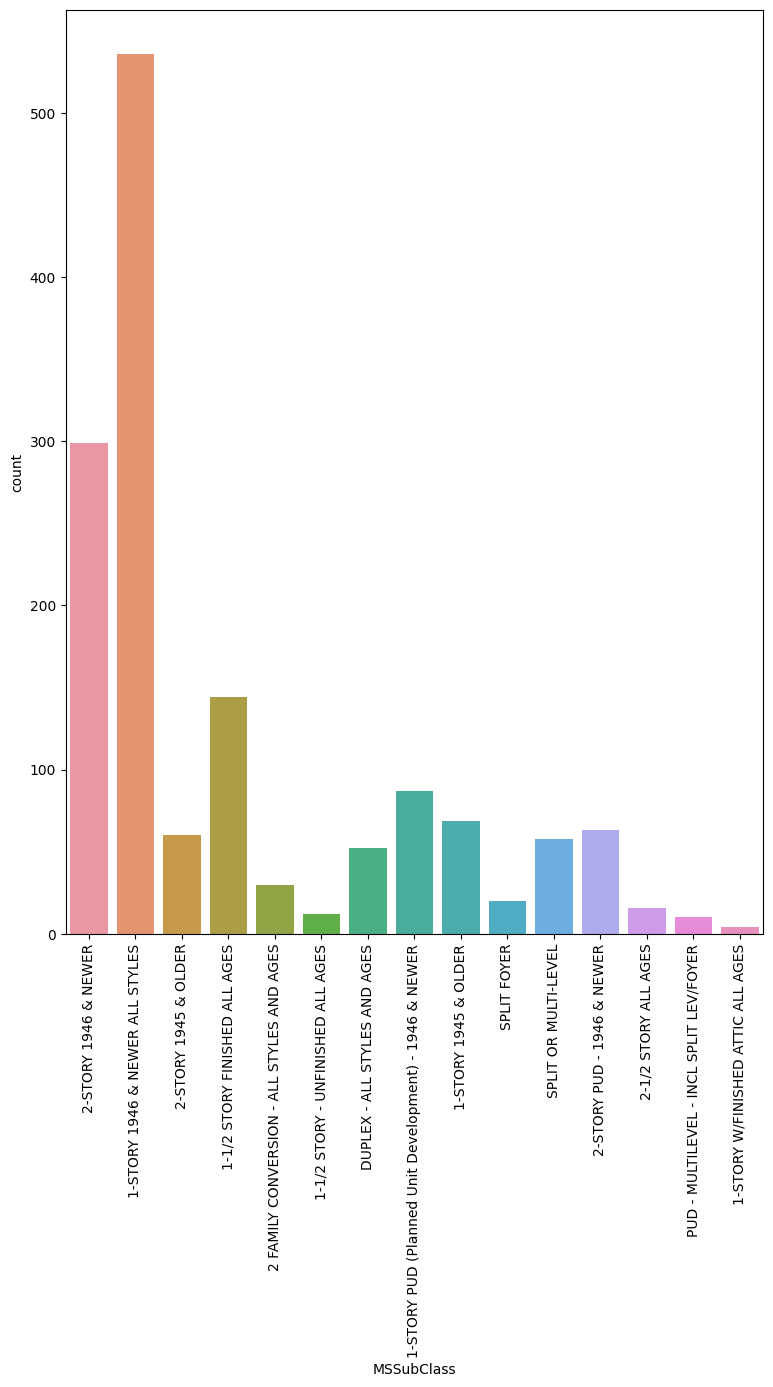

------- COLUMN ---- MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: Int64


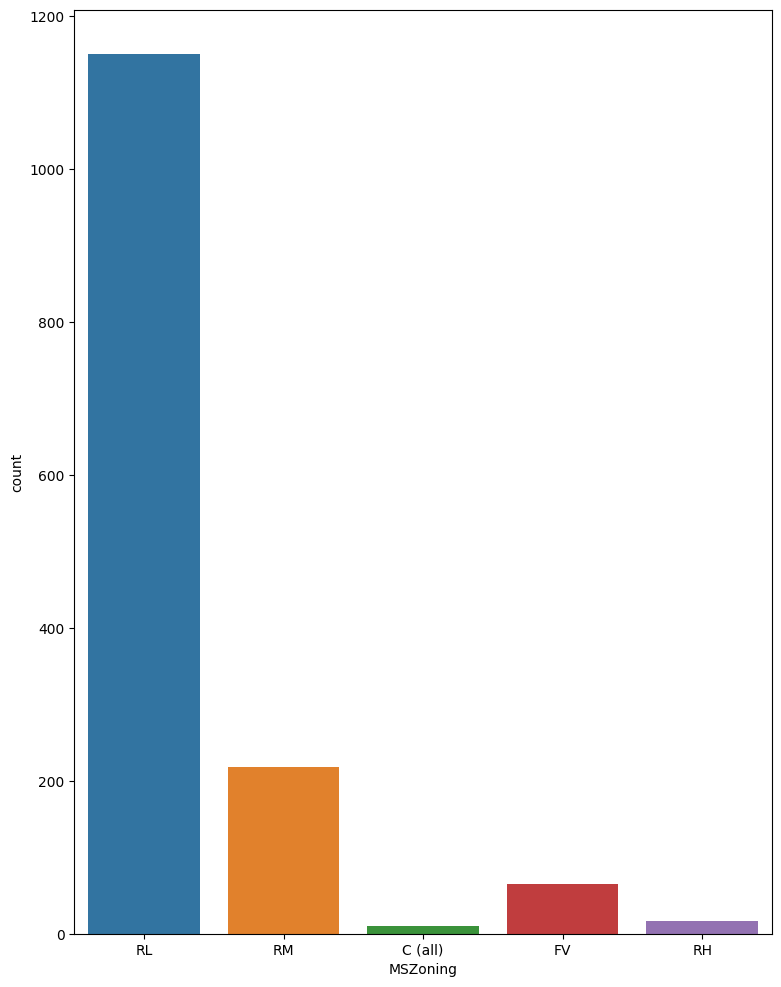

------- COLUMN ---- Street
Pave    1454
Grvl       6
Name: Street, dtype: Int64


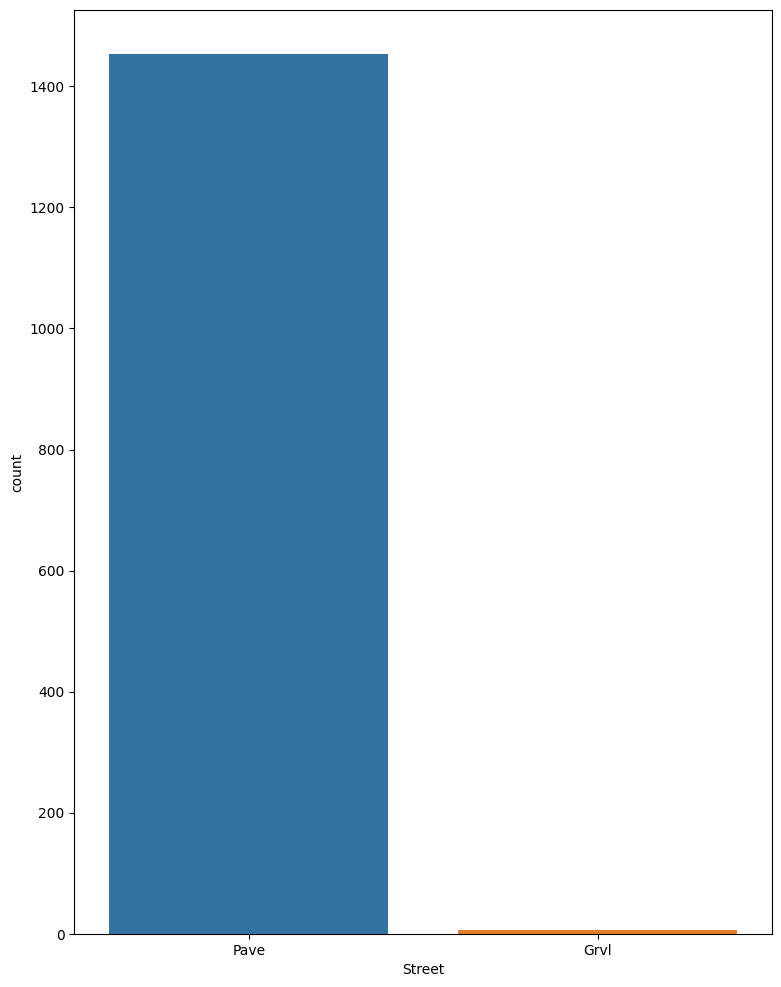

------- COLUMN ---- Alley
NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: Int64


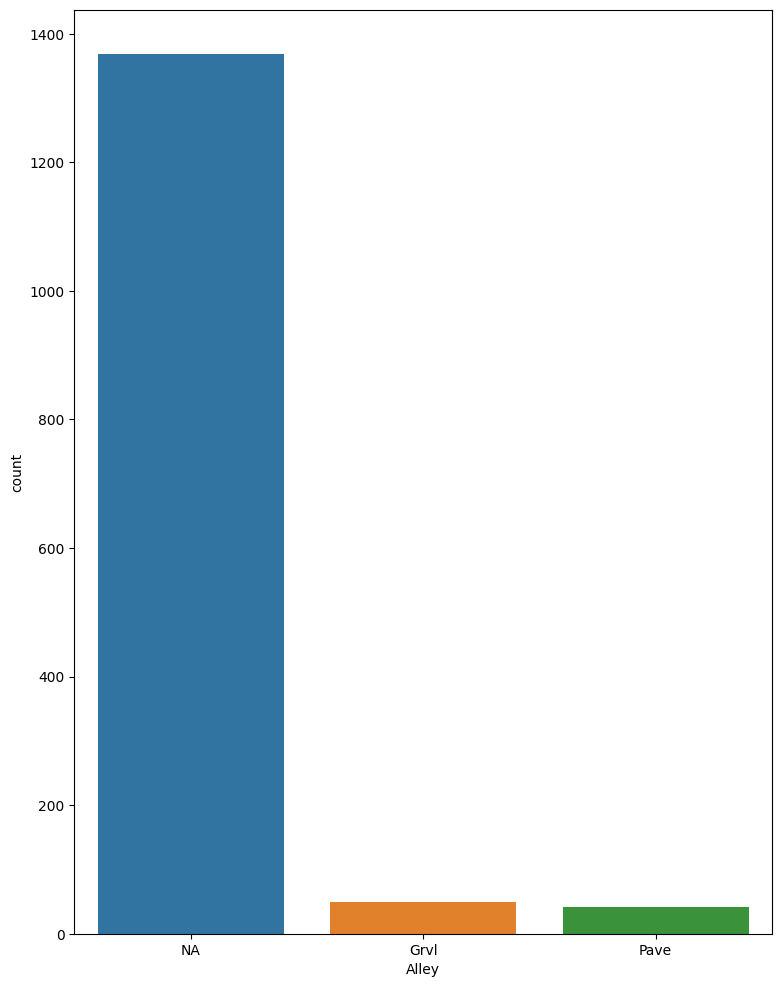

------- COLUMN ---- LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: Int64


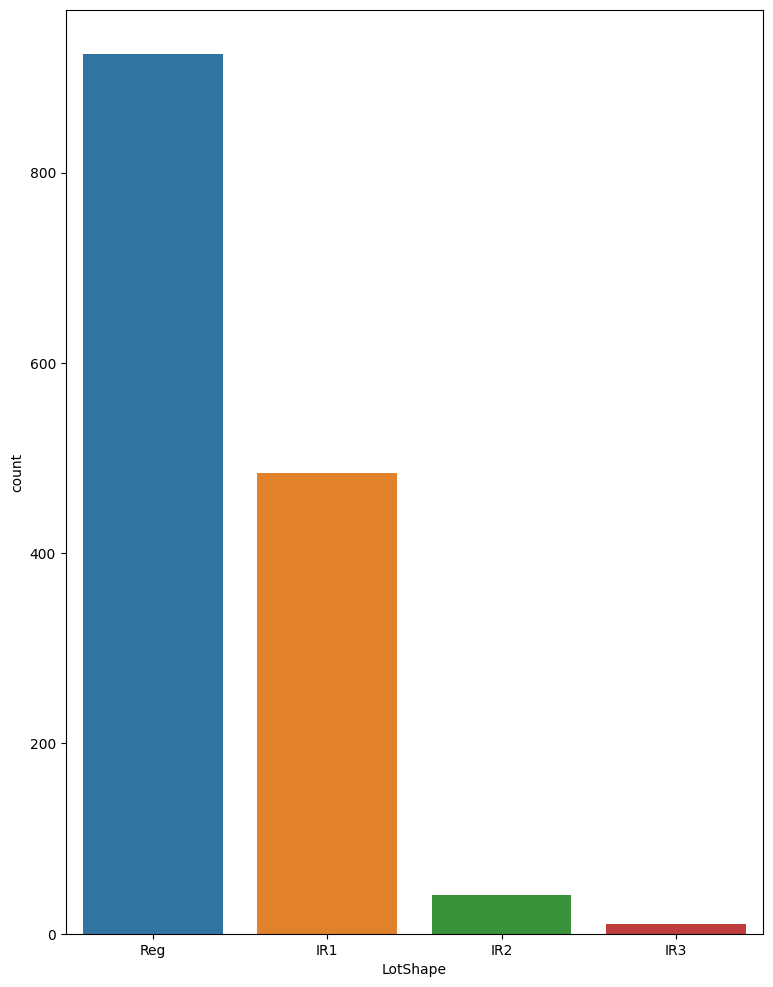

------- COLUMN ---- LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: Int64


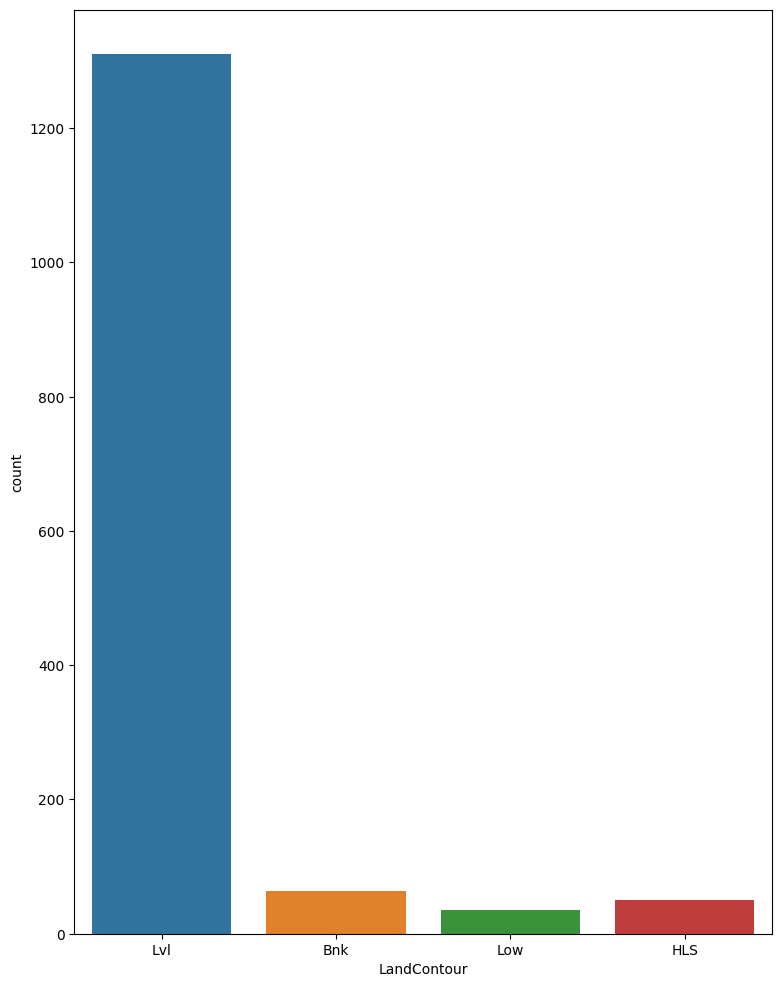

------- COLUMN ---- Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: Int64


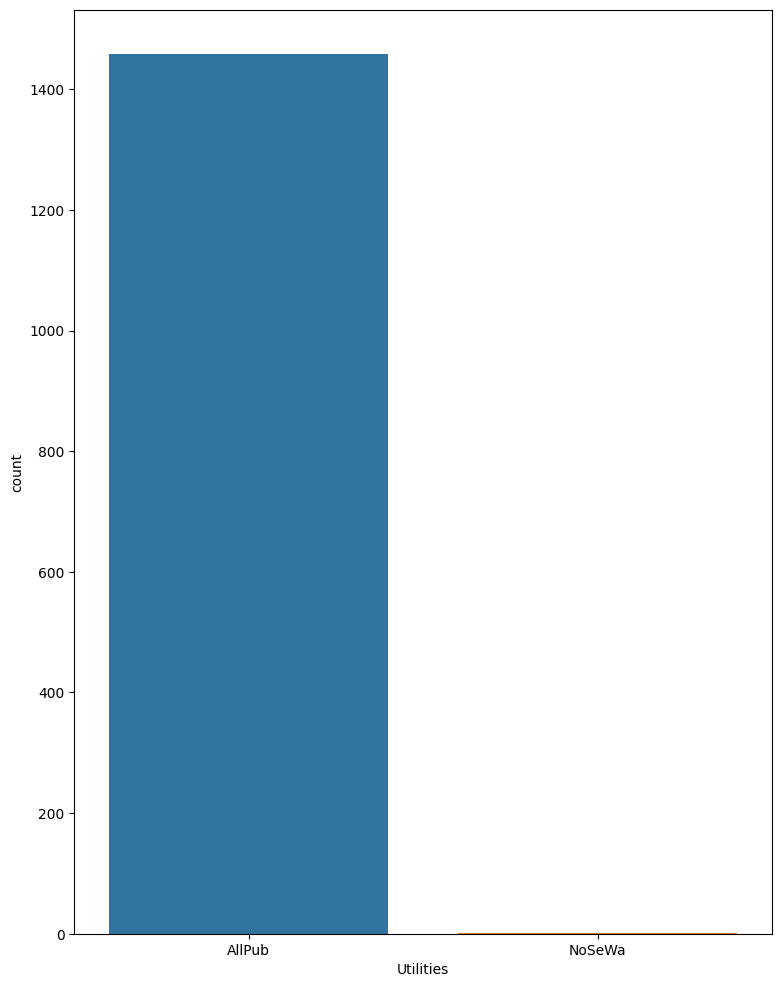

------- COLUMN ---- LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: Int64


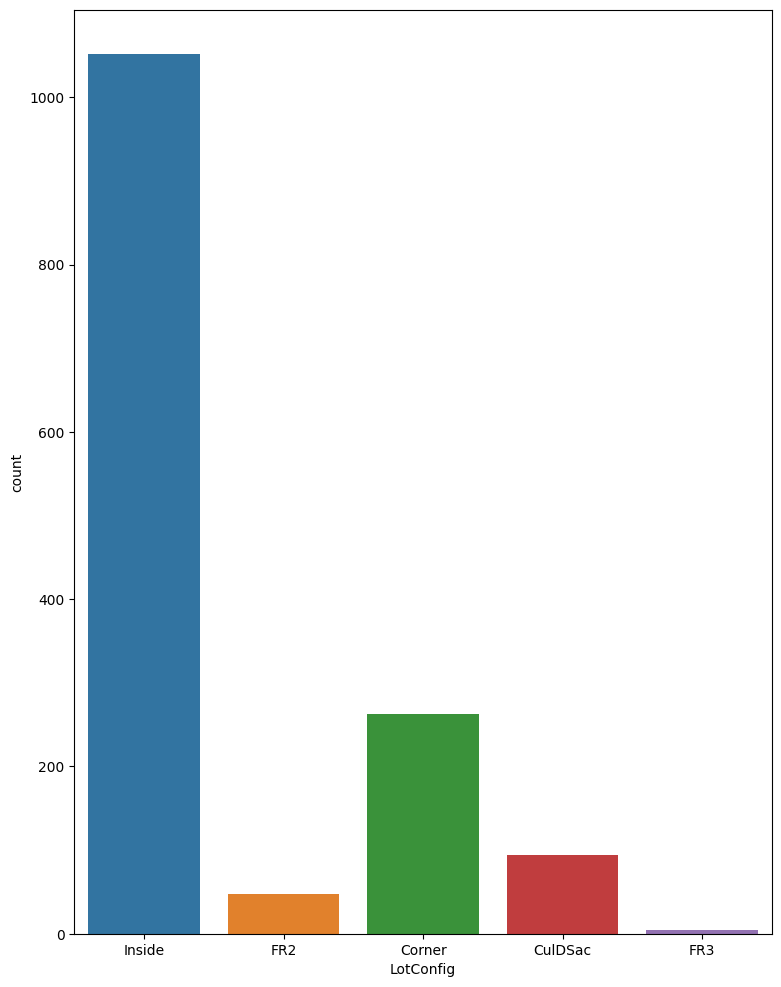

------- COLUMN ---- LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: Int64


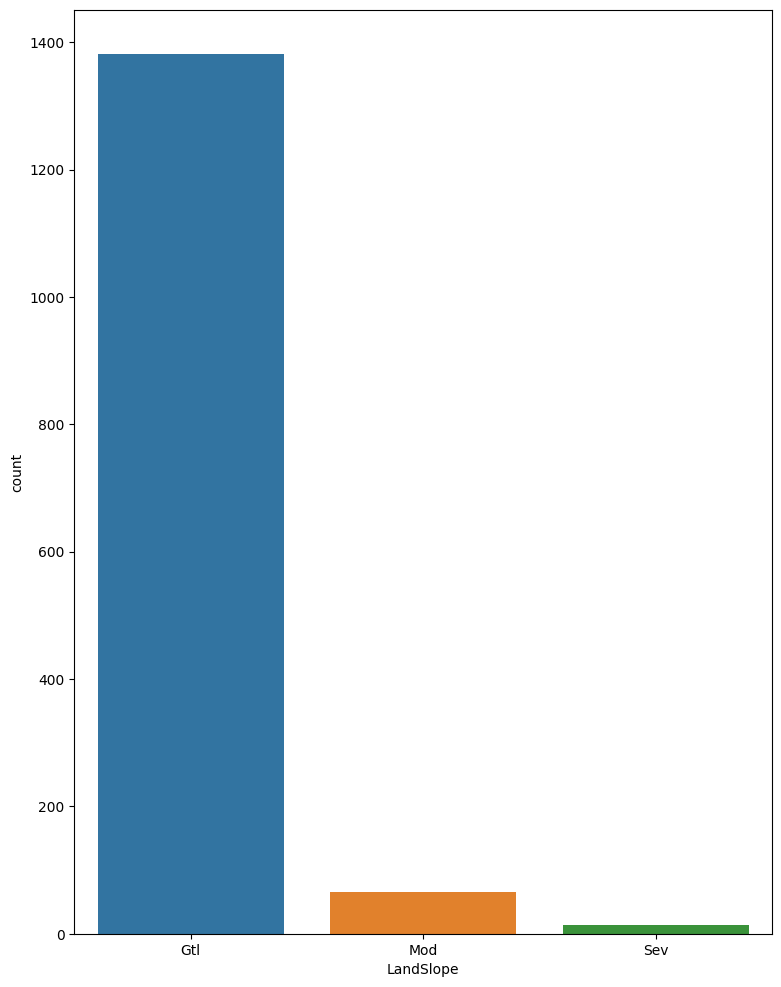

------- COLUMN ---- Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: Int64


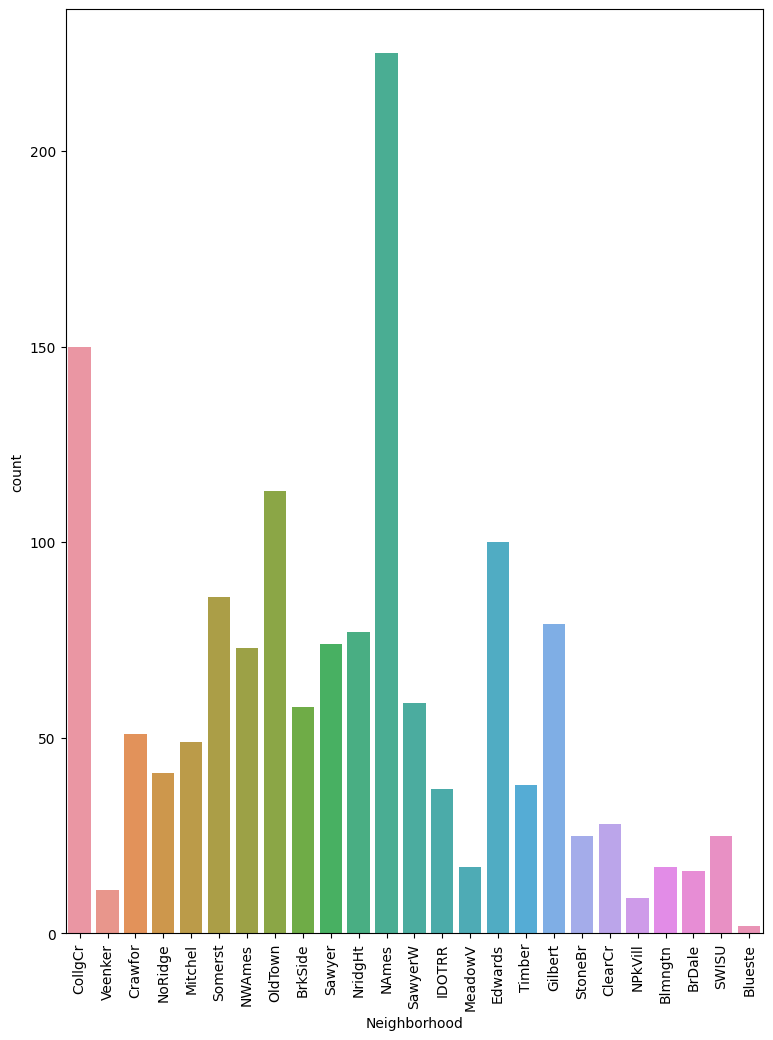

------- COLUMN ---- Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: Int64


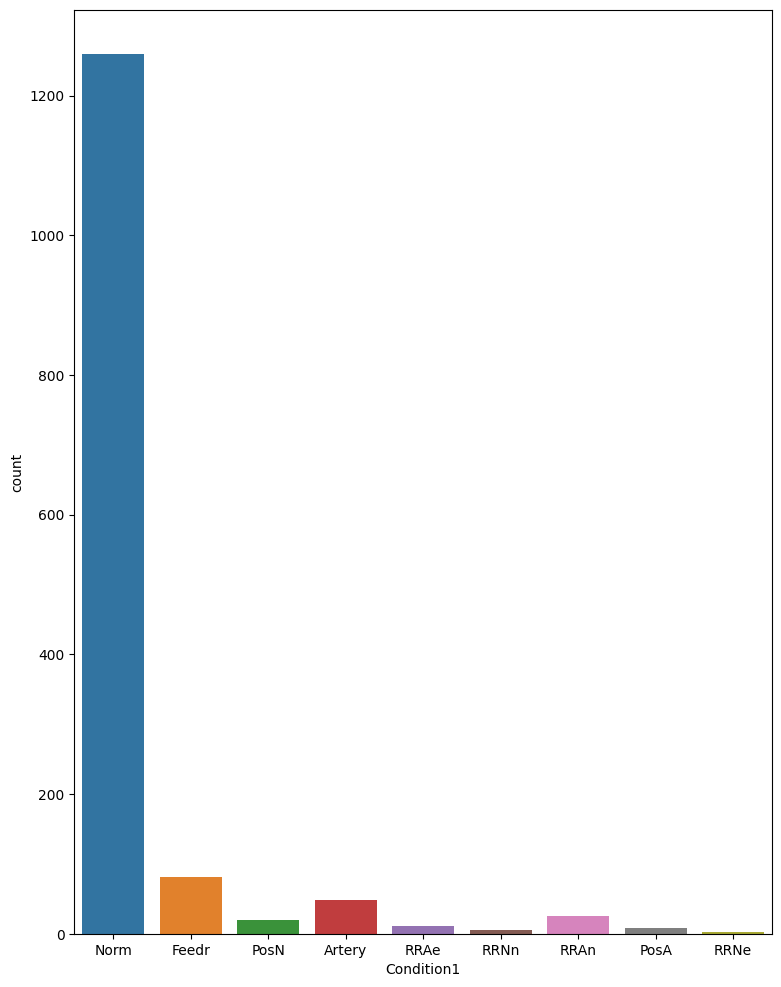

------- COLUMN ---- Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: Int64


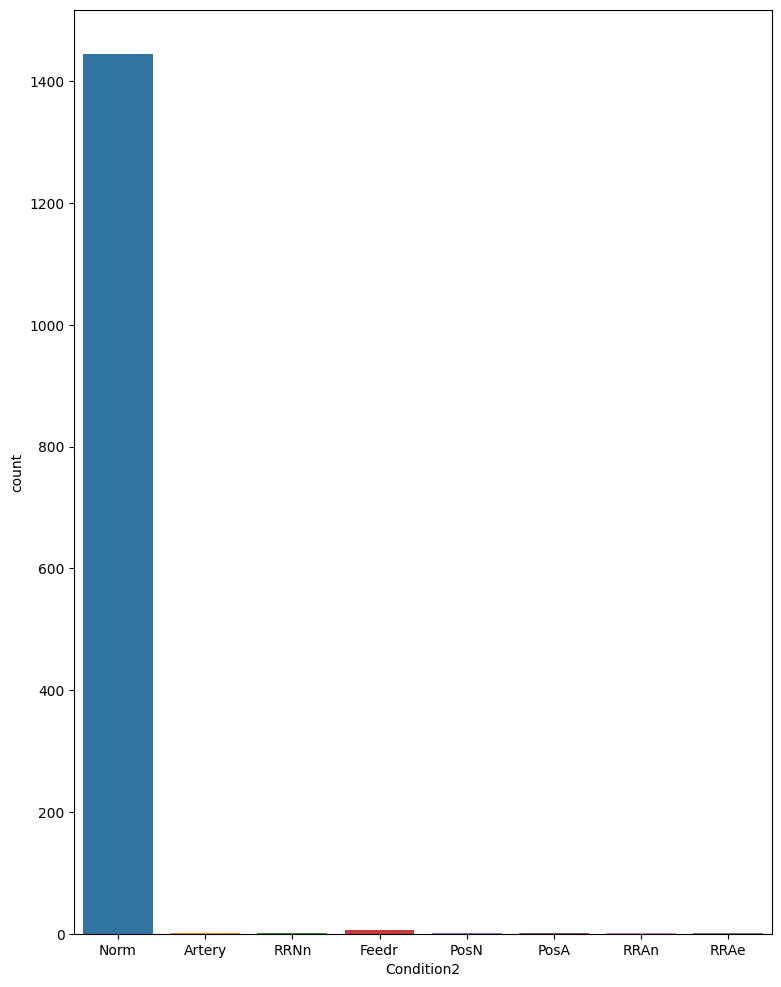

------- COLUMN ---- BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: Int64


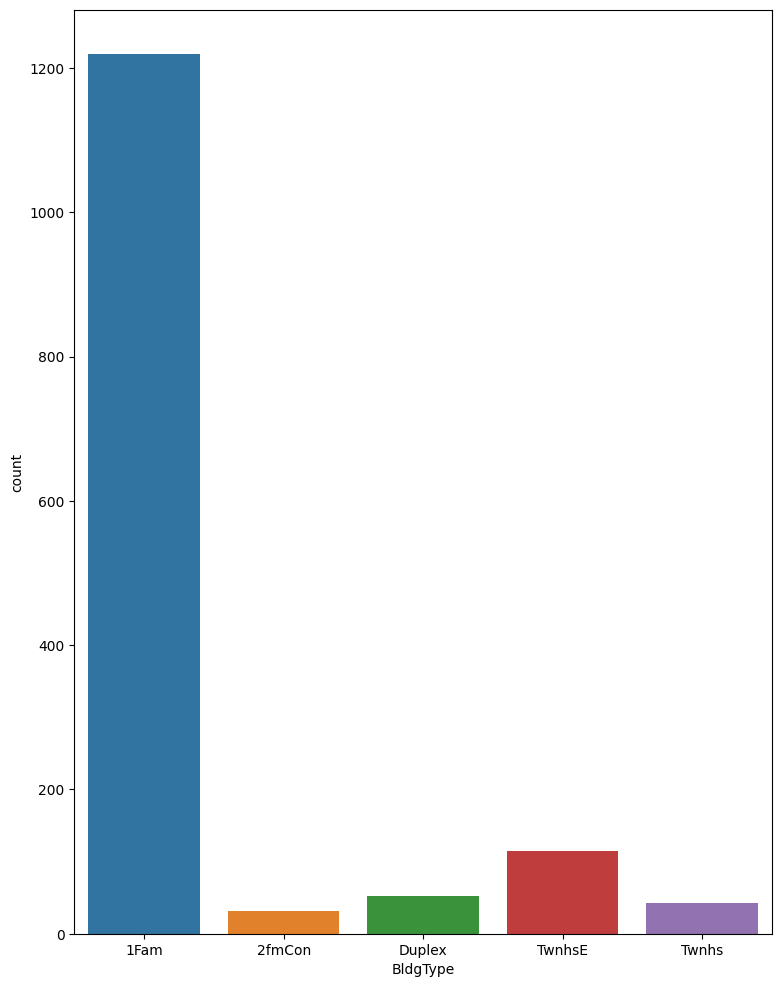

------- COLUMN ---- HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: Int64


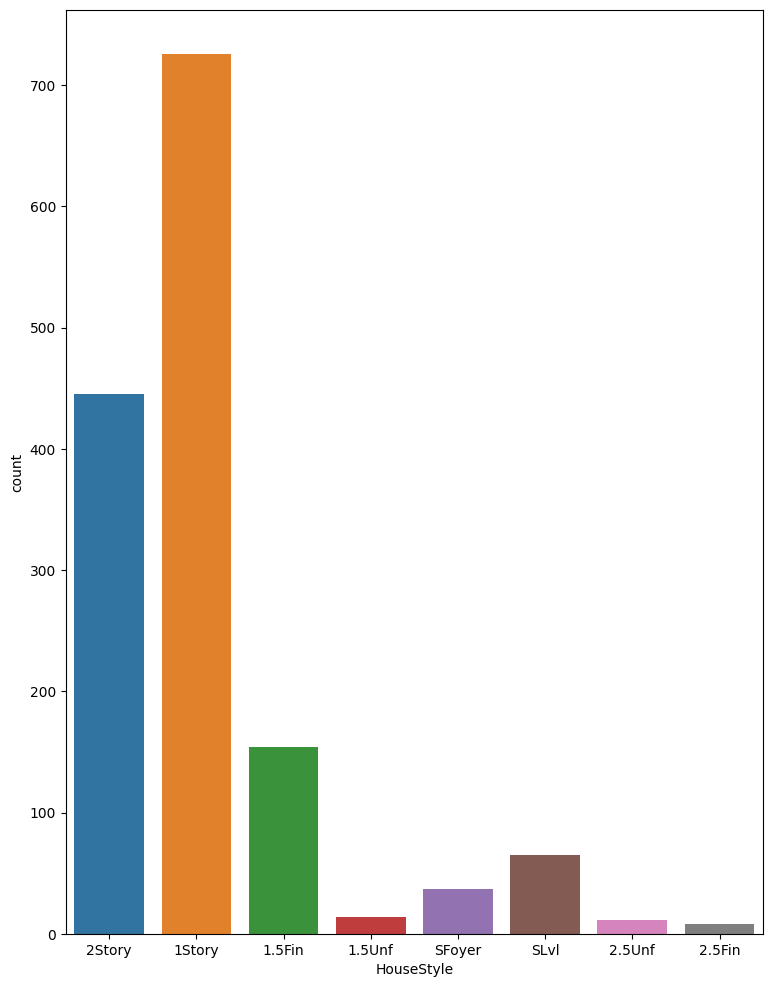

------- COLUMN ---- OverallQual
Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64


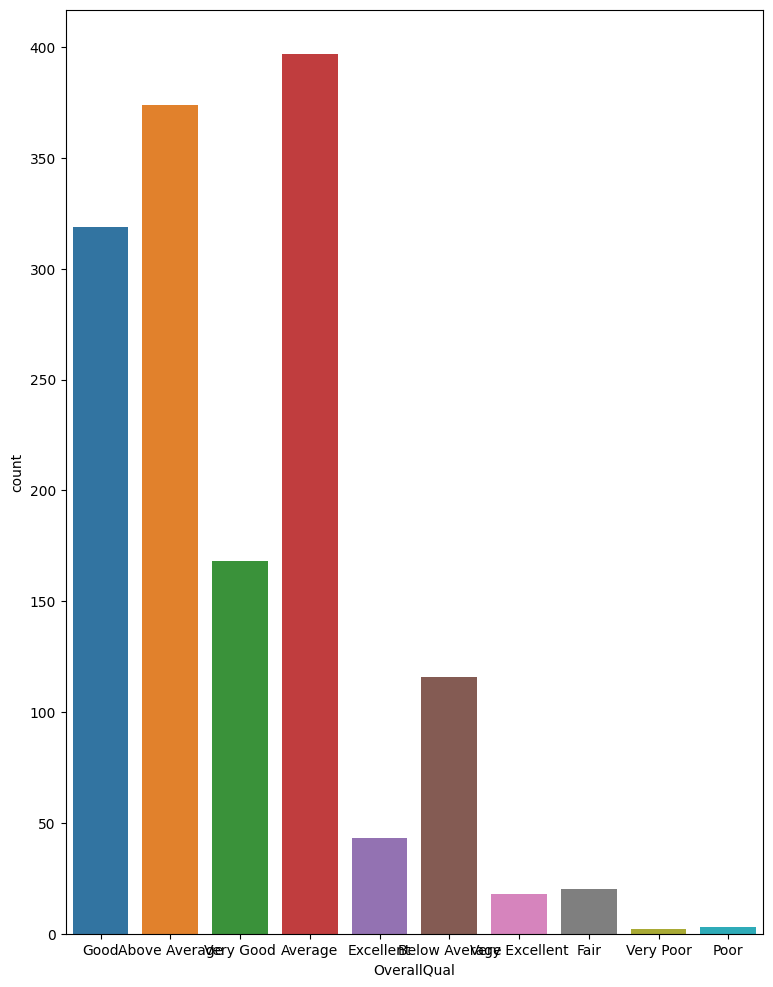

------- COLUMN ---- OverallCond
Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64


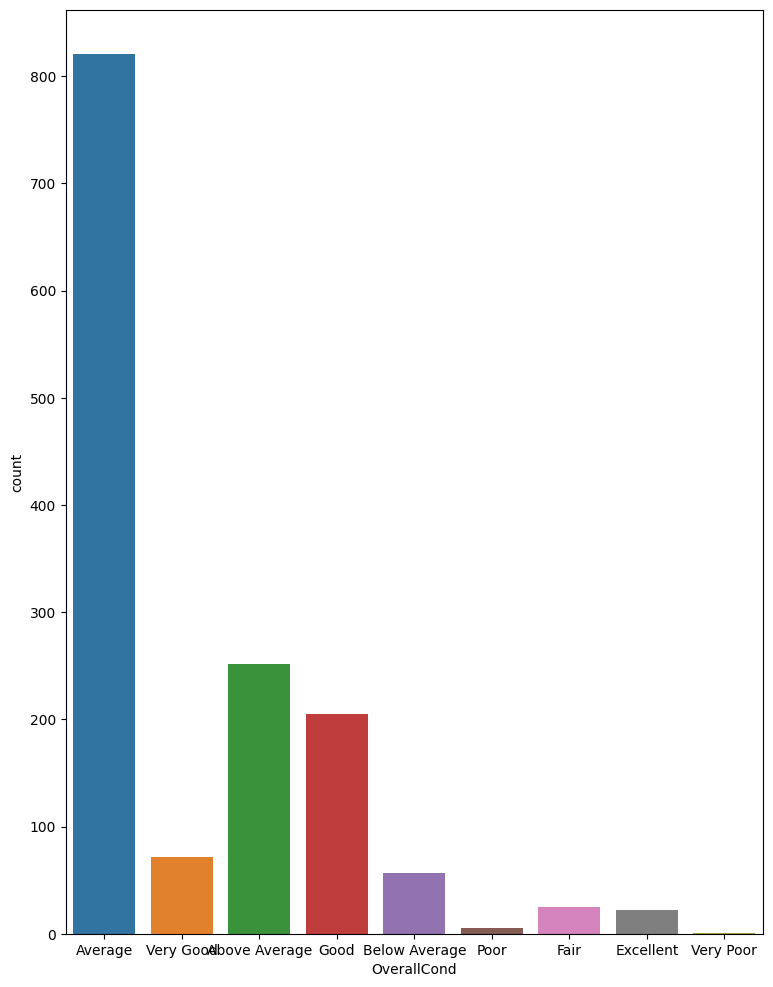

------- COLUMN ---- RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: Int64


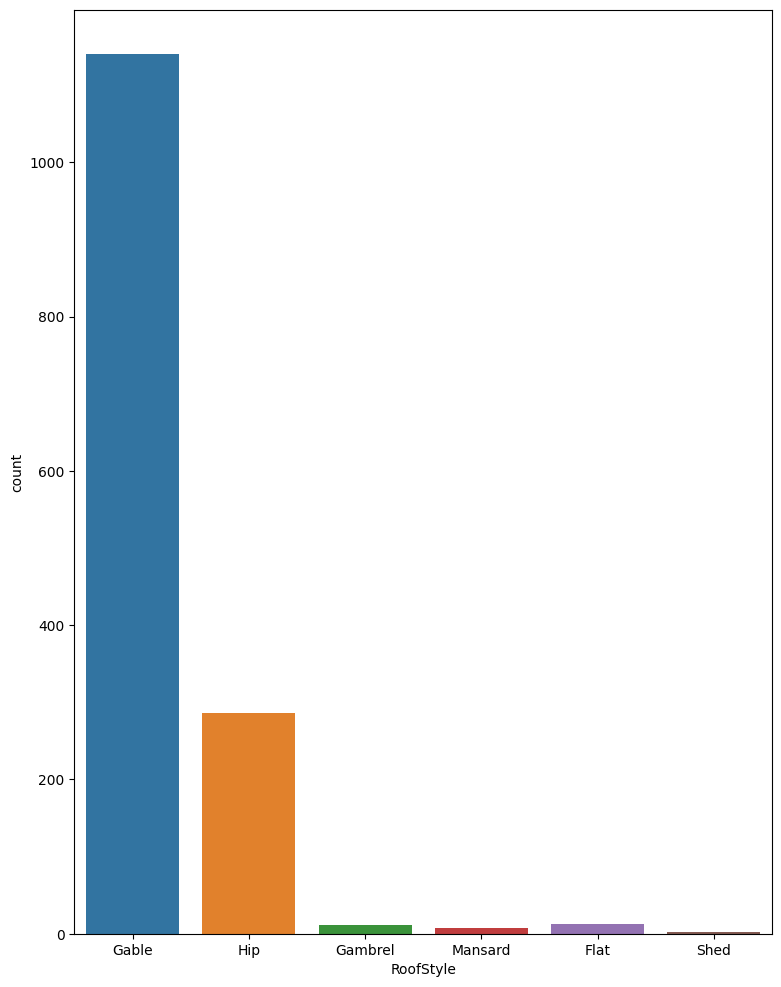

------- COLUMN ---- RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: Int64


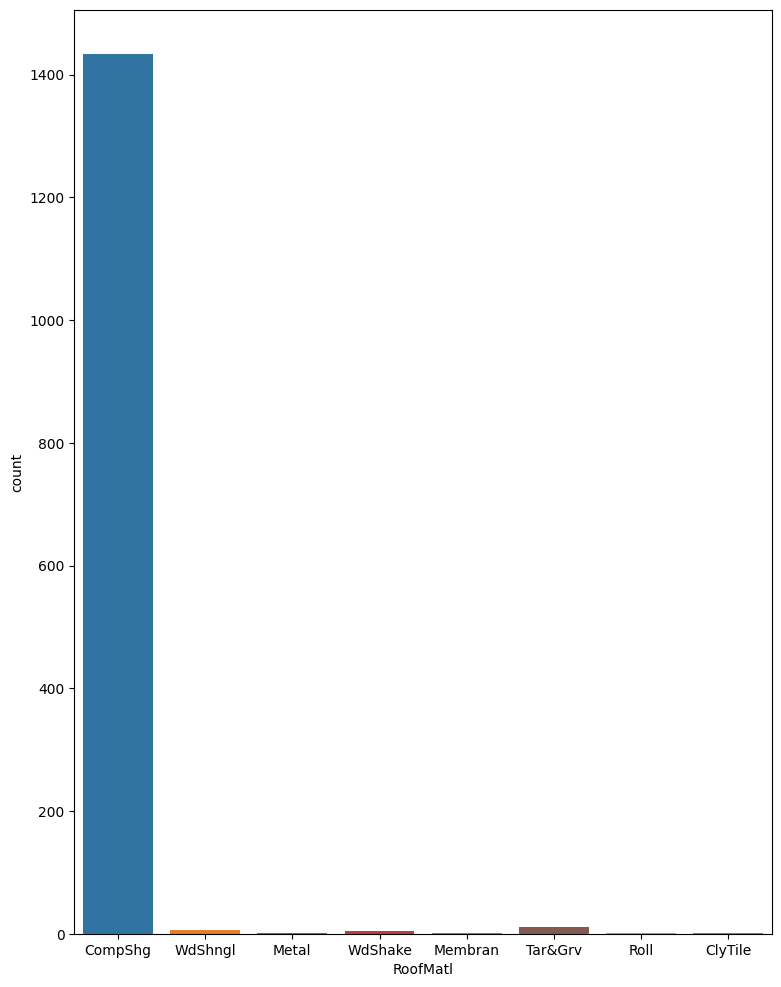

------- COLUMN ---- Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: Int64


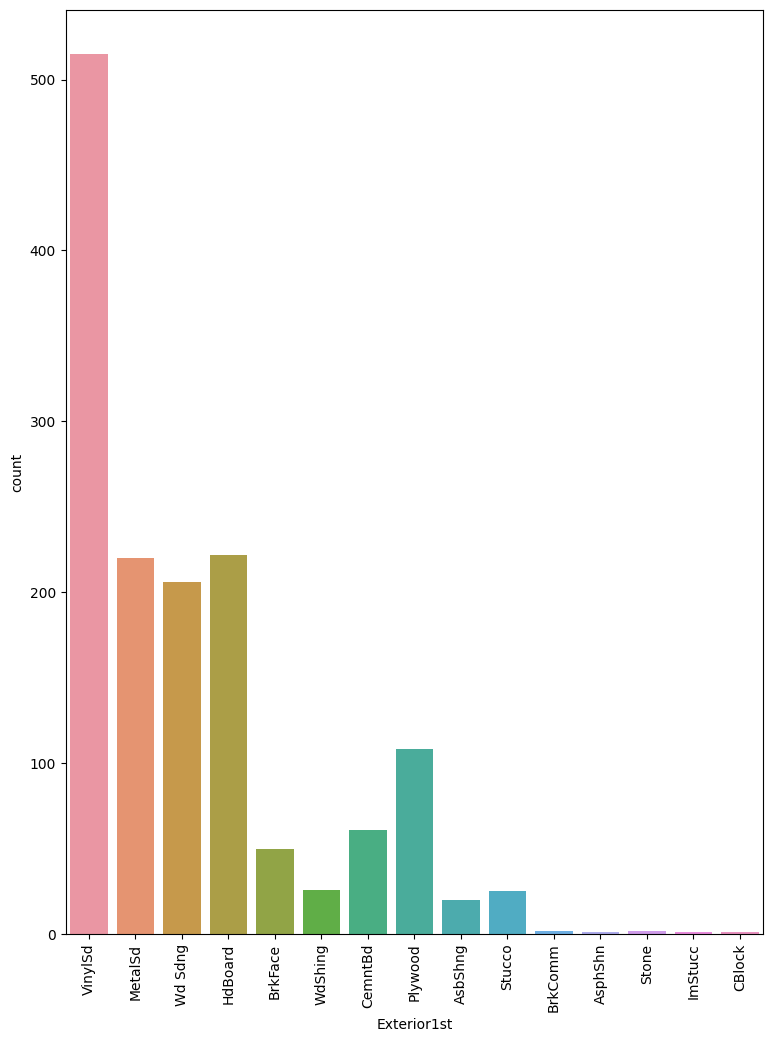

------- COLUMN ---- Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: Int64


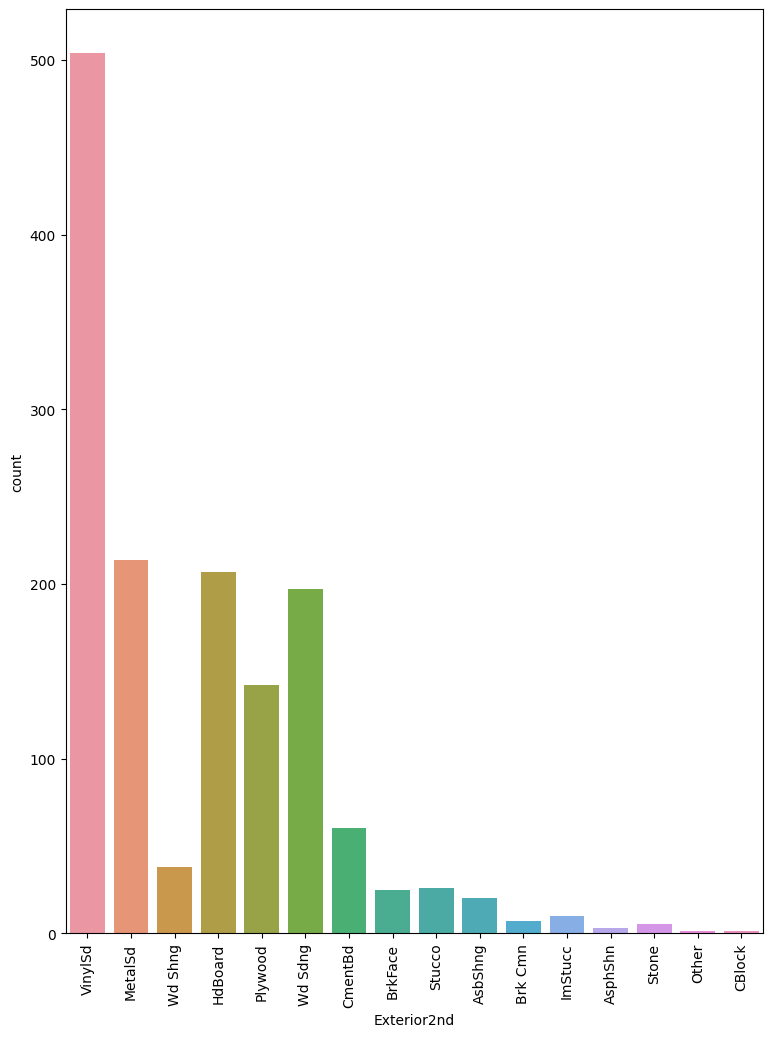

------- COLUMN ---- MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: Int64


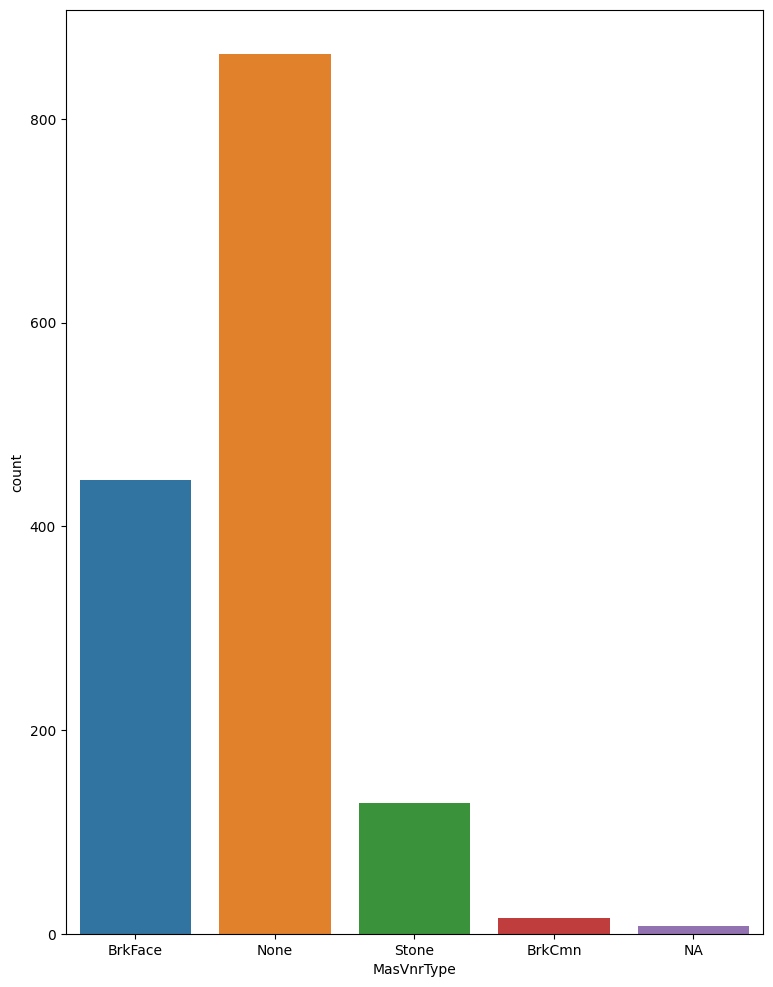

------- COLUMN ---- ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: Int64


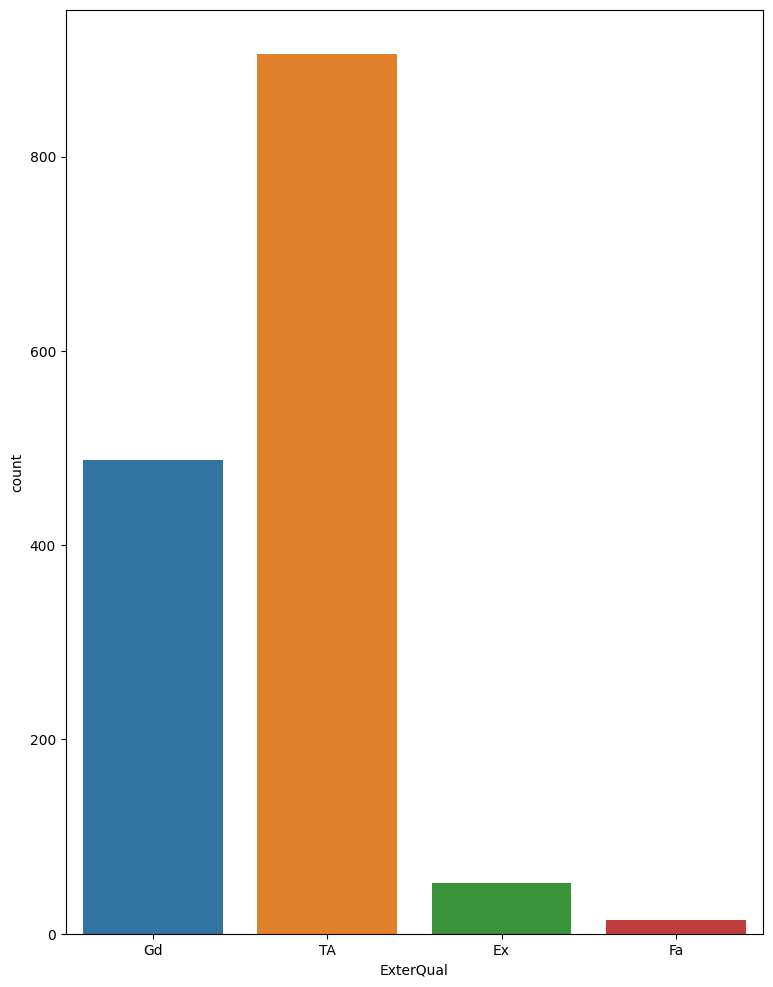

------- COLUMN ---- ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: Int64


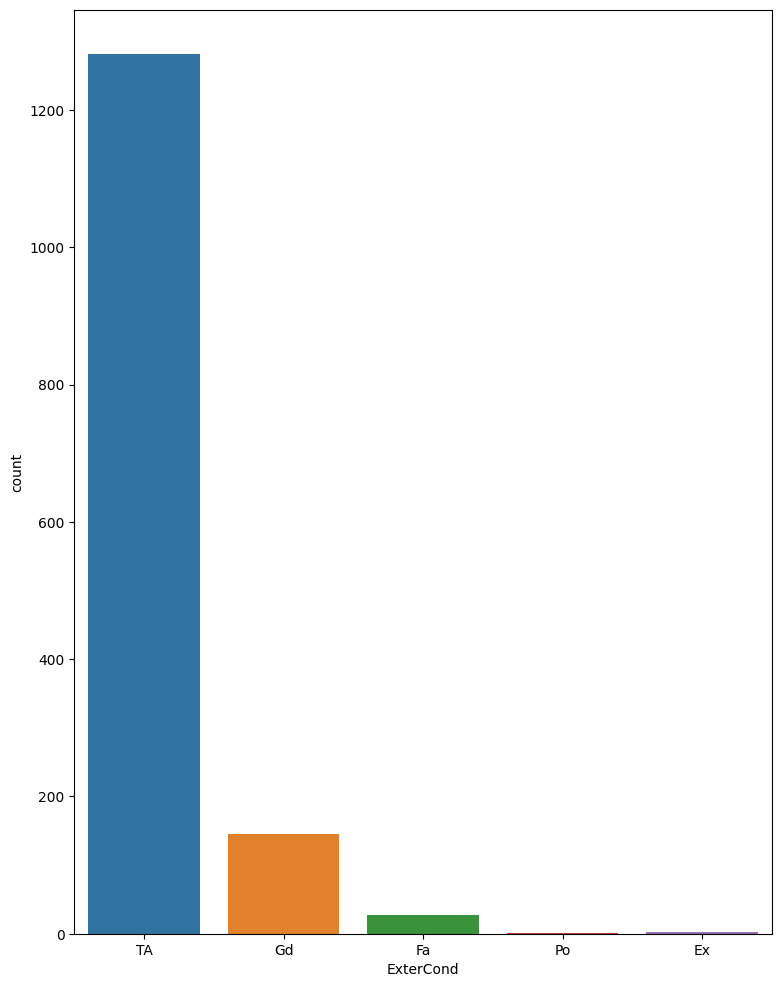

------- COLUMN ---- Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: Int64


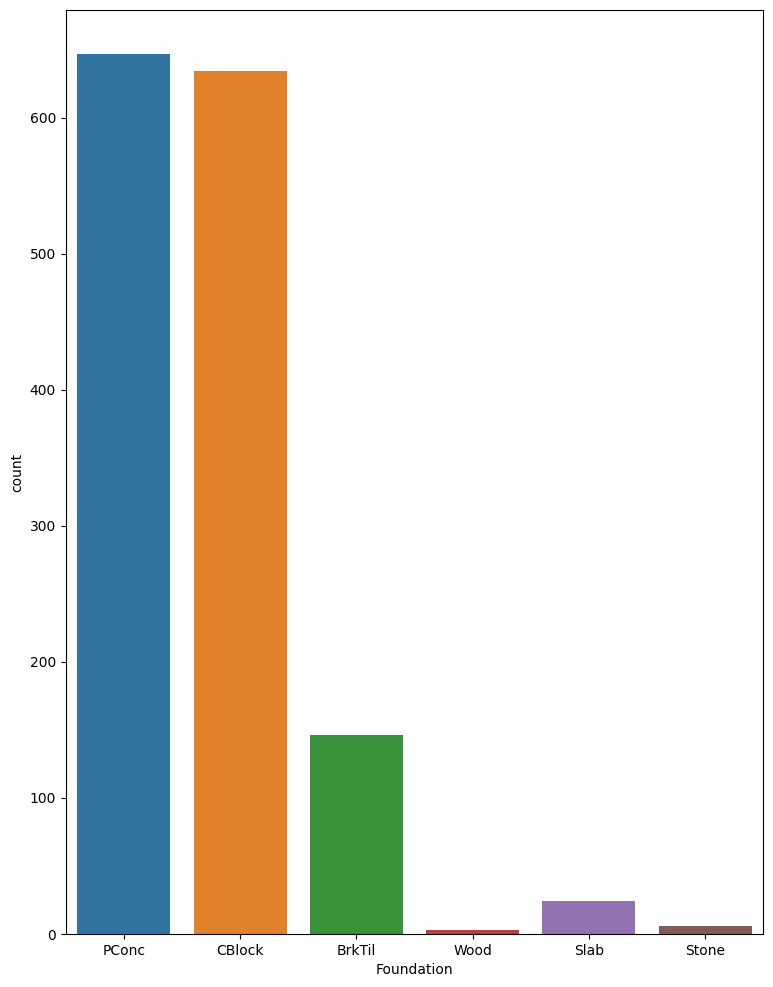

------- COLUMN ---- BsmtQual
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: Int64


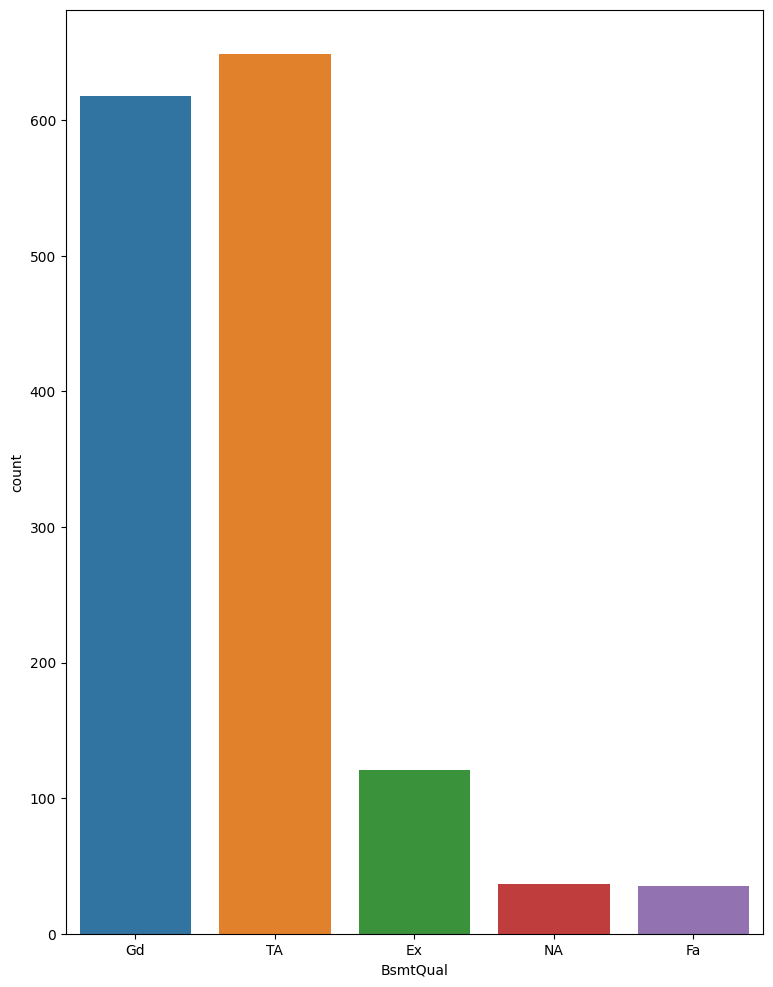

------- COLUMN ---- BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: Int64


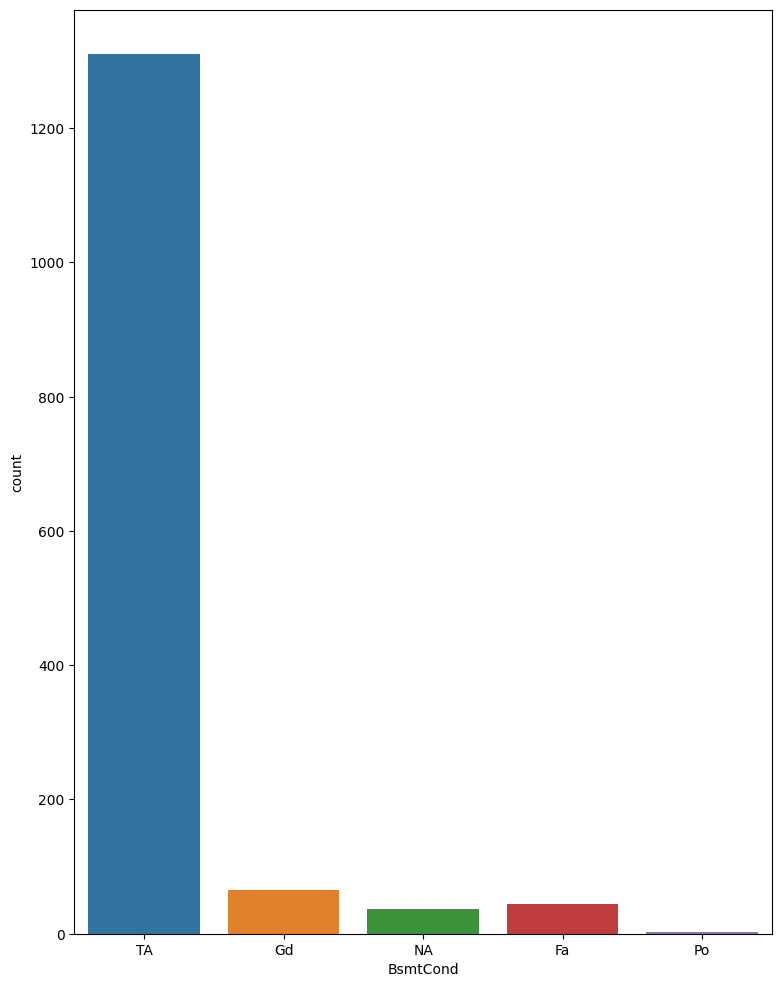

------- COLUMN ---- BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: Int64


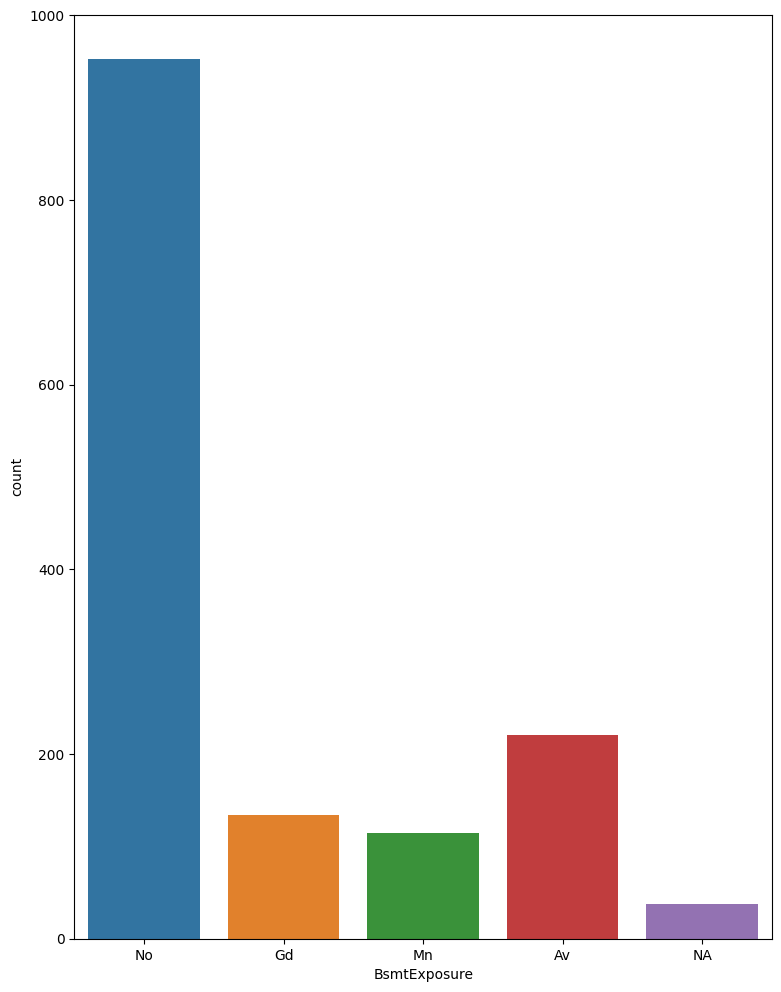

------- COLUMN ---- BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: Int64


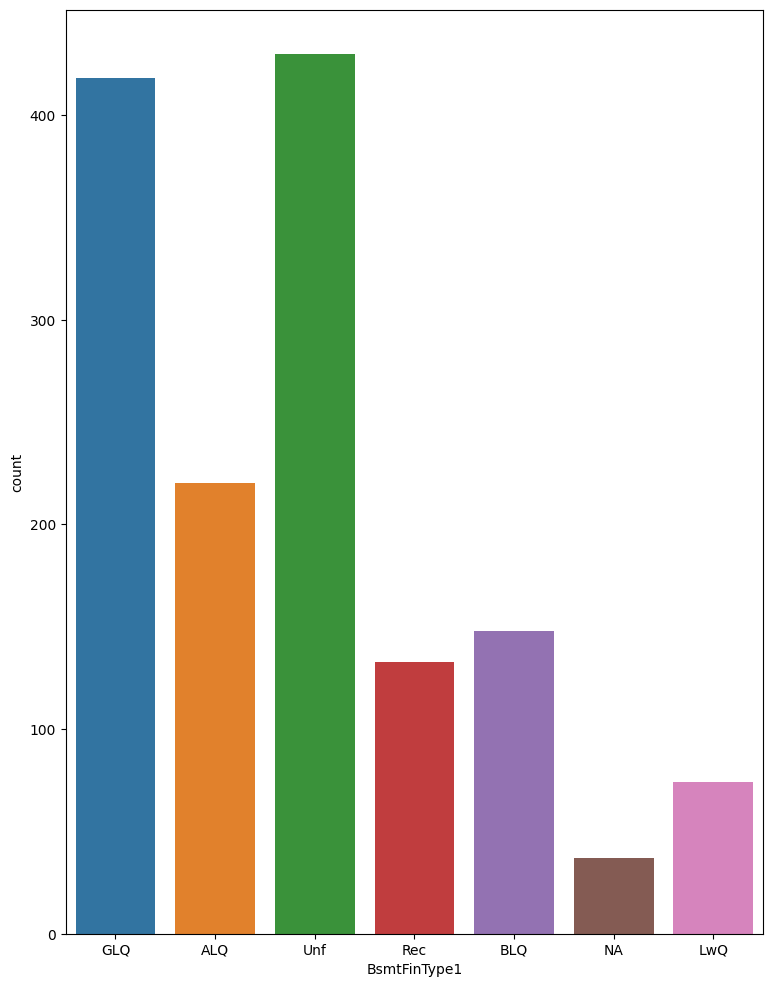

------- COLUMN ---- BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: Int64


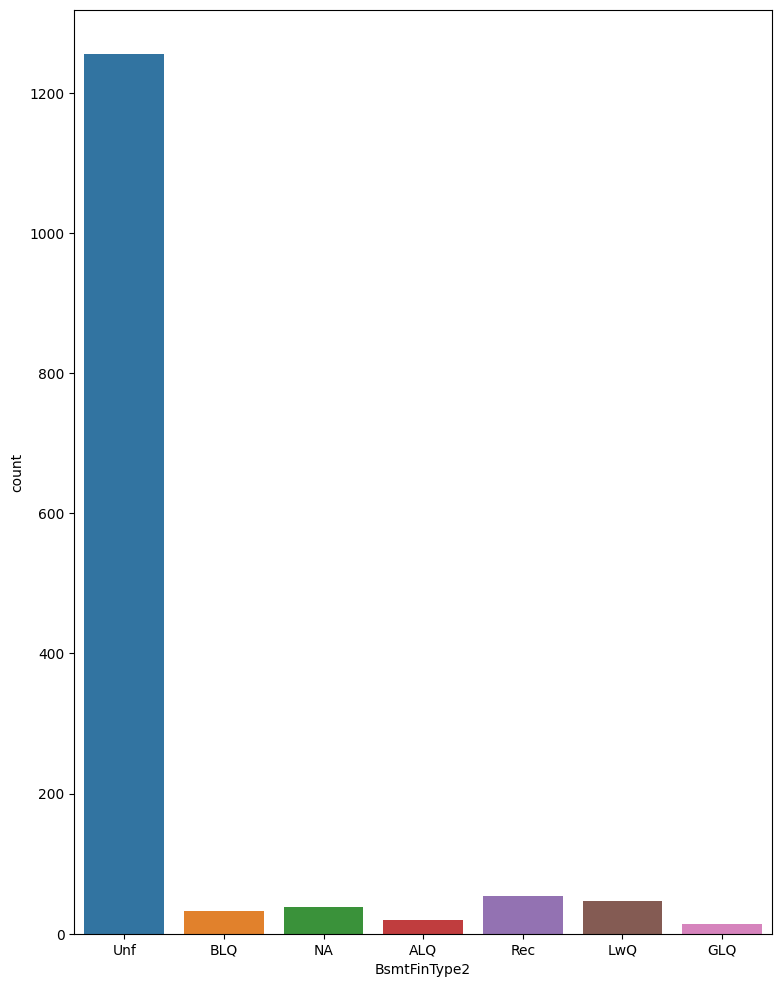

------- COLUMN ---- Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: Int64


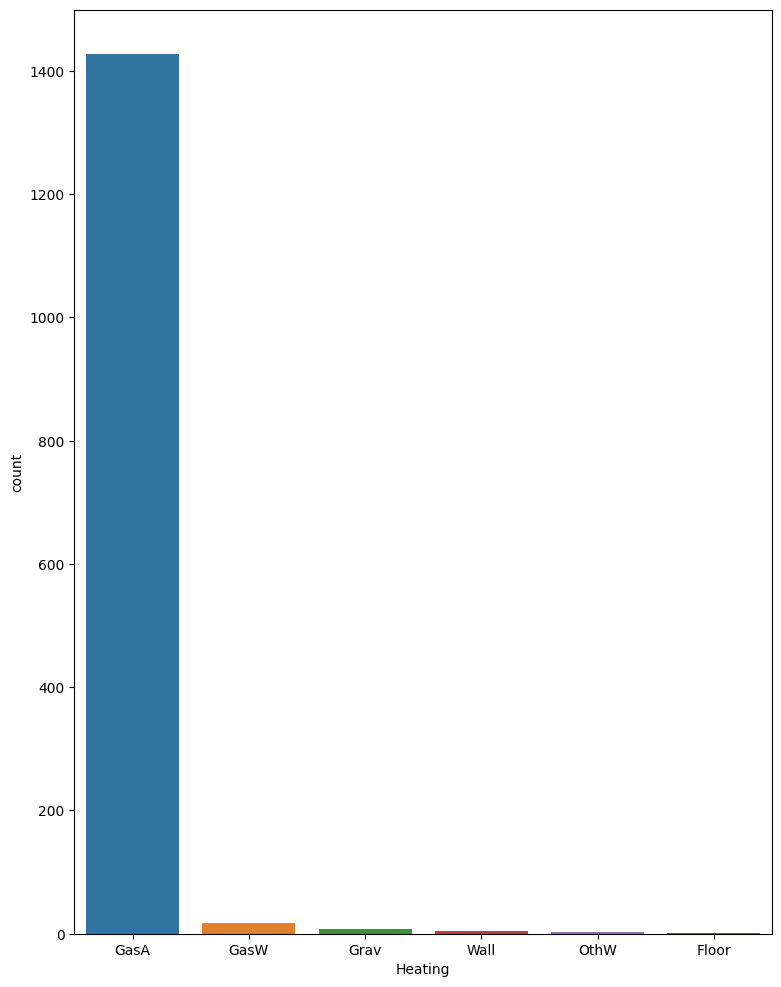

------- COLUMN ---- HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: Int64


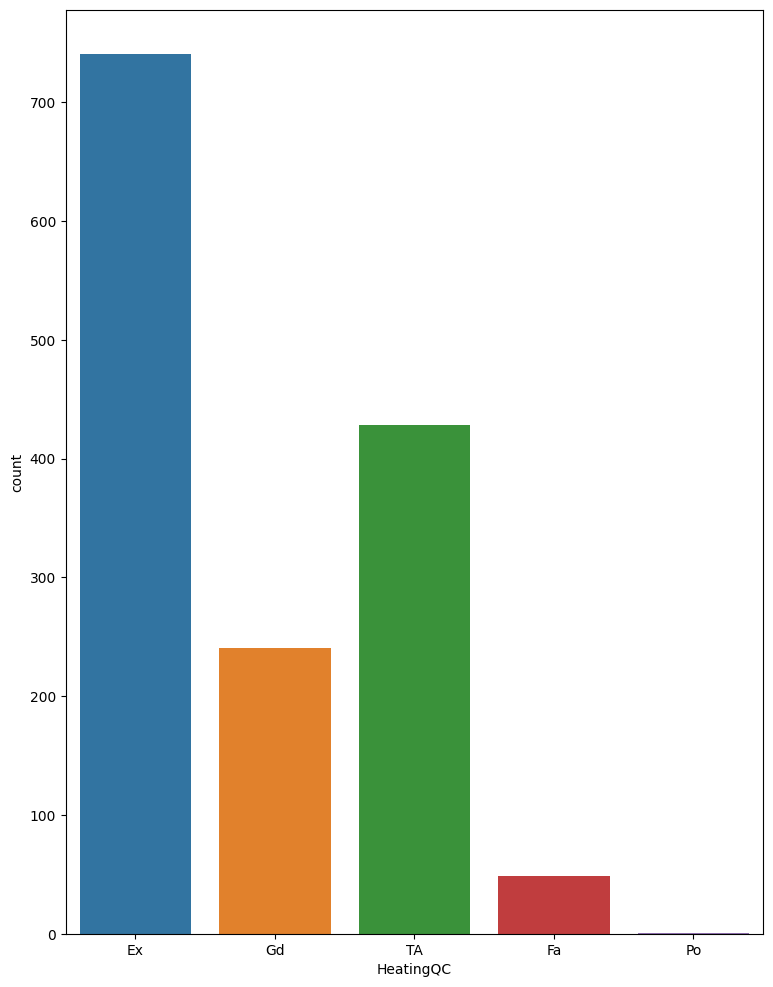

------- COLUMN ---- CentralAir
Y    1365
N      95
Name: CentralAir, dtype: Int64


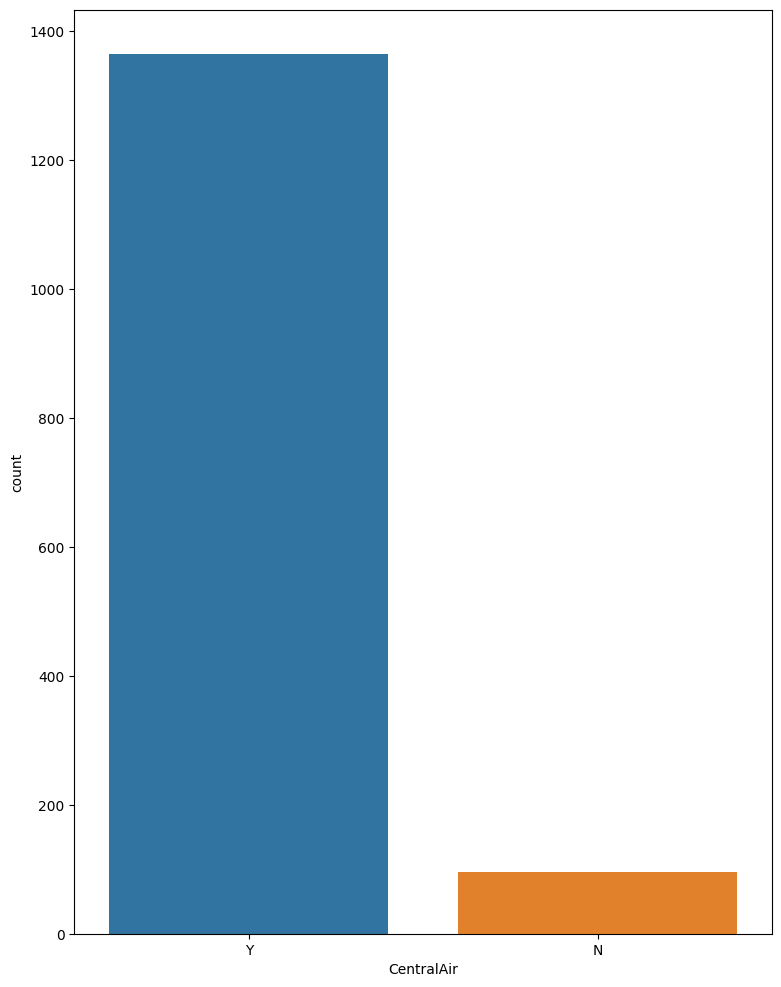

------- COLUMN ---- Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: Int64


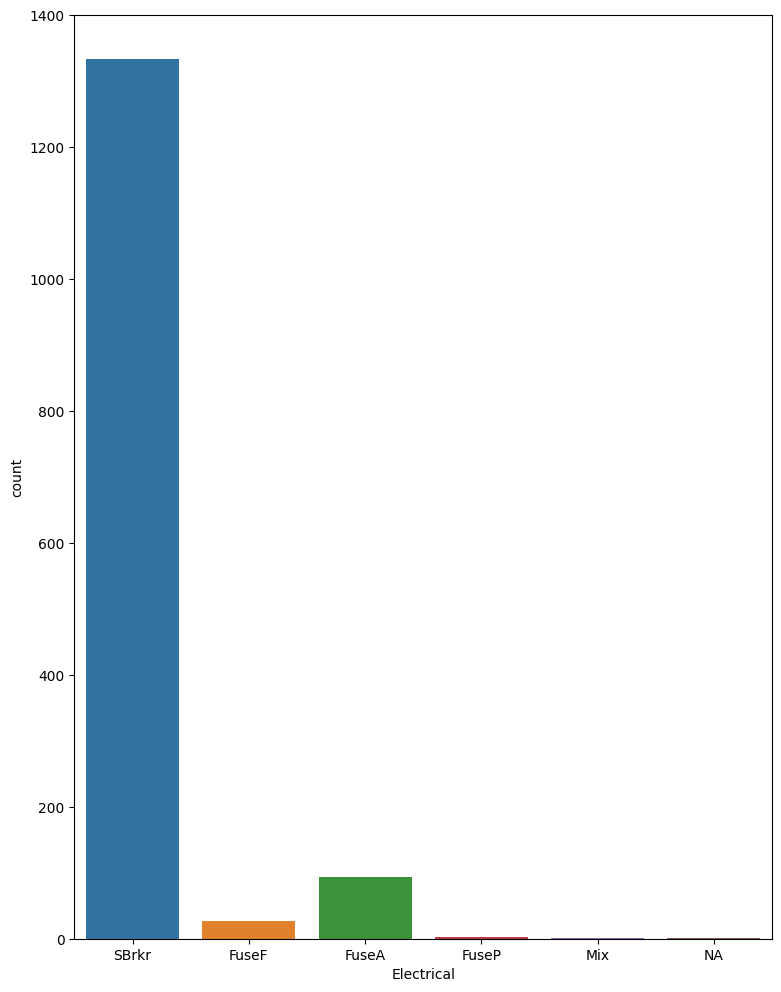

------- COLUMN ---- BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: Int64


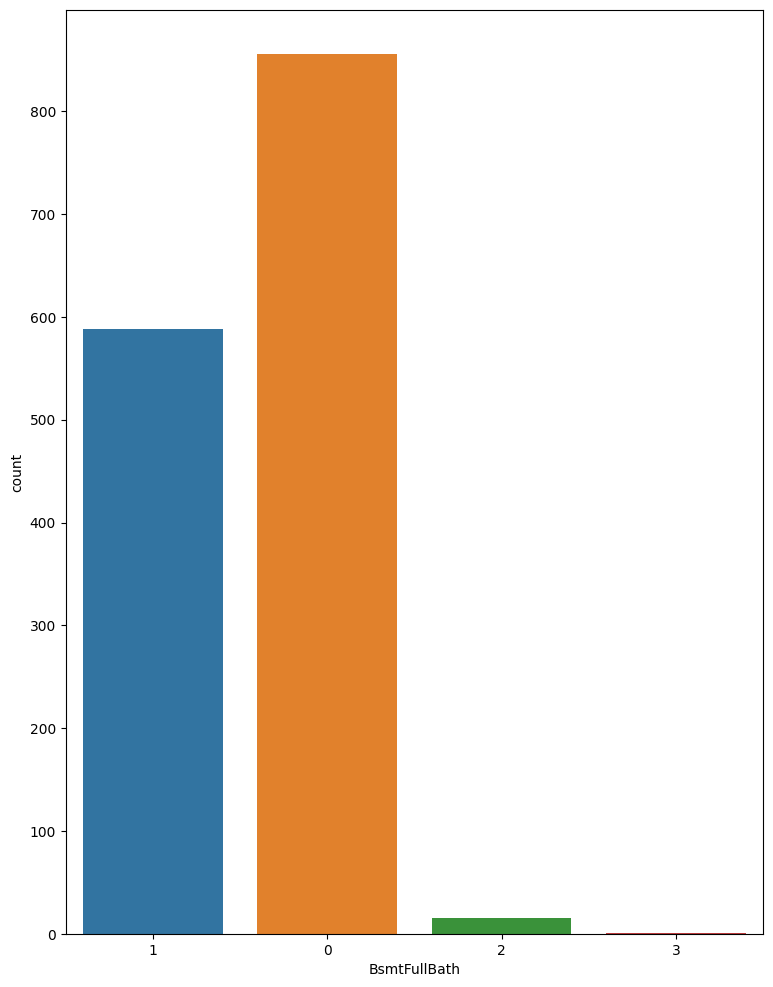

------- COLUMN ---- BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: Int64


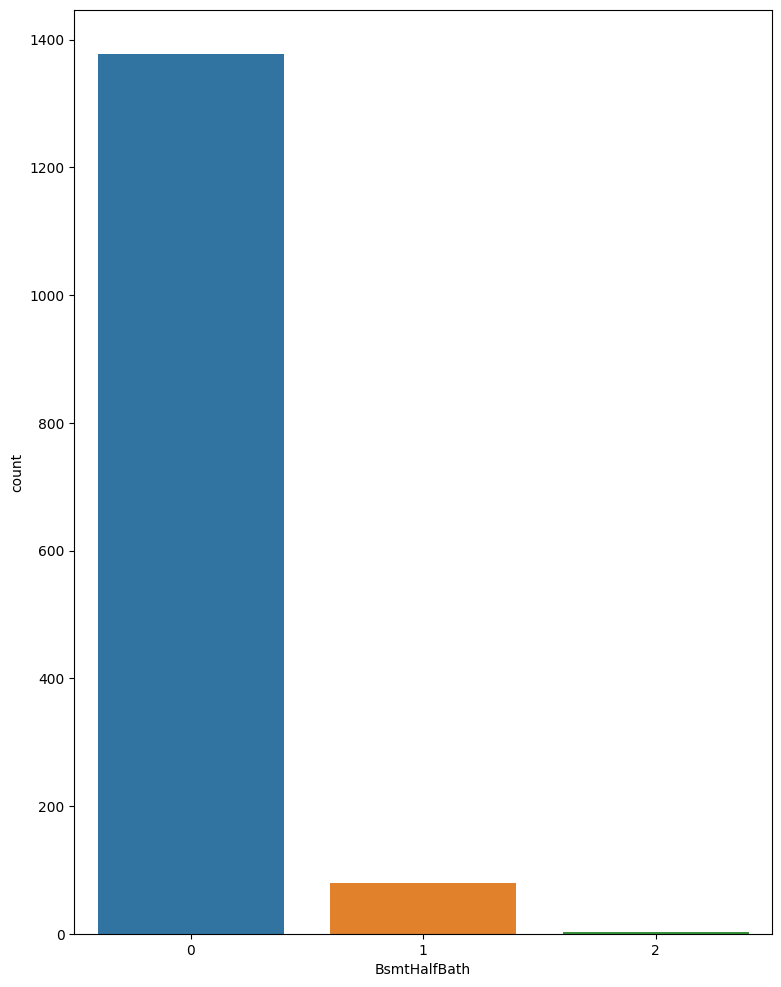

------- COLUMN ---- FullBath
2    768
1    650
3     33
0      9
Name: FullBath, dtype: Int64


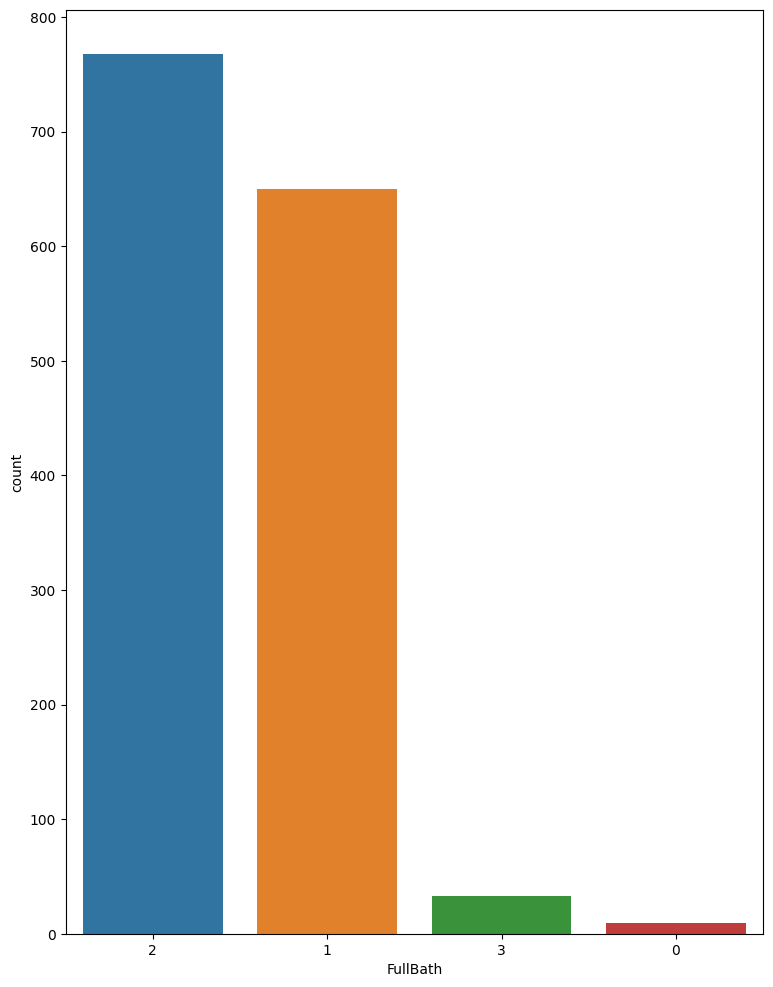

------- COLUMN ---- HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: Int64


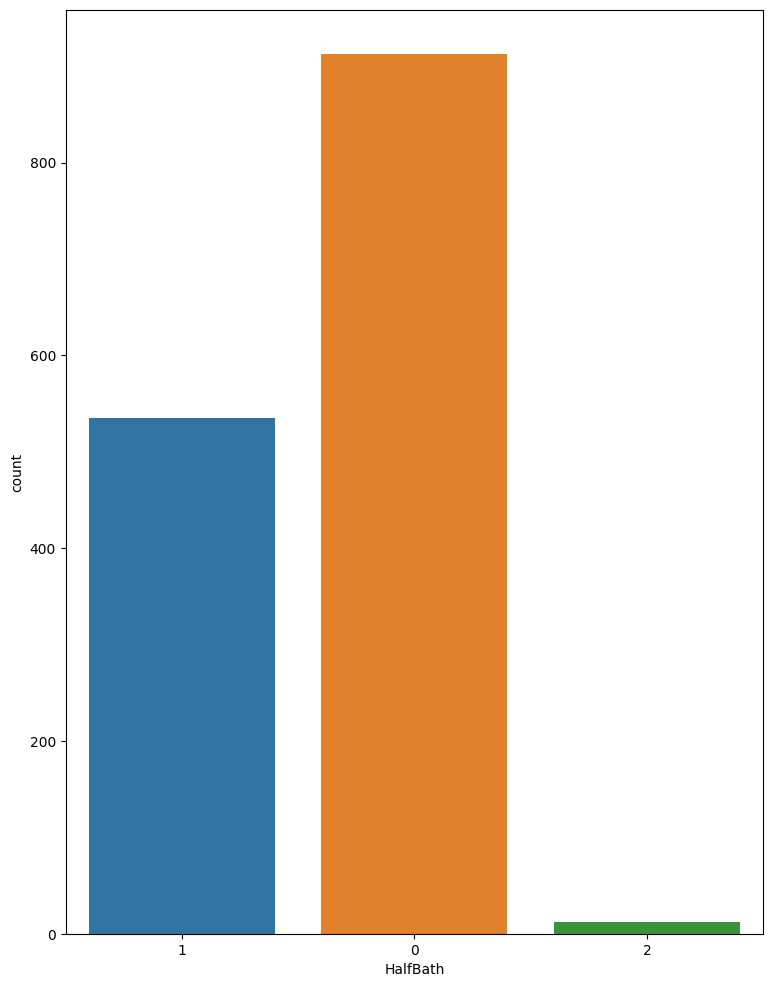

------- COLUMN ---- BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: Int64


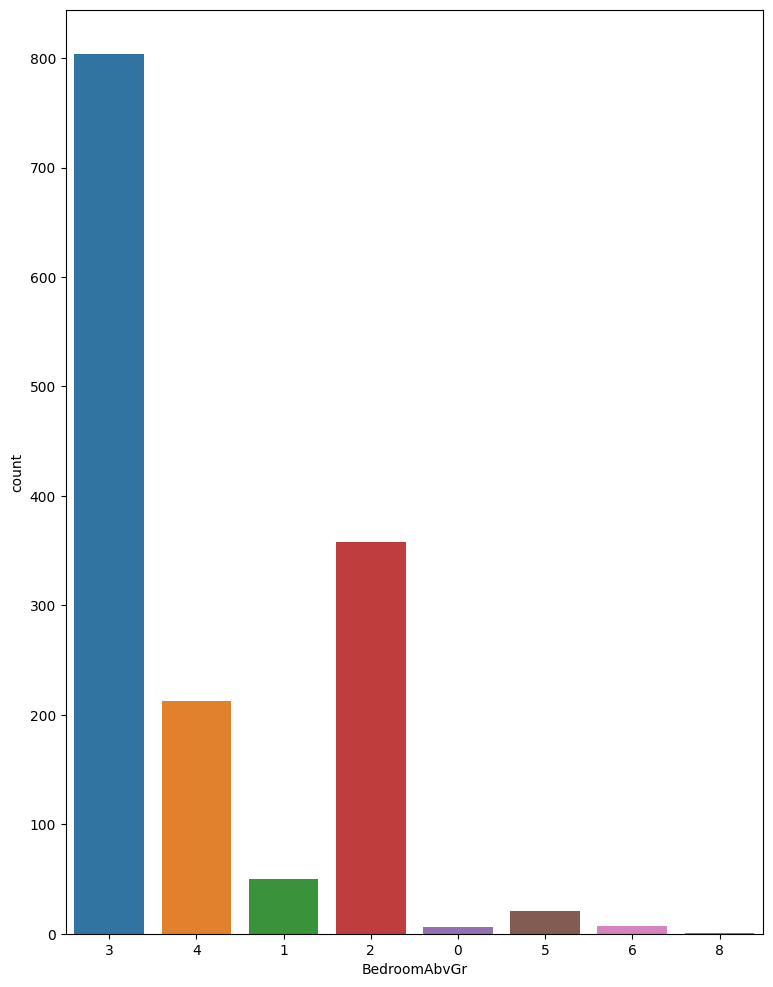

------- COLUMN ---- KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: Int64


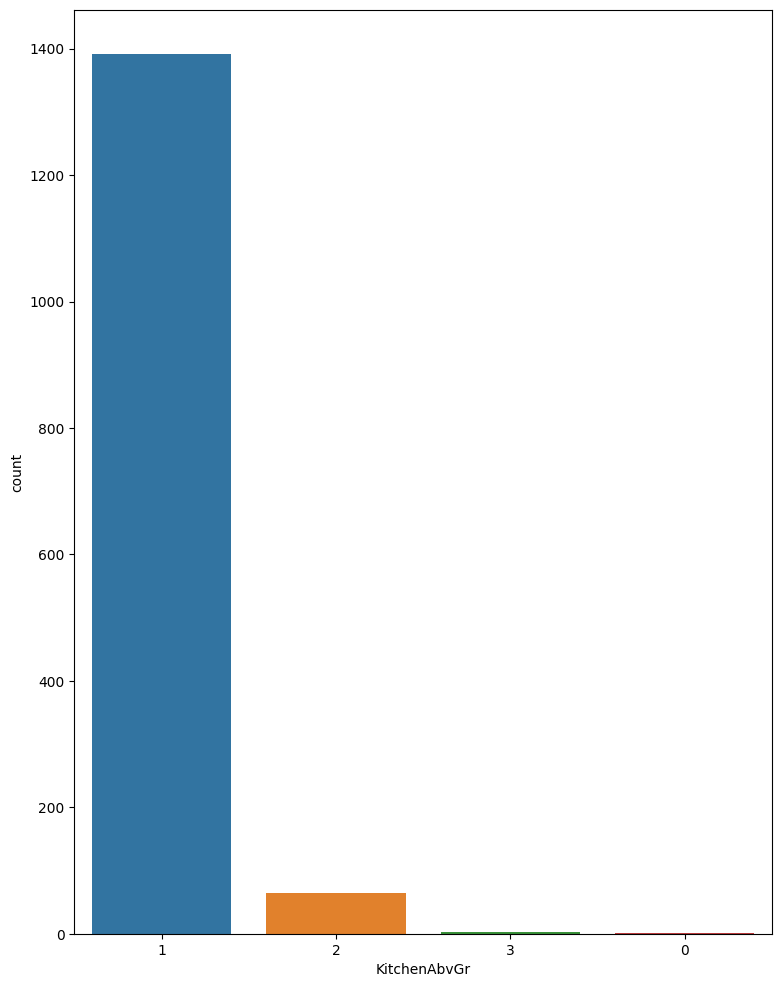

------- COLUMN ---- KitchenQual
Typical/Average    735
Good               586
Excellent          100
Fair                39
Name: KitchenQual, dtype: int64


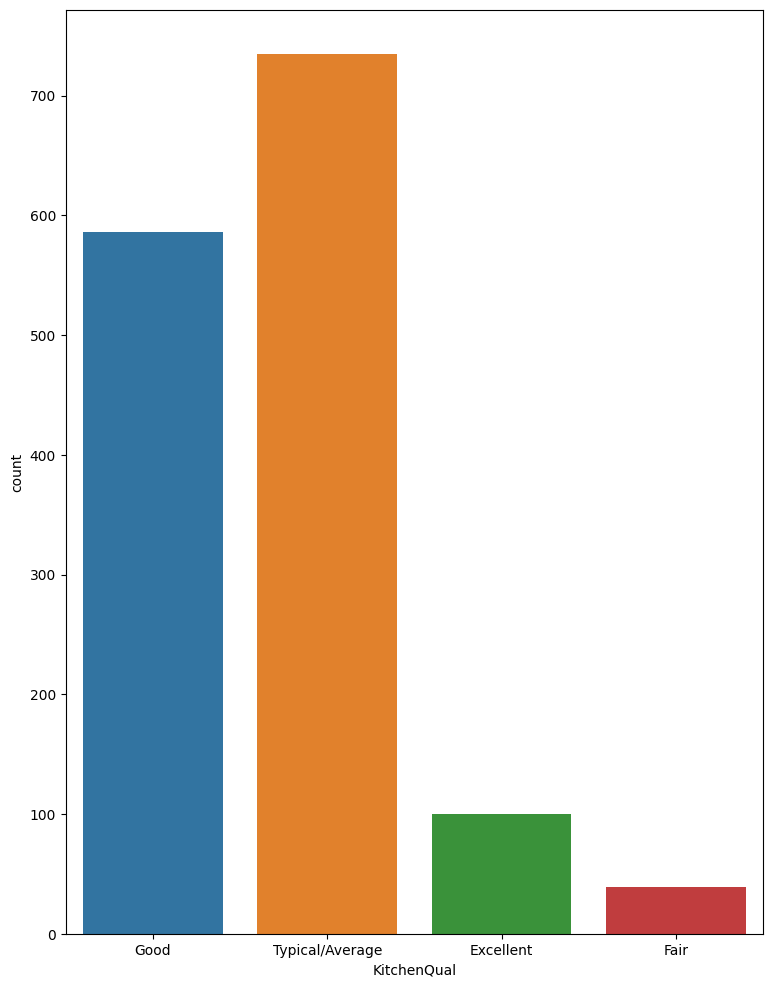

------- COLUMN ---- TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: Int64


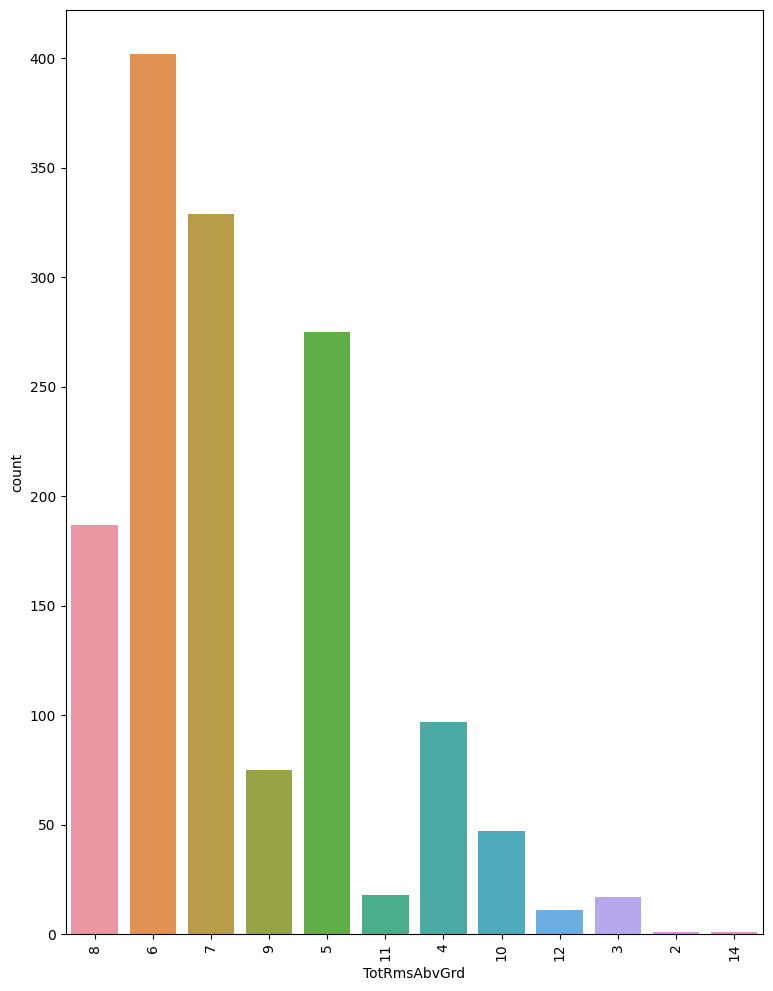

------- COLUMN ---- Functional
Typical Functionality    1360
Minor Deductions 2         34
Minor Deductions 1         31
Moderate Deductions        15
Major Deductions 1         14
Major Deductions 2          5
Severely Damaged            1
Name: Functional, dtype: int64


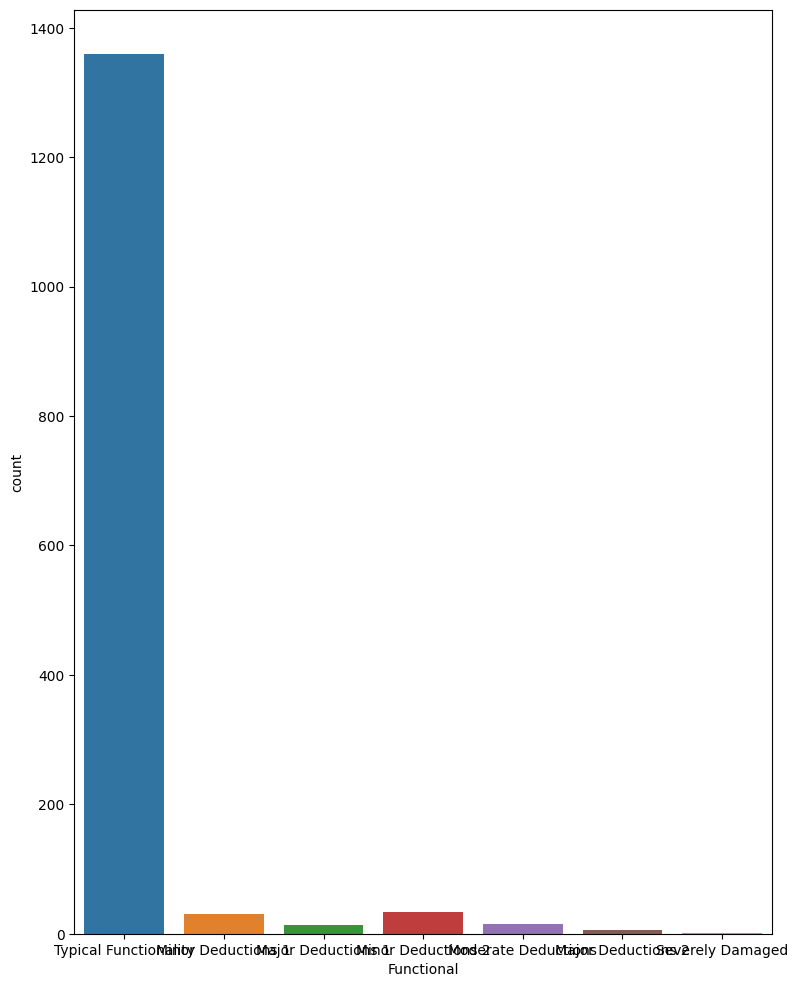

------- COLUMN ---- Fireplaces
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: Int64


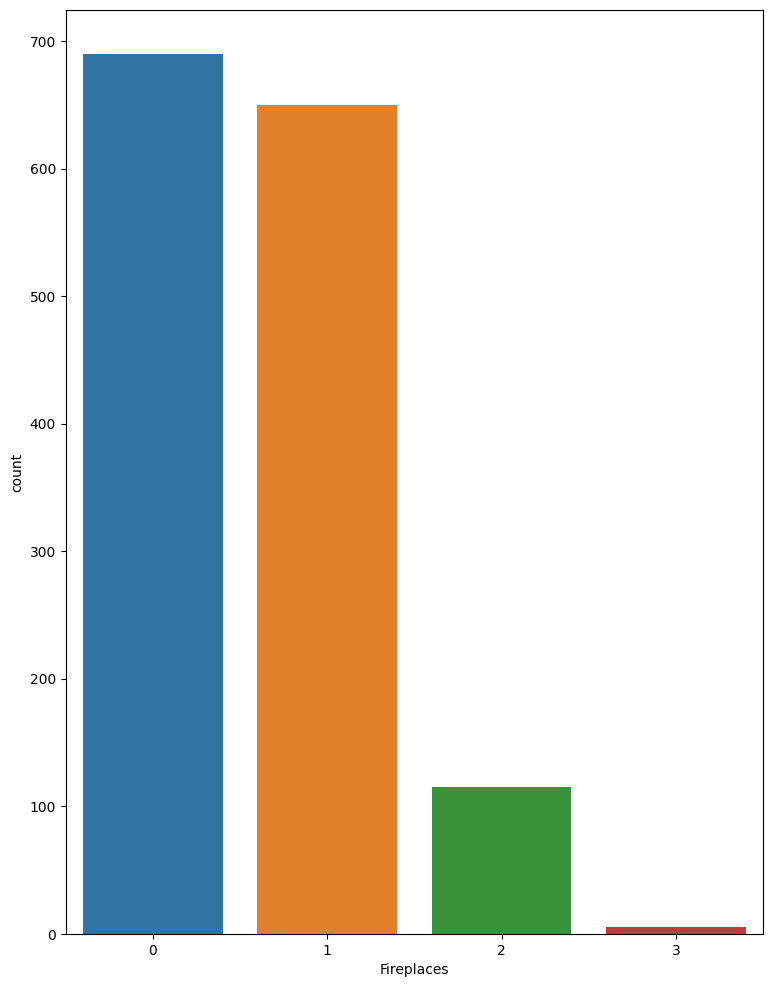

------- COLUMN ---- FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: Int64


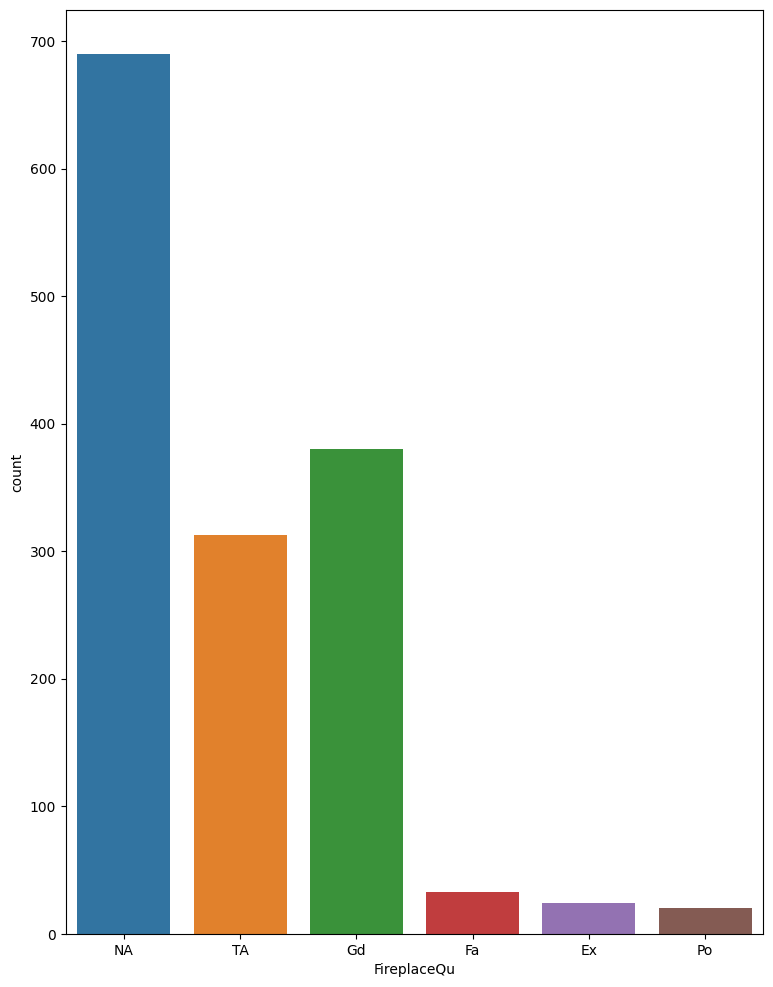

------- COLUMN ---- GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: Int64


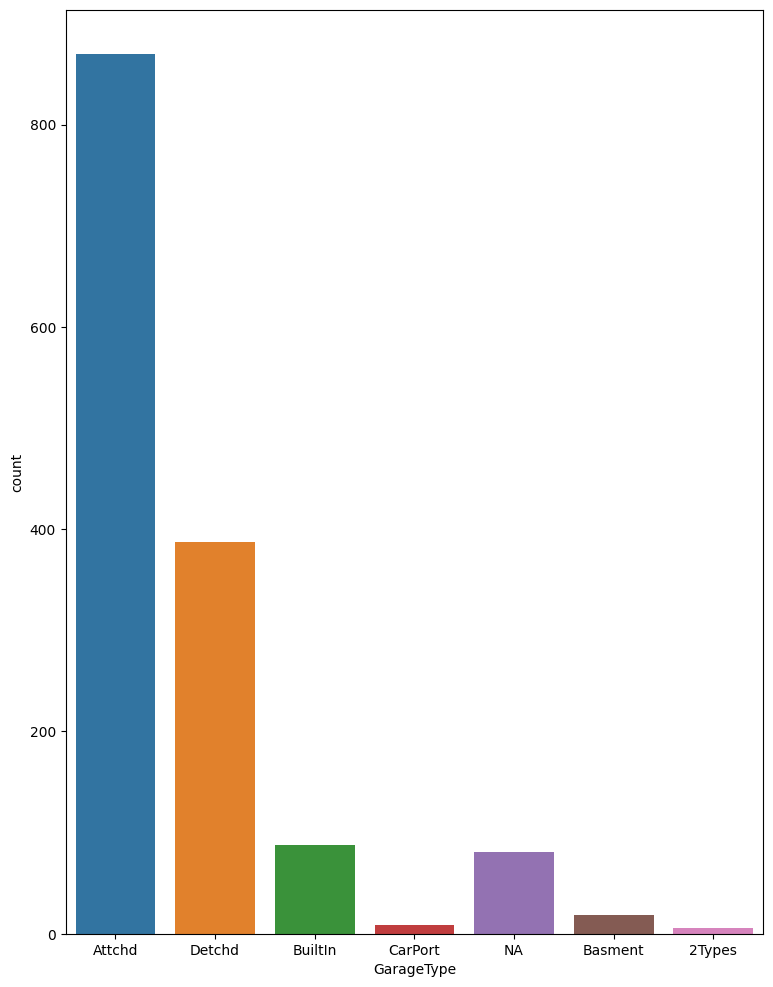

------- COLUMN ---- GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: Int64


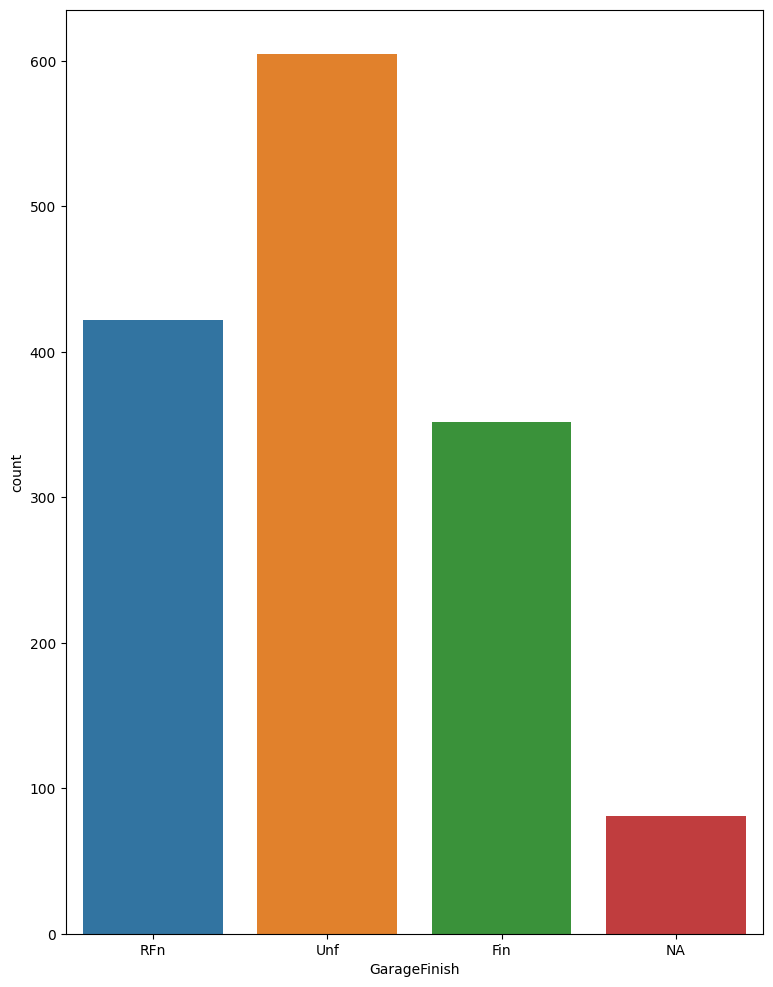

------- COLUMN ---- GarageCars
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: Int64


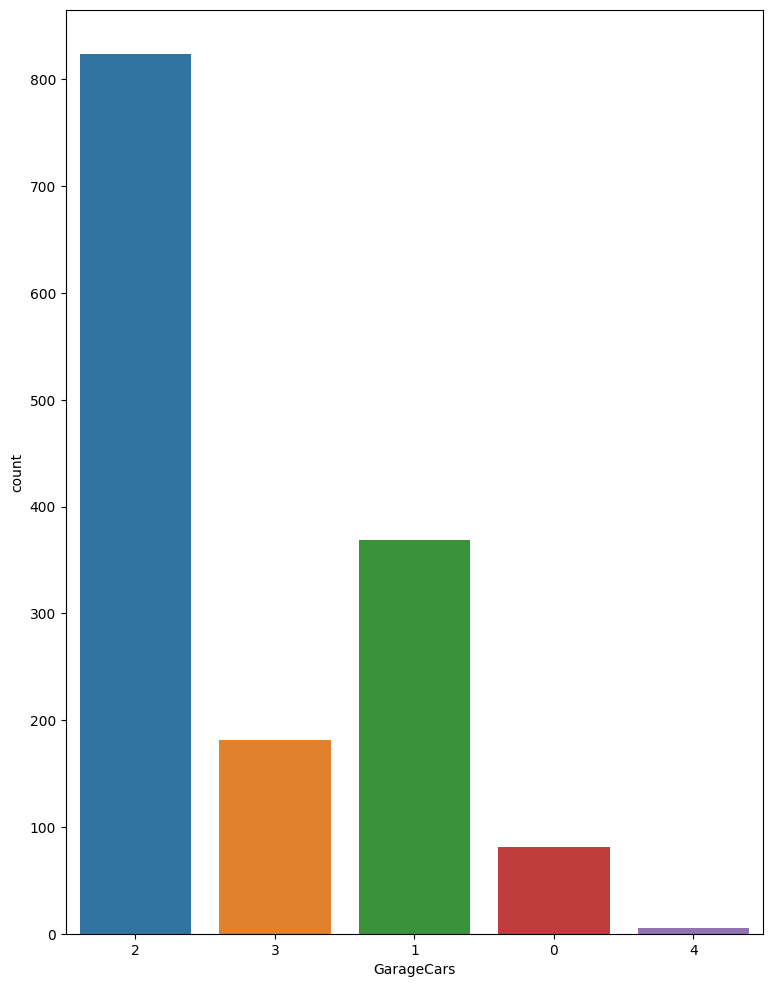

------- COLUMN ---- GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: Int64


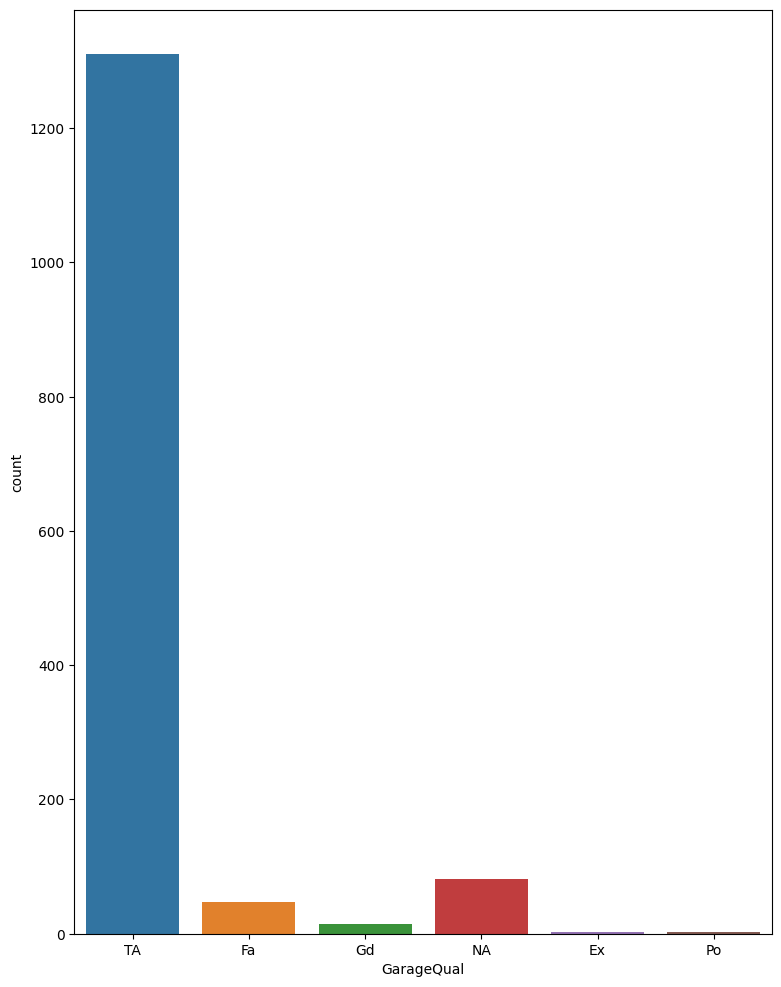

------- COLUMN ---- GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: Int64


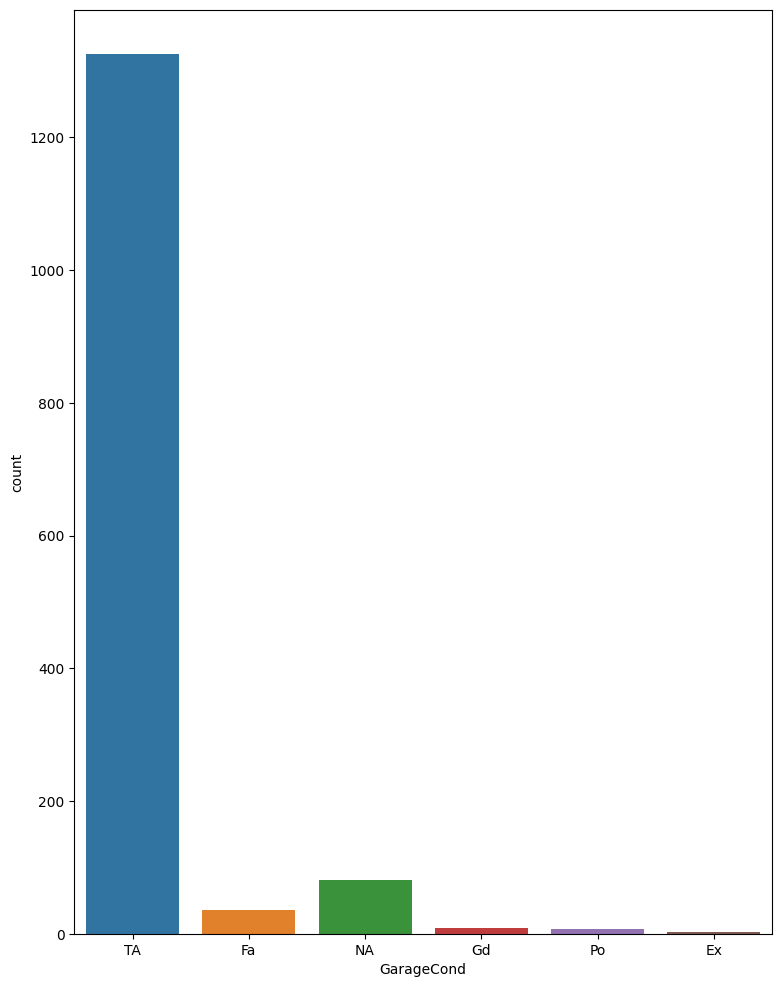

------- COLUMN ---- PavedDrive
Paved               1340
Dirt/Gravel           90
Partial Pavement      30
Name: PavedDrive, dtype: int64


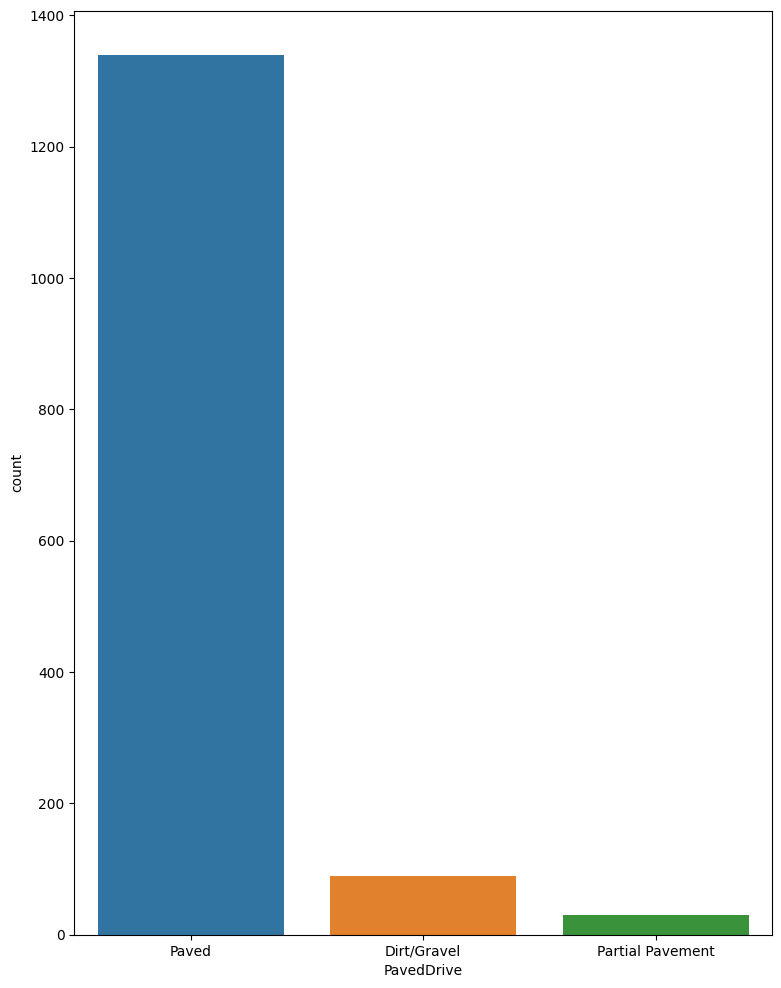

------- COLUMN ---- Fence
NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: Int64


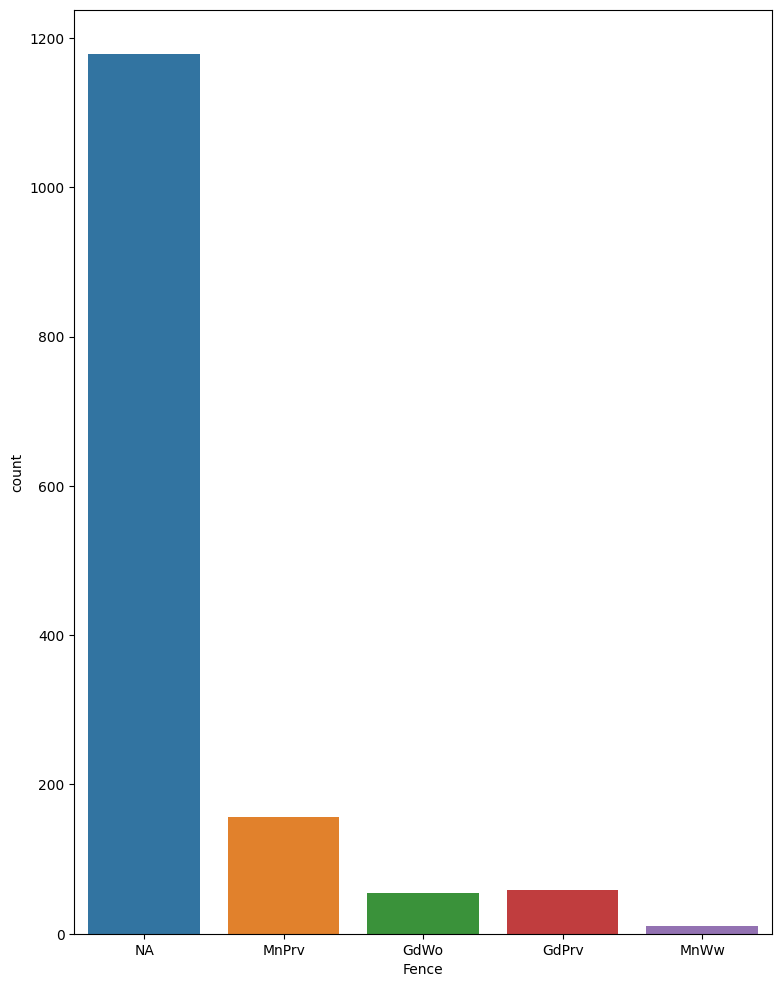

------- COLUMN ---- MoSold
Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64


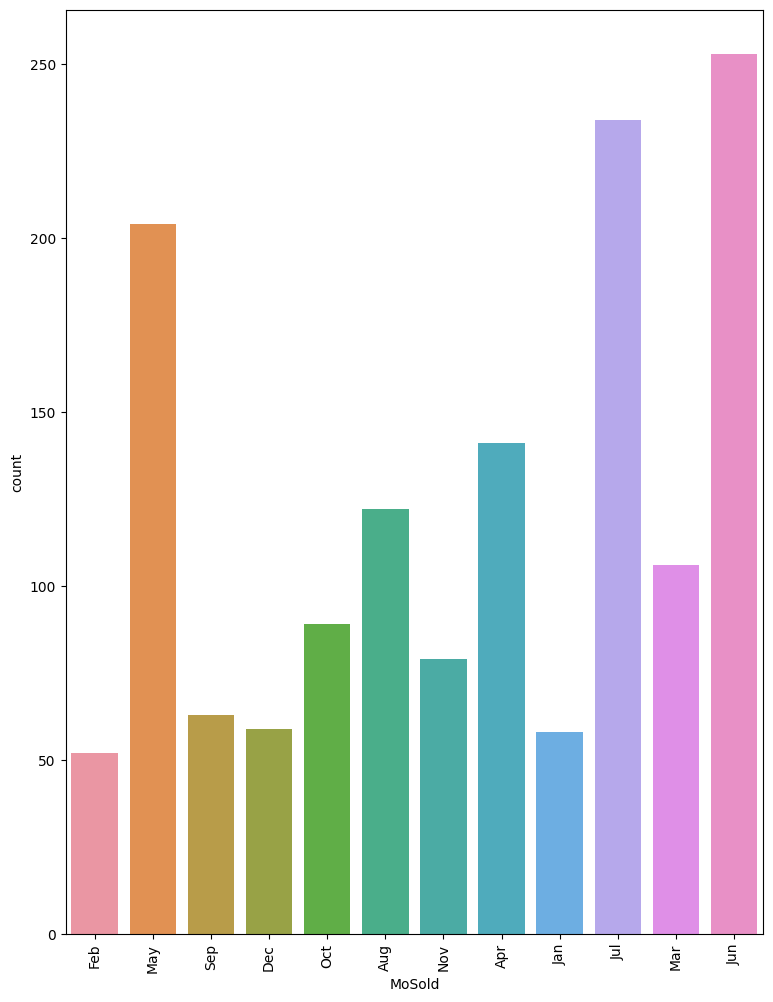

------- COLUMN ---- YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: Int64


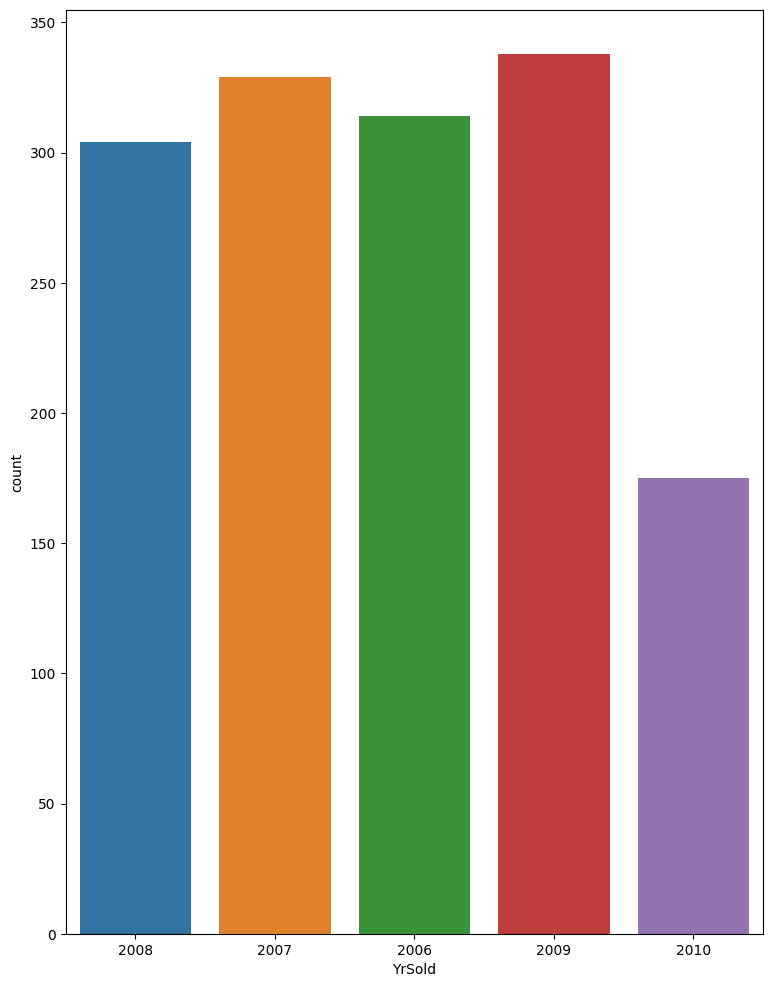

------- COLUMN ---- SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: Int64


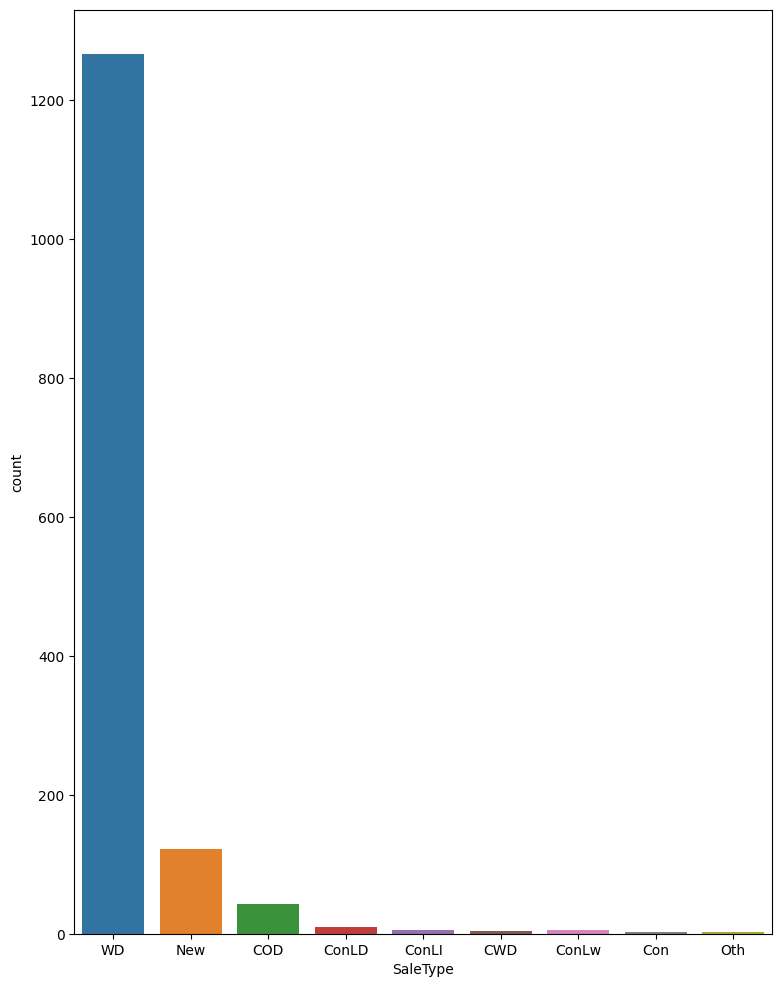

------- COLUMN ---- SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: Int64


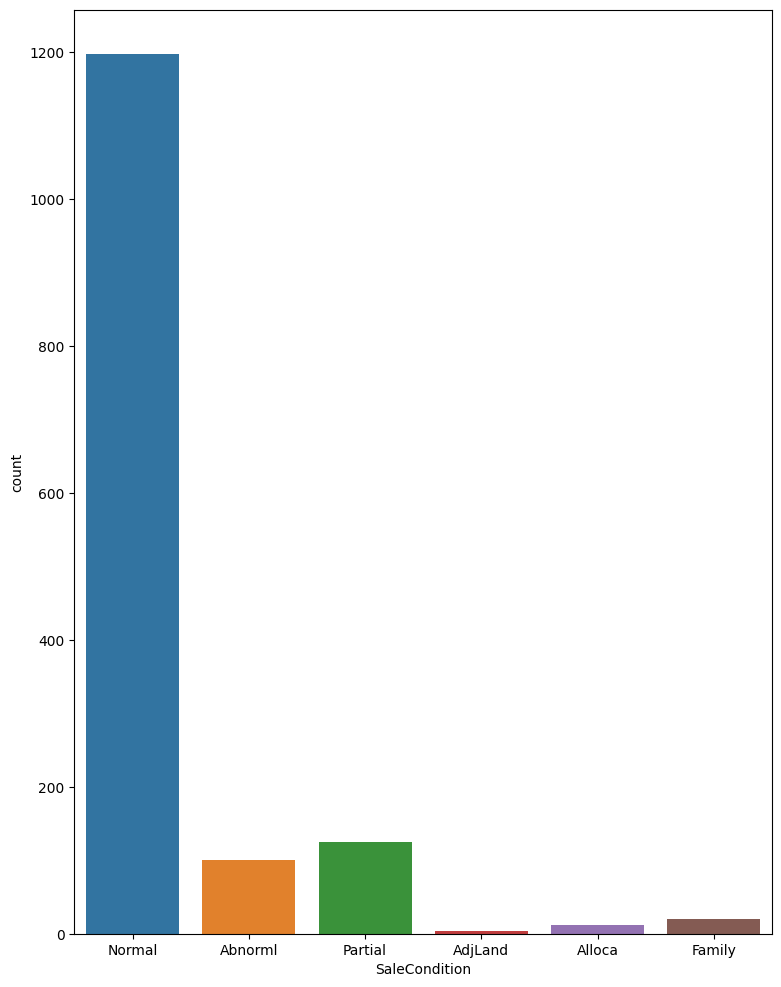

In [430]:
for col in categorical_columns:
    countplot_categorical_column(col)

## Analyzing Numerical fields

### Histogram plot for numerical columns

--- column :: LotFrontage


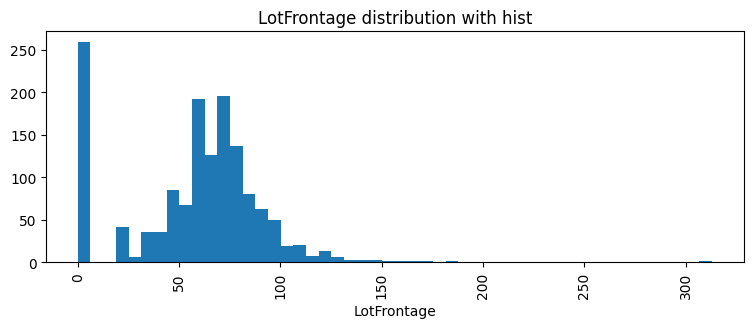

0      259
60     143
70      70
80      69
50      57
75      53
65      44
85      40
78      25
90      23
21      23
64      19
24      19
68      19
73      18
55      17
72      17
63      17
79      17
100     16
66      15
51      15
74      15
52      14
59      13
82      12
71      12
67      12
57      12
43      12
40      12
76      11
69      11
88      10
34      10
53      10
86      10
92      10
35       9
84       9
44       9
77       9
62       9
61       8
93       8
96       8
98       8
120      7
107      7
58       7
95       7
30       6
41       6
110      6
54       6
91       6
36       6
48       6
94       6
89       6
81       6
105      6
87       5
56       5
37       5
83       5
32       5
47       5
42       4
102      4
49       4
99       3
108      3
103      3
104      3
45       3
130      3
124      2
313      2
114      2
122      2
101      2
115      2
109      2
174      2
116      2
134      2
118      2
121      2
97       2
129      2

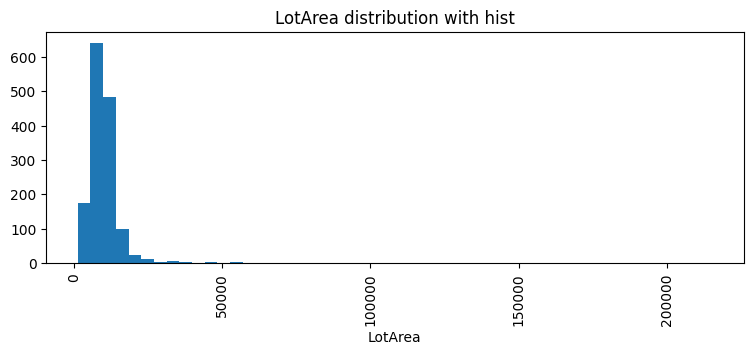

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
--- column :: YearBuilt


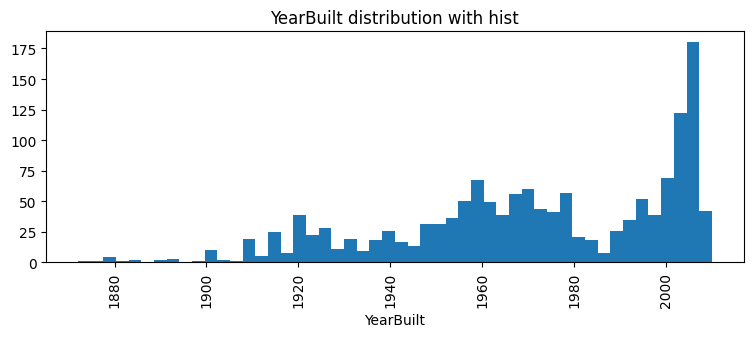

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3
1989     3

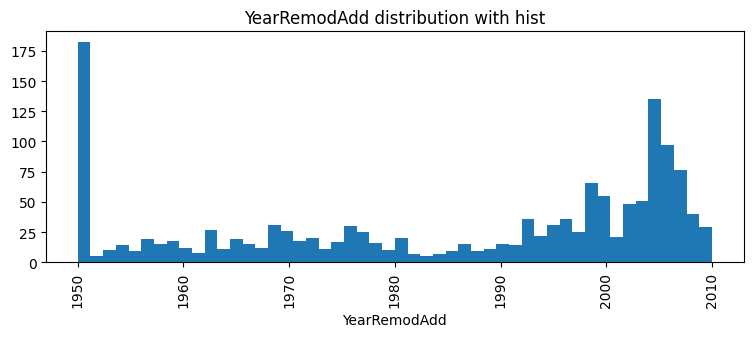

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1977     25
1997     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1959     18
1971     18
1992     17
1968     17
1978     16
1966     15
1958     15
1990     15
1969     14
1954     14
1991     14
1962     14
1963     13
1960     12
1980     12
1967     12
1973     11
1989     11
1964     11
1953     10
1979     10
1987     10
1956     10
1975     10
1955      9
1957      9
1985      9
1988      9
1981      8
1961      8
1984      7
1982      7
1974      7
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, dtype: int64
--- column :: MasVnrArea


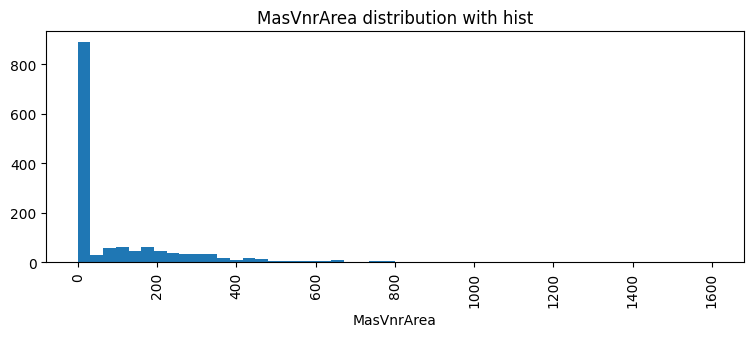

0       869
180       8
72        8
108       8
120       7
16        7
200       6
340       6
106       6
80        6
132       5
320       5
360       5
84        5
170       5
220       4
336       4
183       4
252       4
196       4
300       4
268       4
40        4
168       4
100       4
270       4
210       4
76        4
288       4
216       4
160       4
178       4
246       4
456       4
74        3
70        3
50        3
44        3
272       3
226       3
104       3
116       3
90        3
145       3
148       3
42        3
110       3
128       3
85        3
136       3
420       3
186       3
256       3
166       3
350       3
130       3
99        3
176       3
174       3
208       3
312       3
169       3
240       3
82        3
289       2
232       2
95        2
18        2
338       2
298       2
236       2
206       2
30        2
125       2
113       2
144       2
305       2
423       2
362       2
147       2
328       2
304       2
164       2
424 

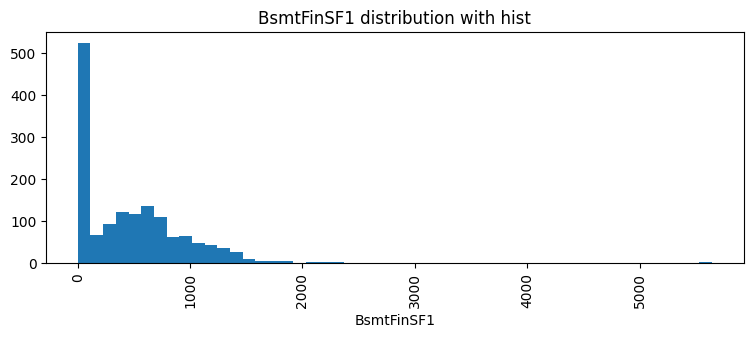

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64
--- column :: BsmtFinSF2


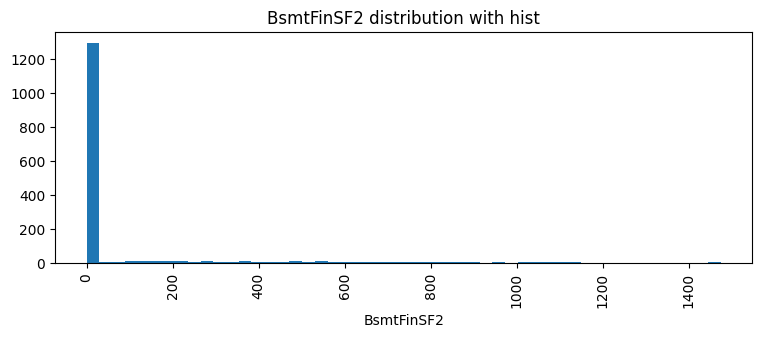

0       1293
180        5
374        3
551        2
147        2
294        2
391        2
539        2
96         2
480        2
182        2
468        2
117        2
64         2
290        2
469        2
279        2
287        2
93         2
712        2
41         2
149        1
1061       1
466        1
396        1
354        1
215        1
841        1
273        1
465        1
400        1
682        1
557        1
230        1
193        1
411        1
634        1
324        1
486        1
500        1
823        1
435        1
1085       1
345        1
764        1
377        1
128        1
630        1
127        1
106        1
791        1
240        1
276        1
163        1
627        1
110        1
872        1
352        1
334        1
546        1
420        1
105        1
972        1
173        1
68         1
661        1
608        1
547        1
906        1
81         1
144        1
375        1
438        1
1031       1
168        1
211        1
492        1

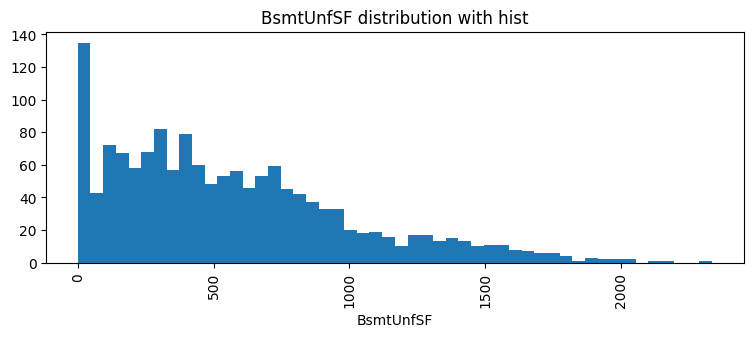

0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64
--- column :: TotalBsmtSF


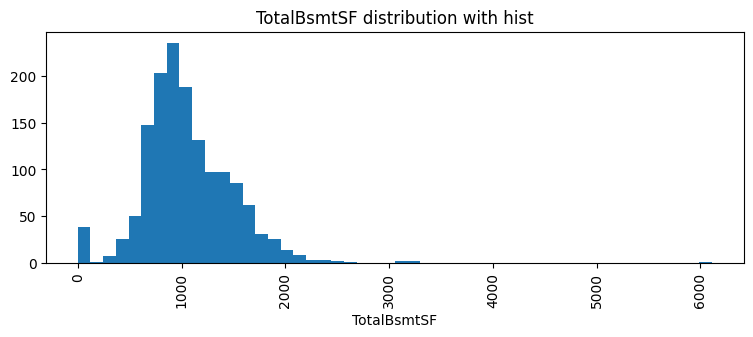

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64
--- column :: 1stFlrSF


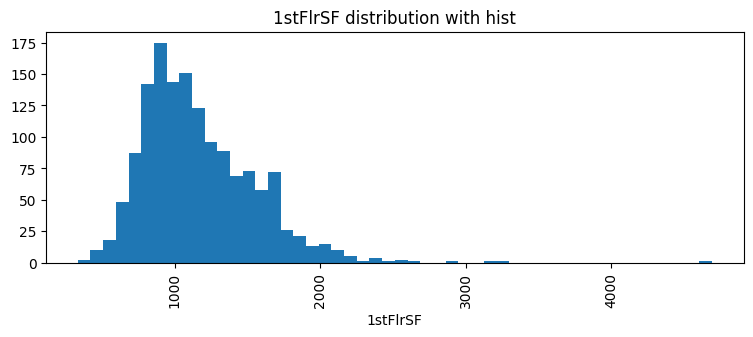

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64
--- column :: 2ndFlrSF


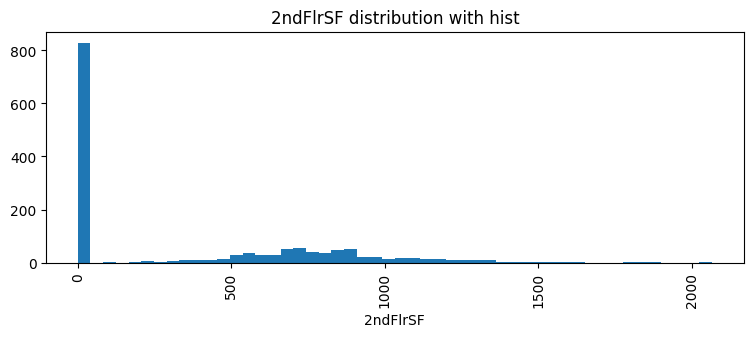

0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64
--- column :: LowQualFinSF


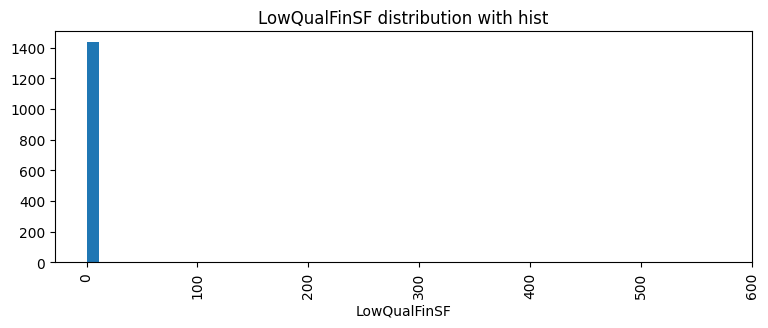

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
--- column :: GrLivArea


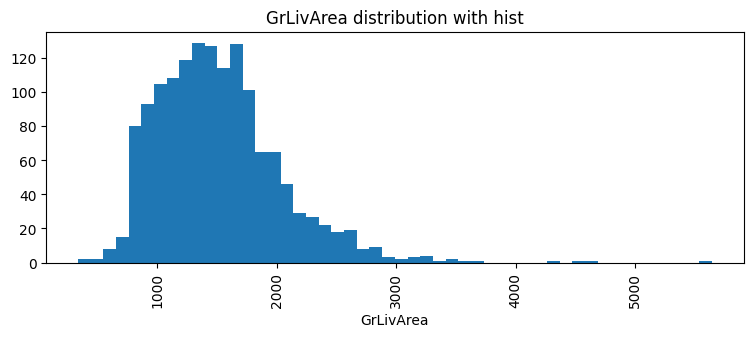

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64
--- column :: GarageYrBlt


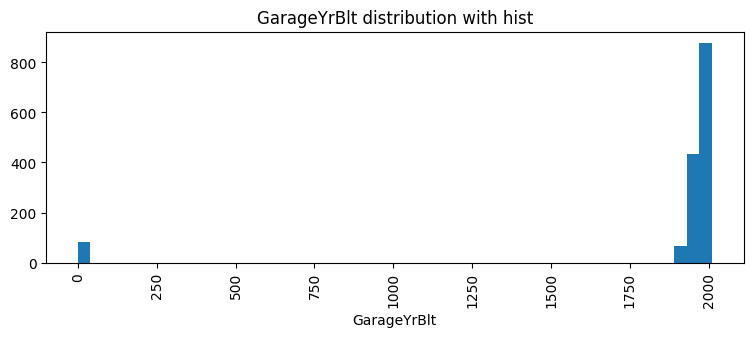

0       81
2005    65
2006    59
2004    53
2003    50
2007    49
1977    35
1998    31
1999    30
1976    29
2008    29
2000    27
1968    26
2002    26
1950    24
1993    22
1958    21
1966    21
2009    21
1965    21
1962    21
2001    20
1970    20
1996    20
1957    20
1954    19
1997    19
1978    19
1960    19
1995    18
1994    18
1974    18
1964    18
1959    17
1990    16
1963    16
1956    16
1967    15
1969    15
1979    15
1980    15
1988    14
1940    14
1920    14
1972    14
1973    14
1961    13
1971    13
1992    13
1955    13
1953    12
1948    11
1987    11
1989    10
1925    10
1981    10
1985    10
1941    10
1939     9
1991     9
1975     9
1949     8
1930     8
1984     8
1983     7
1926     6
1951     6
1986     6
1916     5
1922     5
1936     5
1945     4
1946     4
1928     4
1935     4
1982     4
1931     4
1910     3
2010     3
1932     3
1923     3
1952     3
1938     3
1924     3
1921     3
1947     2
1937     2
1942     2
1915     2
1918     2
1934     2

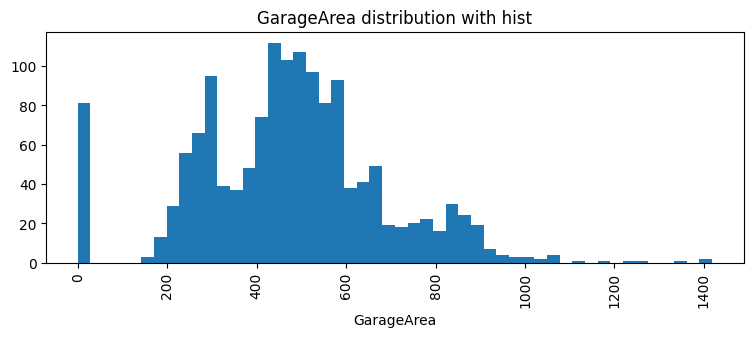

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64
--- column :: WoodDeckSF


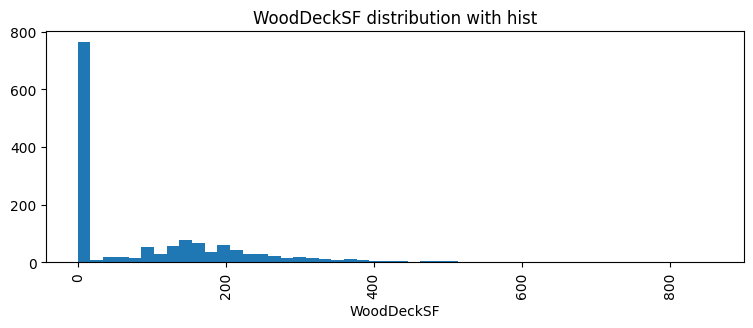

0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
208     10
240     10
216      9
180      8
160      8
264      6
96       6
156      6
250      6
143      6
132      6
196      5
105      5
210      5
288      5
171      5
48       5
104      4
64       4
125      4
220      4
182      4
158      4
74       4
36       4
147      4
142      3
201      3
149      3
113      3
280      3
203      3
112      3
88       3
178      3
165      3
239      3
335      3
164      3
108      3
40       3
188      3
150      3
72       3
80       3
268      3
172      3
198      3
270      3
431      2
222      2
154      2
135      2
155      2
55       2
184      2
256      2
302      2
122      2
272      2
300      2
186      2
364      2
214      2
320      2
169      2
382      2
161      2
261      2
38       2
324      2
253      2
148      2
206      2
252      2
328      2
136      2
289      2
296      2
146      2
185      2
28       2
81       2

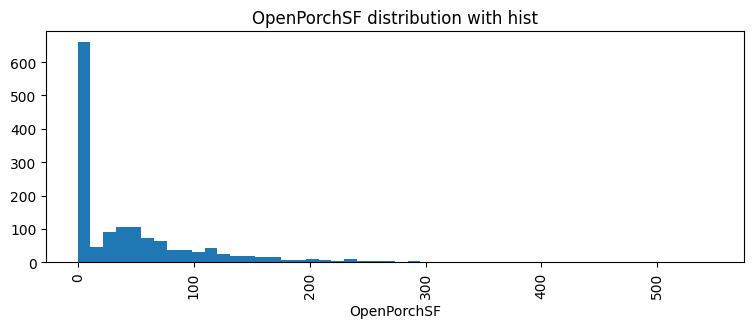

0      656
36      29
48      22
20      21
40      19
45      19
24      16
30      16
60      15
39      14
28      14
54      13
50      13
44      13
72      12
32      11
98      11
63      11
35      11
75      10
120     10
96      10
42      10
66       9
64       9
68       8
70       8
78       8
84       8
38       8
16       8
56       8
80       7
102      7
25       7
114      7
27       7
144      7
130      7
33       7
140      6
116      6
26       6
22       6
46       6
51       6
100      6
55       6
104      5
150      5
88       5
65       5
62       5
108      5
21       5
128      5
74       5
18       5
112      5
29       5
90       5
59       5
76       5
110      5
168      4
105      4
34       4
113      4
49       4
82       4
52       4
154      4
57       4
53       3
12       3
192      3
73       3
158      3
124      3
87       3
166      3
69       3
61       3
81       3
234      3
122      3
184      3
151      3
132      3
136      3
47       3

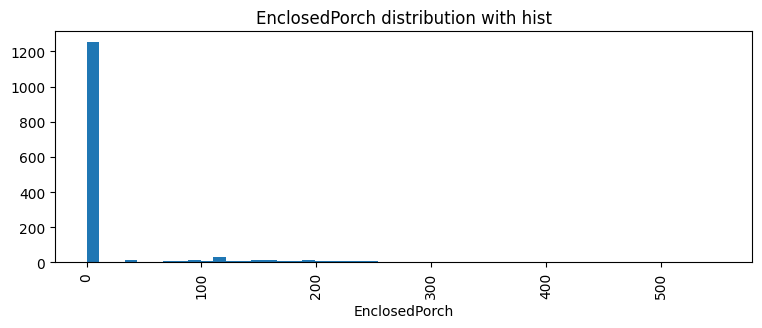

0      1252
112      15
96        6
192       5
144       5
120       5
216       5
156       4
116       4
252       4
184       3
126       3
150       3
164       3
128       3
102       3
176       3
228       3
40        3
80        2
236       2
34        2
160       2
32        2
84        2
115       2
158       2
137       2
240       2
100       2
154       2
185       2
264       2
190       2
168       2
108       2
36        2
202       2
234       2
77        2
244       2
180       2
224       2
205       2
39        2
114       2
268       1
19        1
174       1
226       1
138       1
94        1
318       1
48        1
220       1
194       1
68        1
254       1
230       1
275       1
172       1
170       1
87        1
214       1
162       1
50        1
212       1
221       1
198       1
301       1
20        1
286       1
123       1
280       1
42        1
81        1
259       1
145       1
208       1
330       1
134       1
196       1
143       1
37  

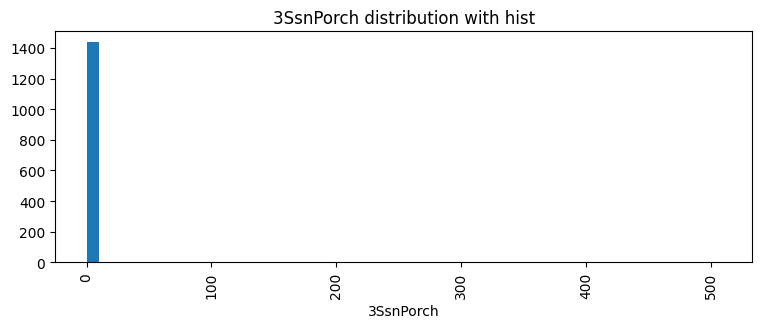

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64
--- column :: ScreenPorch


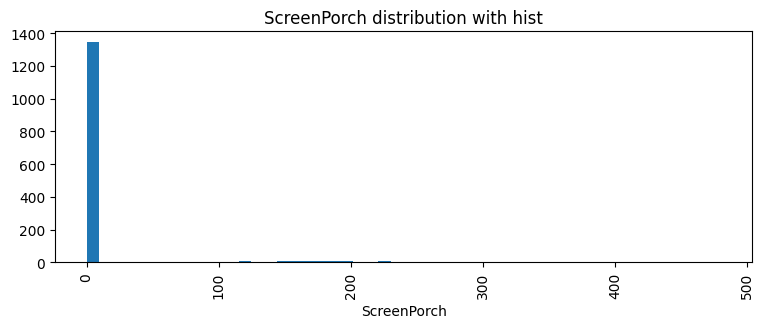

0      1344
192       6
120       5
224       5
189       4
180       4
147       3
90        3
160       3
144       3
126       3
168       3
198       2
259       2
288       2
184       2
176       2
200       2
142       2
100       2
170       2
216       2
175       1
152       1
63        1
312       1
222       1
265       1
322       1
190       1
233       1
410       1
273       1
53        1
143       1
204       1
263       1
80        1
163       1
116       1
480       1
178       1
440       1
155       1
220       1
119       1
165       1
225       1
287       1
197       1
140       1
266       1
154       1
153       1
130       1
128       1
271       1
234       1
374       1
185       1
182       1
396       1
276       1
210       1
99        1
161       1
145       1
122       1
95        1
252       1
60        1
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, dtype: int64
--- column :: PoolArea


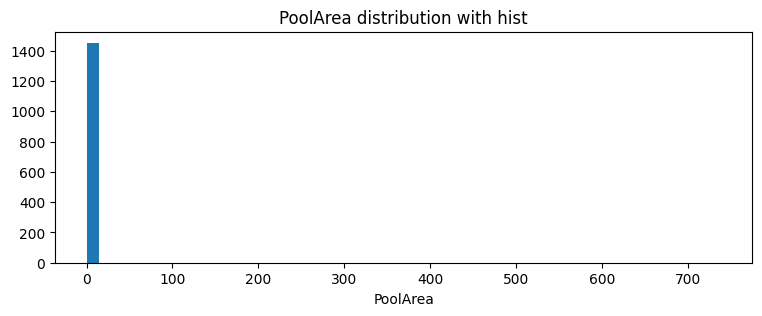

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
--- column :: MiscVal


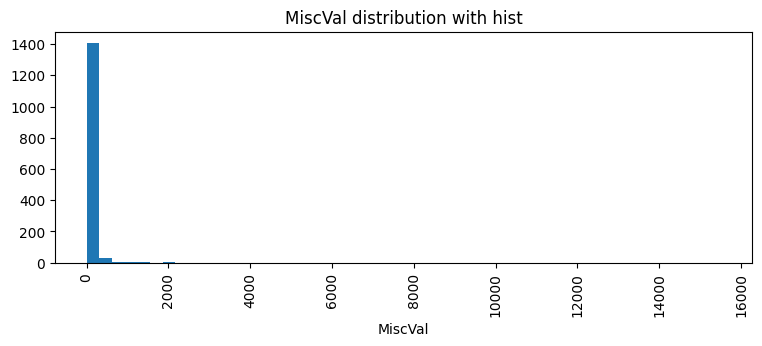

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
--- column :: SalePrice


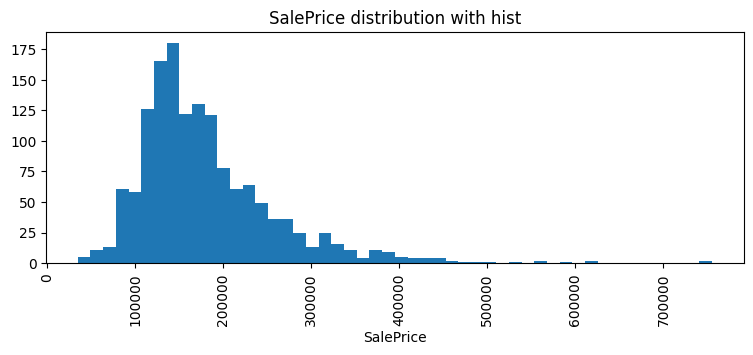

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64


In [431]:
for col in numerical_columns:
    plot_hist(col)

### box plot

In [432]:
def create_boxplot(column_name):
    plt.figure(figsize=(5,4))
    sns.boxplot(y=column_name, data=housing)
    plt.title(f"Box plot for {column_name}")
    plt.show()

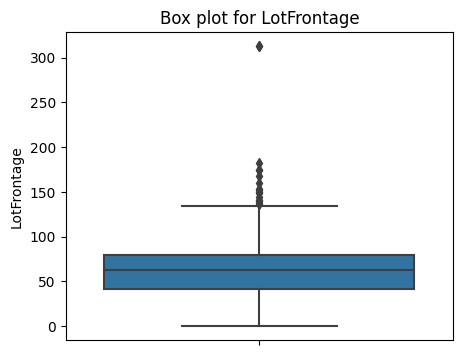

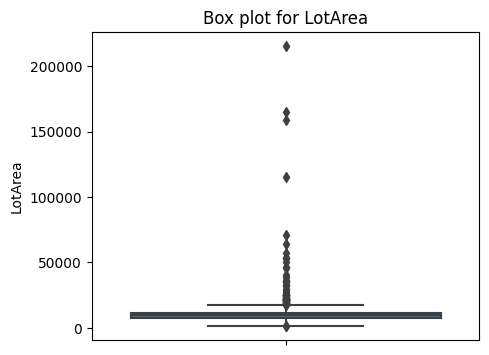

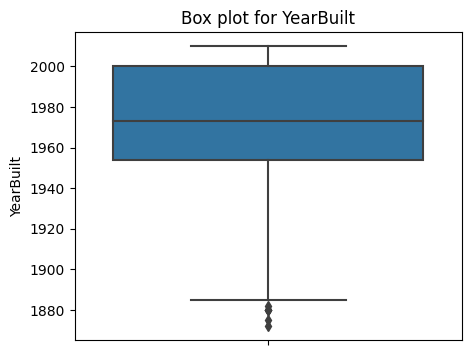

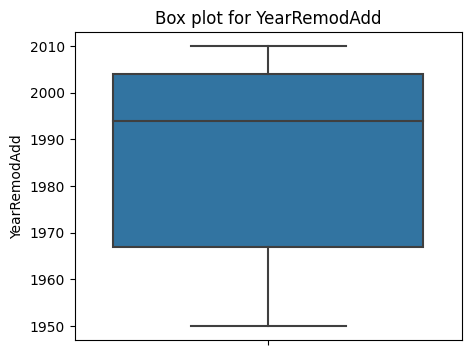

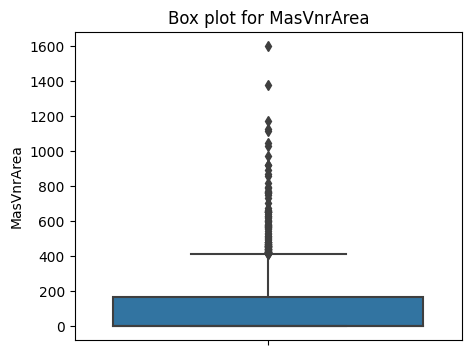

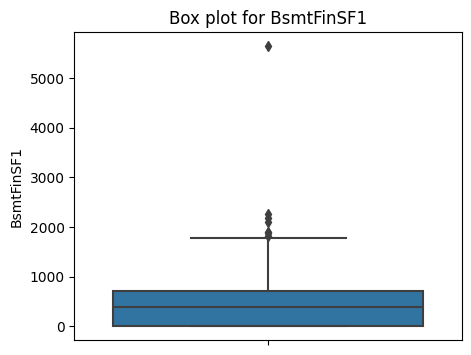

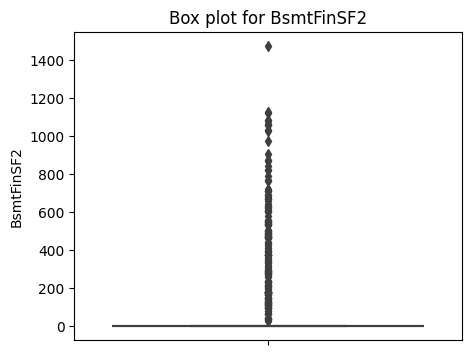

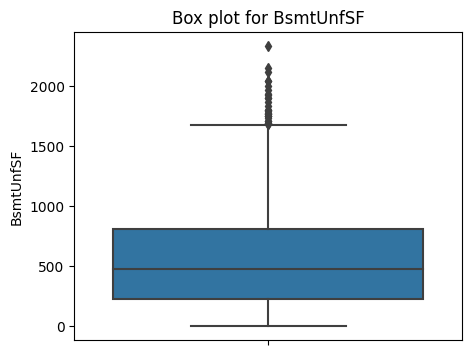

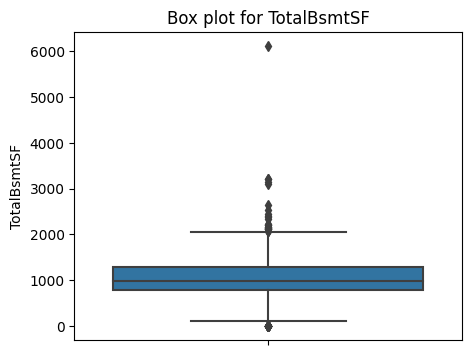

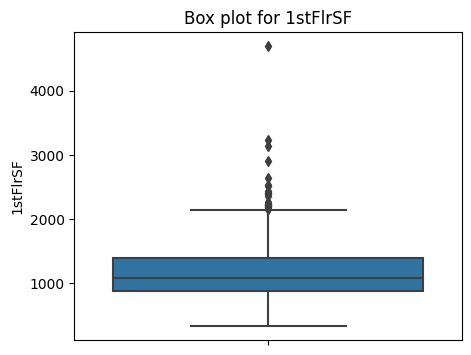

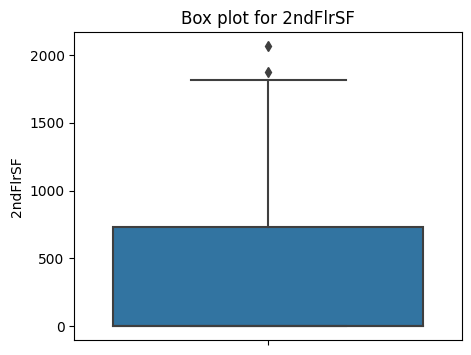

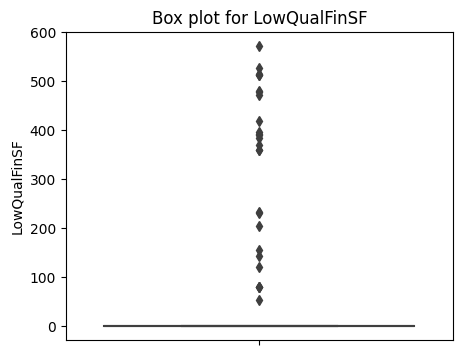

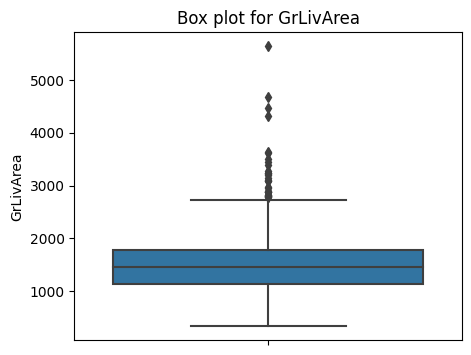

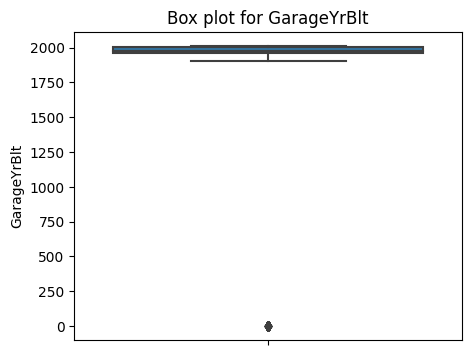

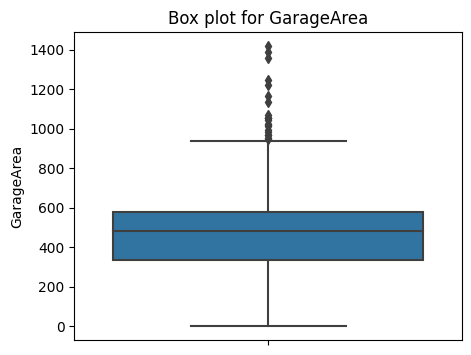

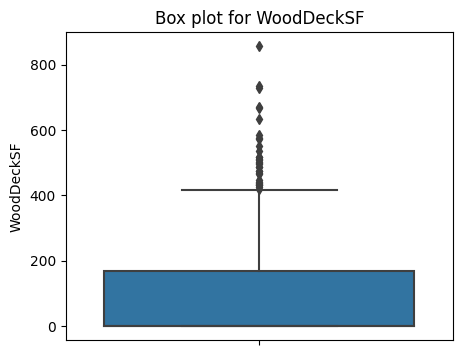

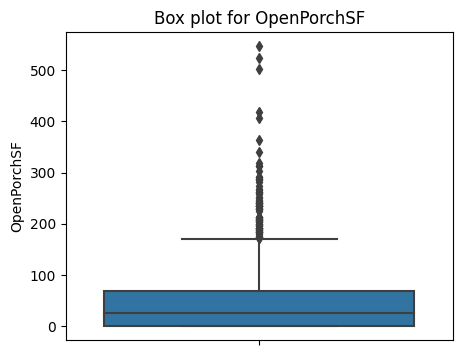

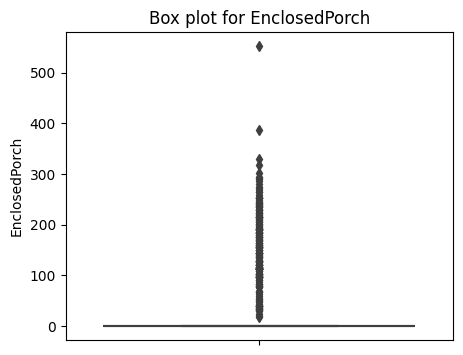

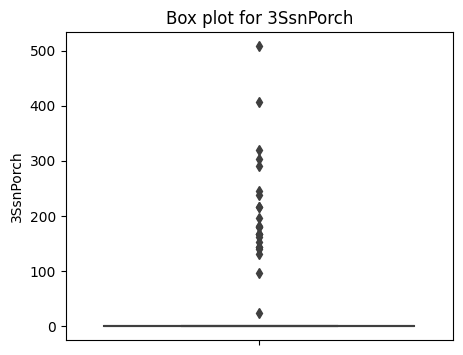

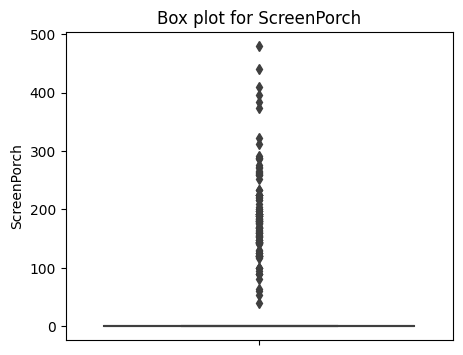

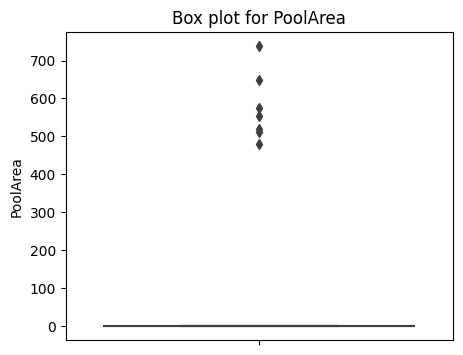

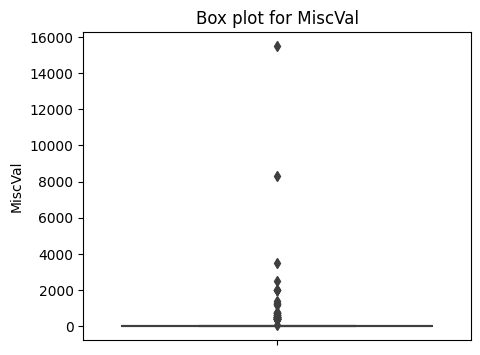

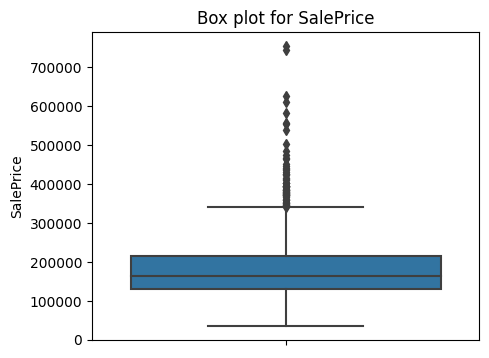

In [433]:
for col in numerical_columns:
    create_boxplot(col)

## Insight
- There seems to be some outliers, let analyze them

## Handling Outliers

In [434]:
### Taking out the year columns
year_fields = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
numerical_columns = [col for col in numerical_columns if col not in year_fields]

### Detecting the outliers

In [435]:

print('Before Outlier removals - ', housing.shape)
rows_before_outlier_removals = housing.shape[0]
for column_name in numerical_columns:
    
    ## Not removing the outliers for column MiscVal as the column is quite not clear on the values it contains
    if(column_name != 'MiscVal'):
        
        print(f'-------- OUTLIERS for Column :: {column_name} ---------')
        initial_row_count = housing.shape[0]
        # 1st Quartile
        Q1 = np.percentile(housing[column_name],25)

        # 3rd quartile
        Q3 = np.percentile(housing[column_name],99)

        # Inter Quartile Range IQR
        IQR = Q3 - Q1

        # Outlier step
        size = IQR * 1.5

        ## Lower fence
        lower_fence = Q1-size

        ## Upper fence
        upper_fence = Q1 + size

        housing = housing[(housing[column_name] >= lower_fence) & (housing[column_name] <= upper_fence)]
        rows_after_outlier_removals = housing.shape[0]
        print('Rows removed - ', initial_row_count - rows_after_outlier_removals)
    
    
    
print('After All Outlier removals - ', housing.shape)
rows_after_outlier_removals = housing.shape[0]

rows_removed = rows_before_outlier_removals - rows_after_outlier_removals
print('Total Rows removed - ', rows_removed)

print('% of data outliers = ', round((rows_removed/rows_before_outlier_removals)*100,2))

print('Original Housing data - ', housing.shape)

Before Outlier removals -  (1460, 78)
-------- OUTLIERS for Column :: LotFrontage ---------
Rows removed -  2
-------- OUTLIERS for Column :: LotArea ---------
Rows removed -  9
-------- OUTLIERS for Column :: MasVnrArea ---------
Rows removed -  2
-------- OUTLIERS for Column :: BsmtFinSF1 ---------
Rows removed -  0
-------- OUTLIERS for Column :: BsmtFinSF2 ---------
Rows removed -  1
-------- OUTLIERS for Column :: BsmtUnfSF ---------
Rows removed -  0
-------- OUTLIERS for Column :: TotalBsmtSF ---------
Rows removed -  4
-------- OUTLIERS for Column :: 1stFlrSF ---------
Rows removed -  1
-------- OUTLIERS for Column :: 2ndFlrSF ---------
Rows removed -  1
-------- OUTLIERS for Column :: LowQualFinSF ---------
Rows removed -  1
-------- OUTLIERS for Column :: GrLivArea ---------
Rows removed -  1
-------- OUTLIERS for Column :: GarageArea ---------
Rows removed -  2
-------- OUTLIERS for Column :: WoodDeckSF ---------
Rows removed -  1
-------- OUTLIERS for Column :: OpenPorchSF 

## Insight
- Nearly 3.4% data seems to be outliers
- Have dropped the rows of the outliers

## 3.2 Bivariate Analysis

In [436]:
## PLotting a bar plot

def barplot_categorical_column(column_name):
    print(f'------------- column :: {column_name} -----------')
    plt.figure(figsize = (8,4))
    sns.barplot(x=column_name,y='SalePrice',data=housing)
    plt.title(f'Barplot : {column_name} vs SalePrice')
    plt.xlabel(column_name)
    plt.ylabel('SalePrice')
    if housing[column_name].nunique() > 10:
        plt.xticks(rotation=90)
    plt.show()
    

------------- column :: MSSubClass -----------


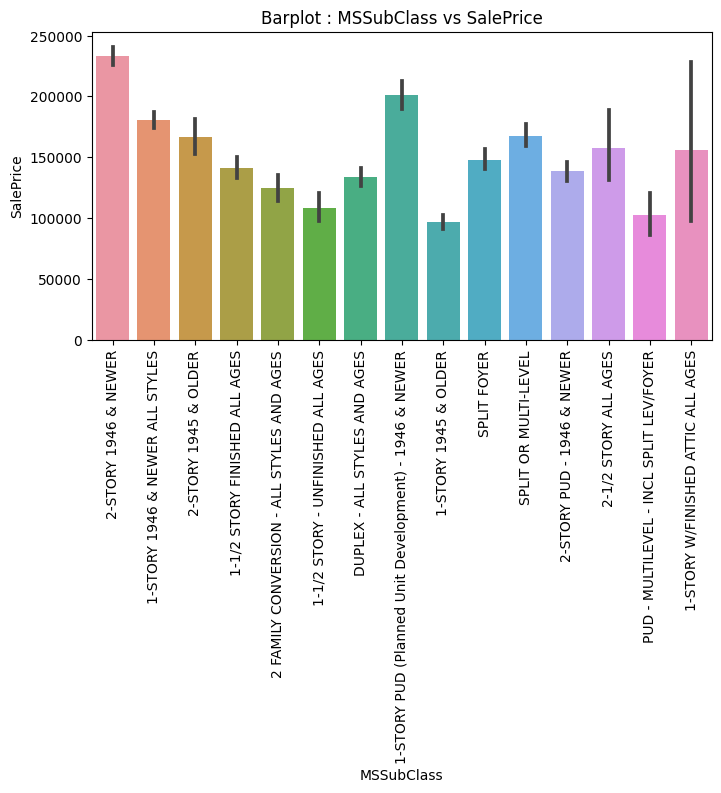

------------- column :: MSZoning -----------


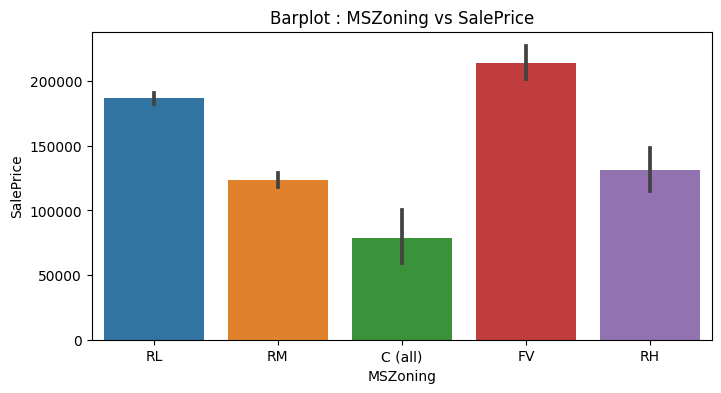

------------- column :: Street -----------


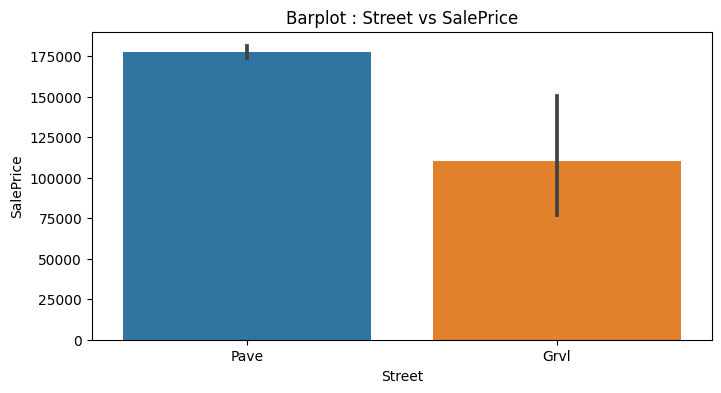

------------- column :: Alley -----------


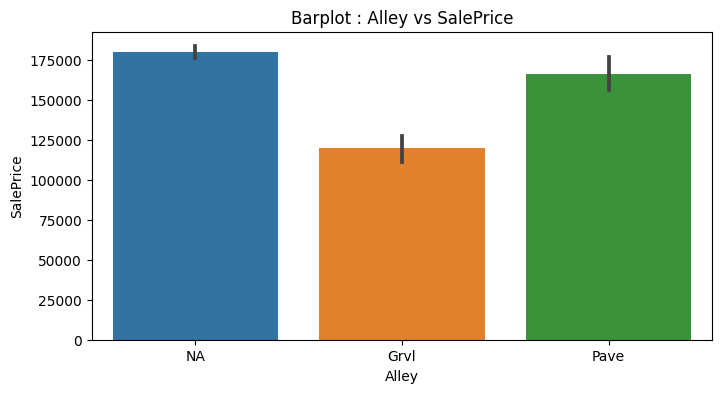

------------- column :: LotShape -----------


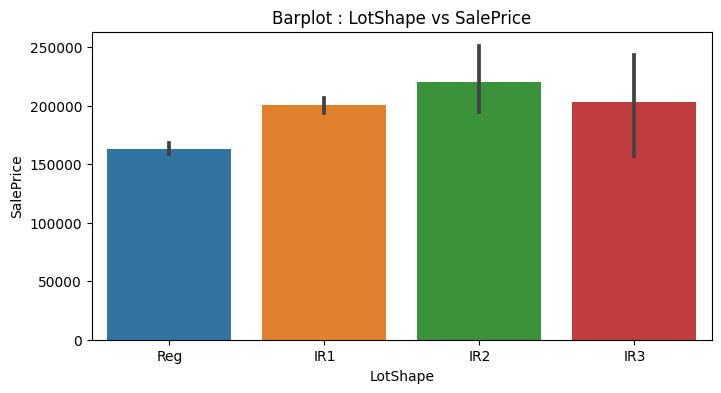

------------- column :: LandContour -----------


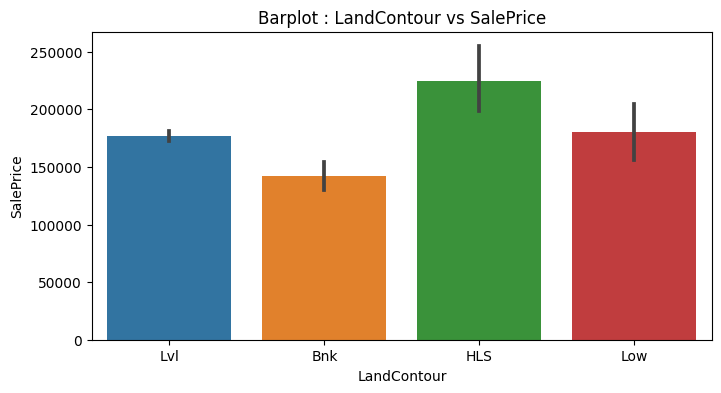

------------- column :: Utilities -----------


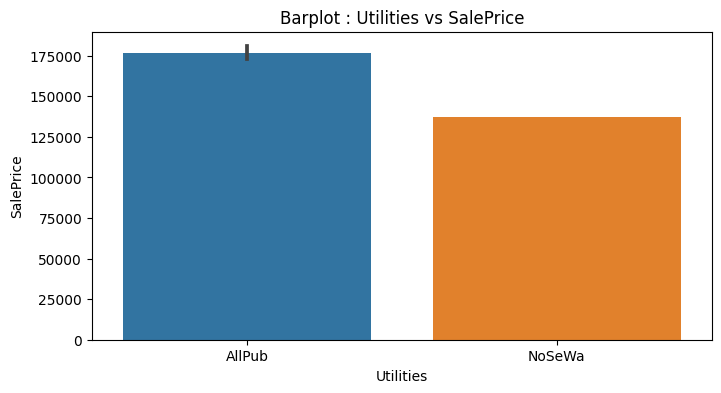

------------- column :: LotConfig -----------


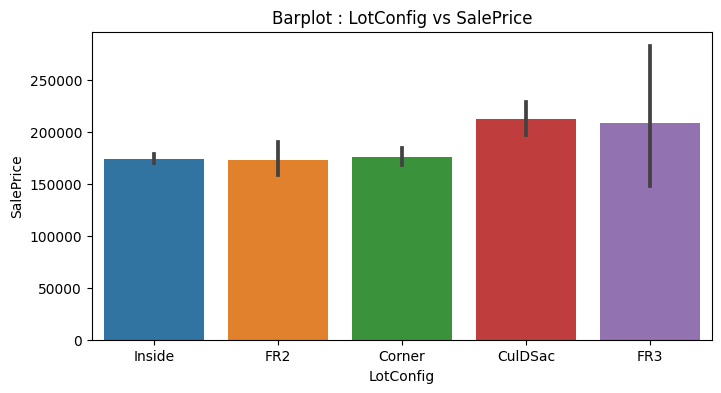

------------- column :: LandSlope -----------


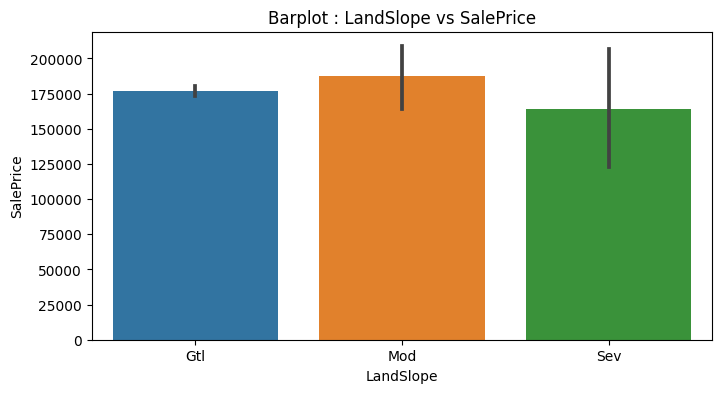

------------- column :: Neighborhood -----------


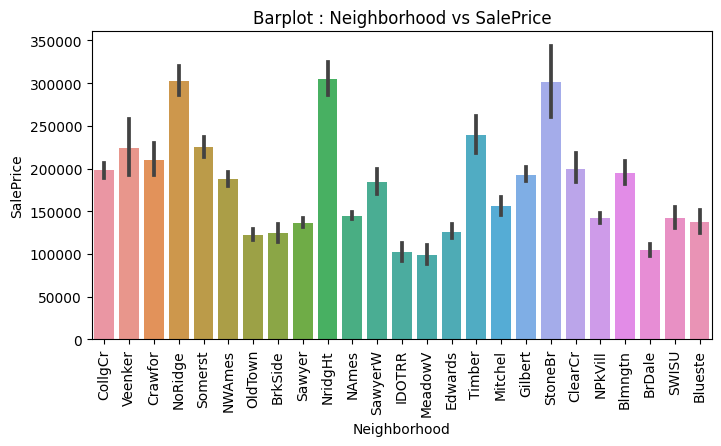

------------- column :: Condition1 -----------


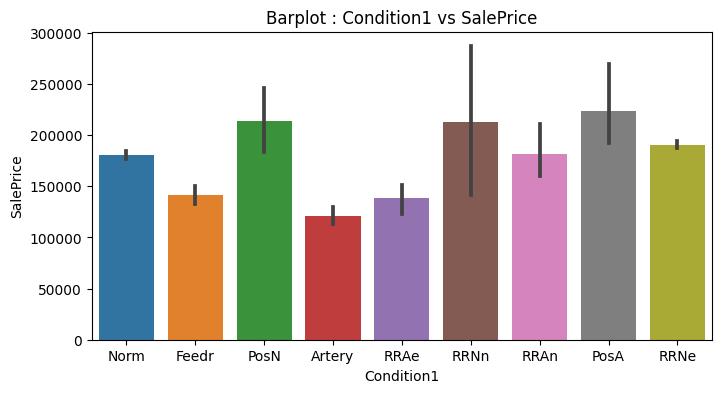

------------- column :: Condition2 -----------


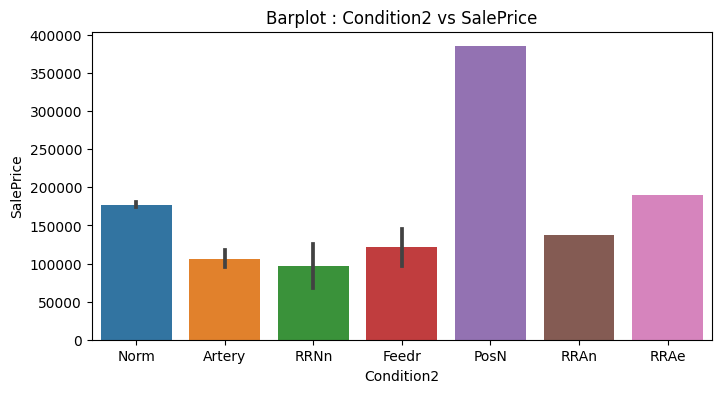

------------- column :: BldgType -----------


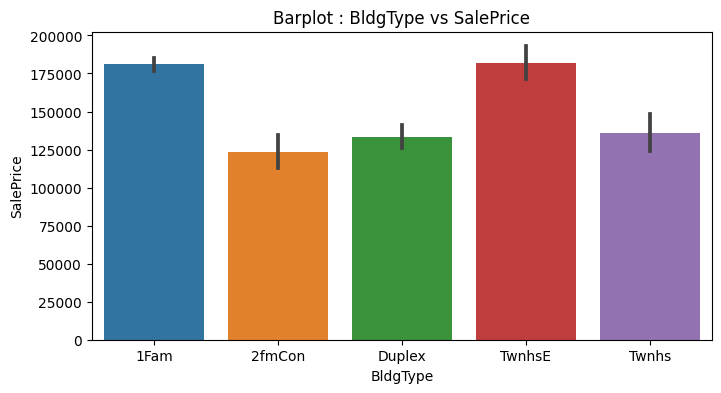

------------- column :: HouseStyle -----------


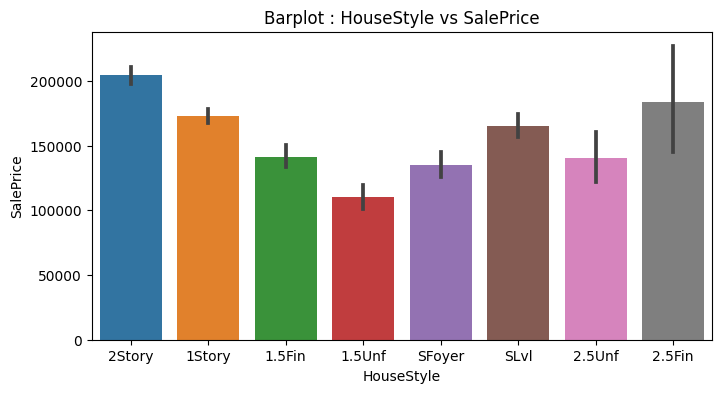

------------- column :: OverallQual -----------


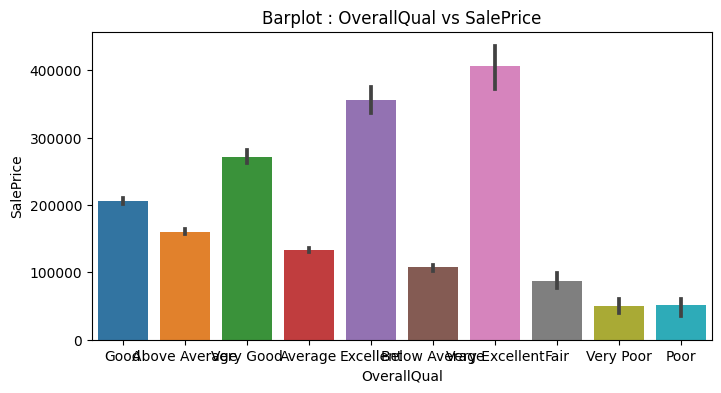

------------- column :: OverallCond -----------


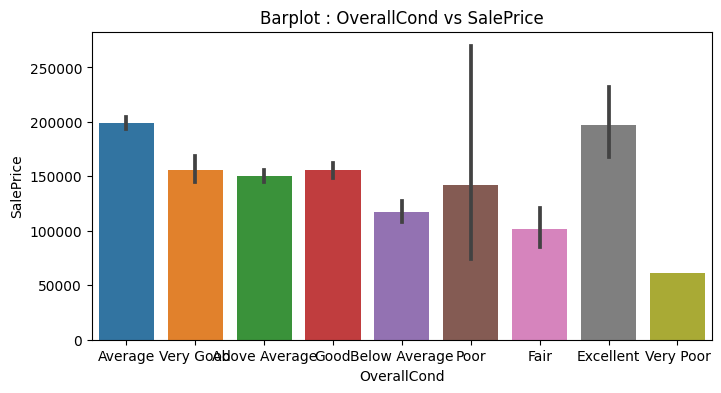

------------- column :: RoofStyle -----------


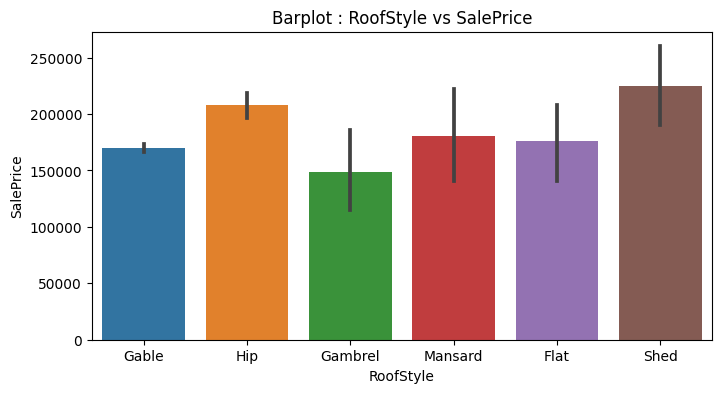

------------- column :: RoofMatl -----------


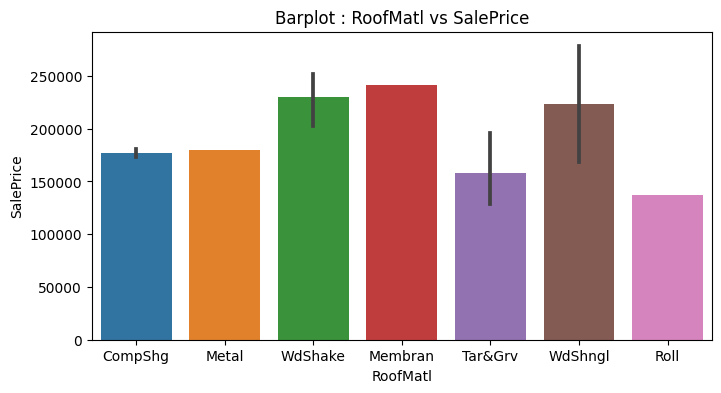

------------- column :: Exterior1st -----------


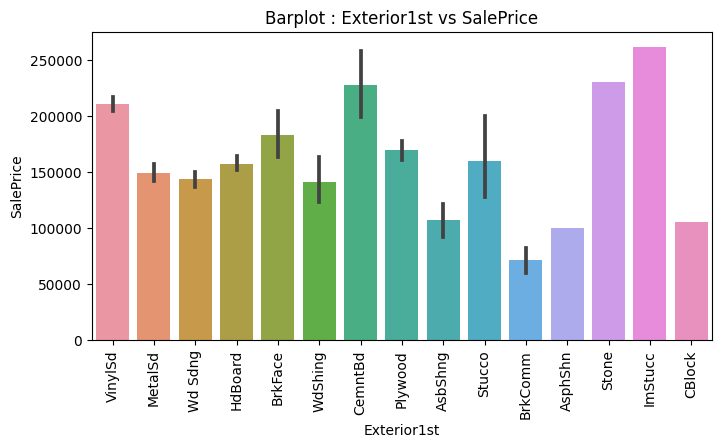

------------- column :: Exterior2nd -----------


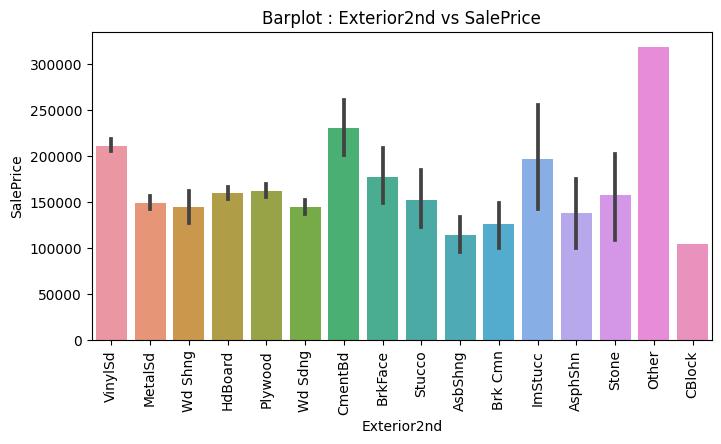

------------- column :: MasVnrType -----------


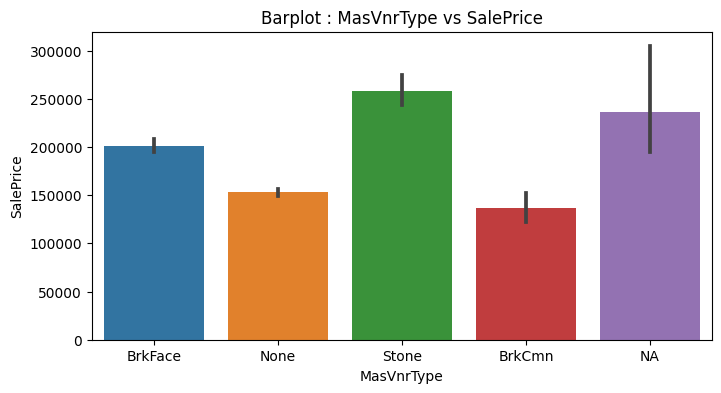

------------- column :: ExterQual -----------


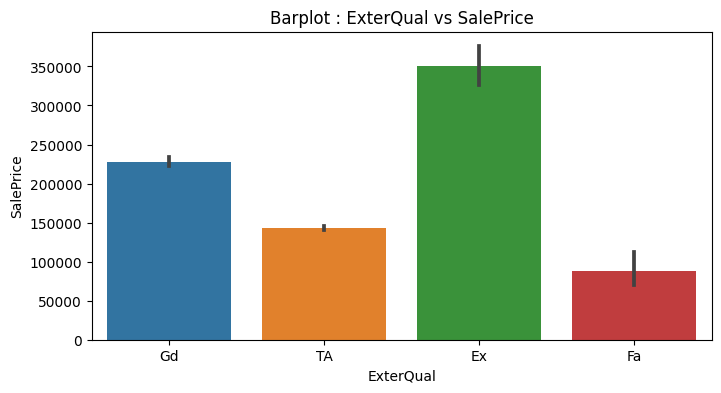

------------- column :: ExterCond -----------


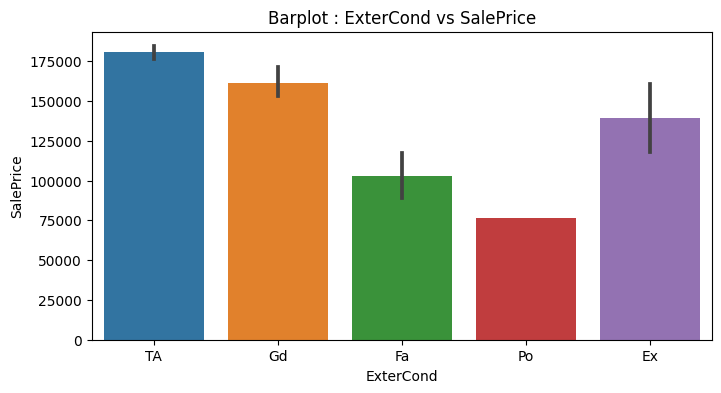

------------- column :: Foundation -----------


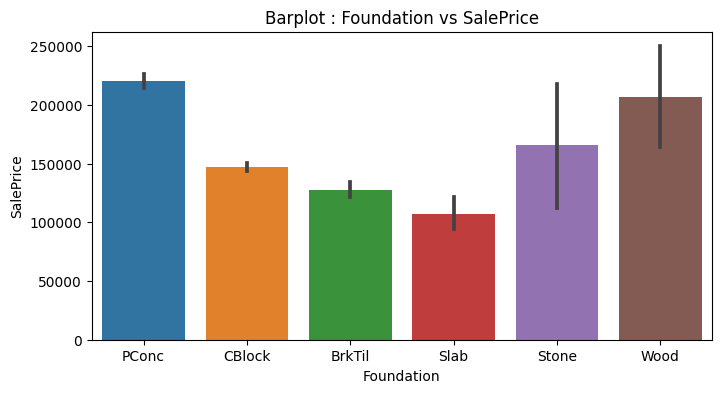

------------- column :: BsmtQual -----------


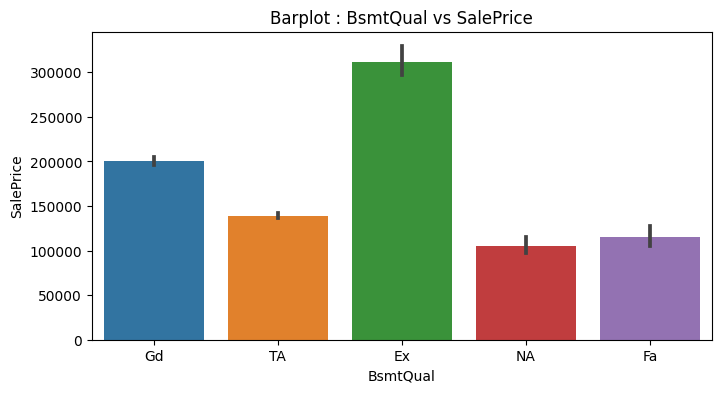

------------- column :: BsmtCond -----------


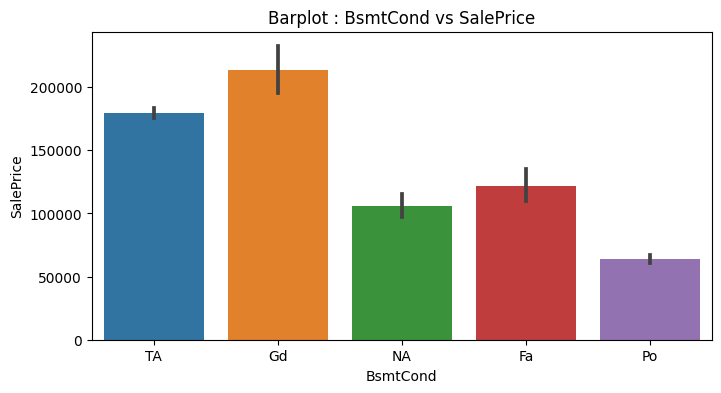

------------- column :: BsmtExposure -----------


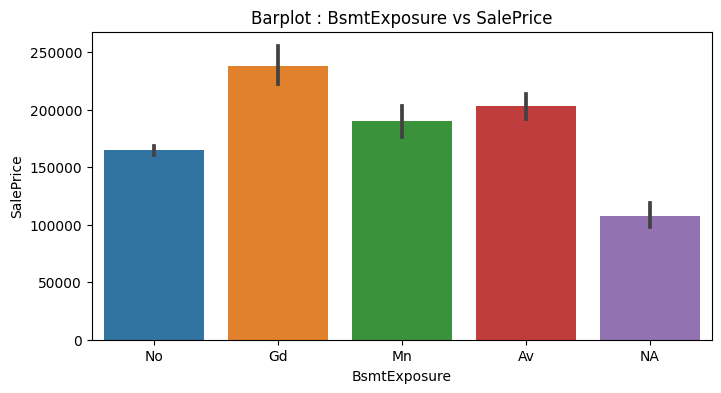

------------- column :: BsmtFinType1 -----------


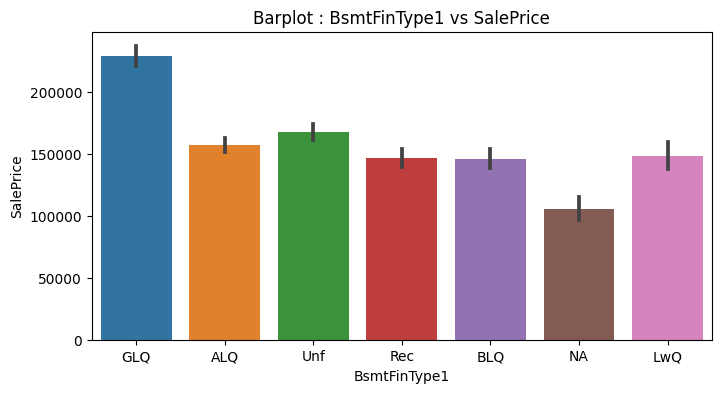

------------- column :: BsmtFinType2 -----------


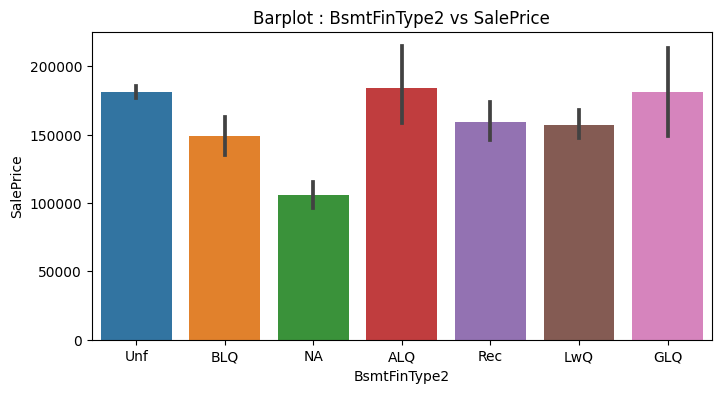

------------- column :: Heating -----------


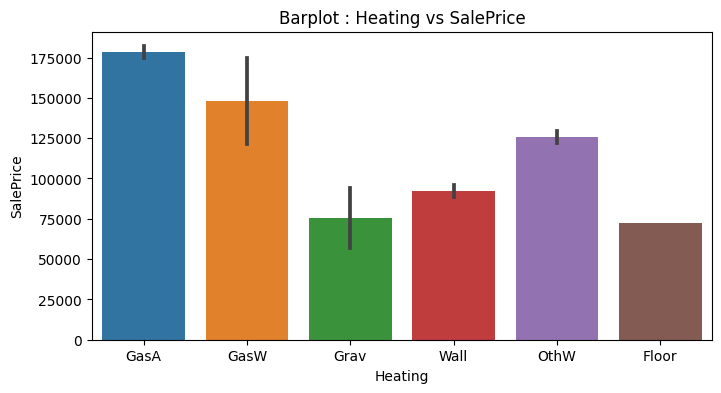

------------- column :: HeatingQC -----------


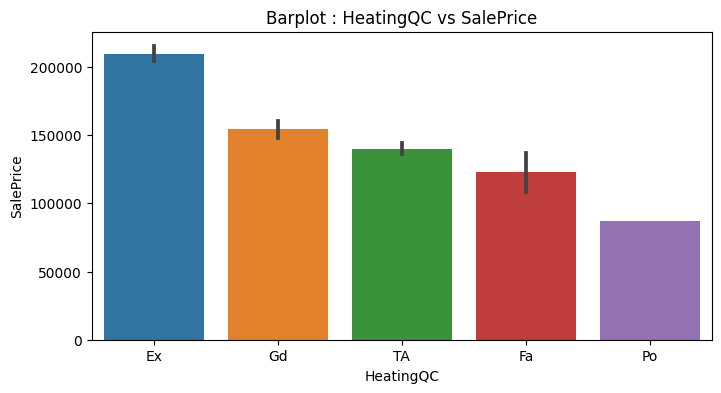

------------- column :: CentralAir -----------


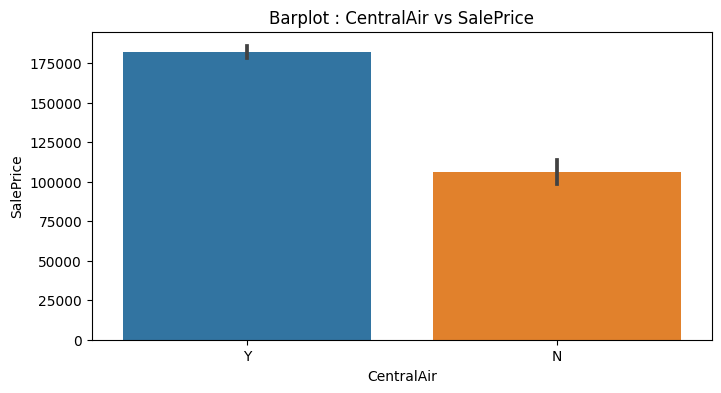

------------- column :: Electrical -----------


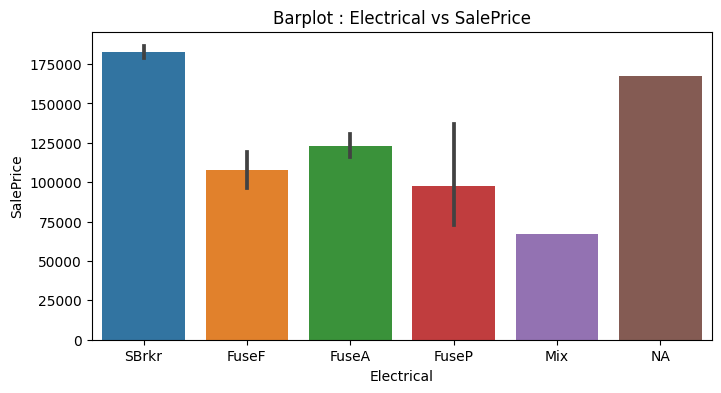

------------- column :: BsmtFullBath -----------


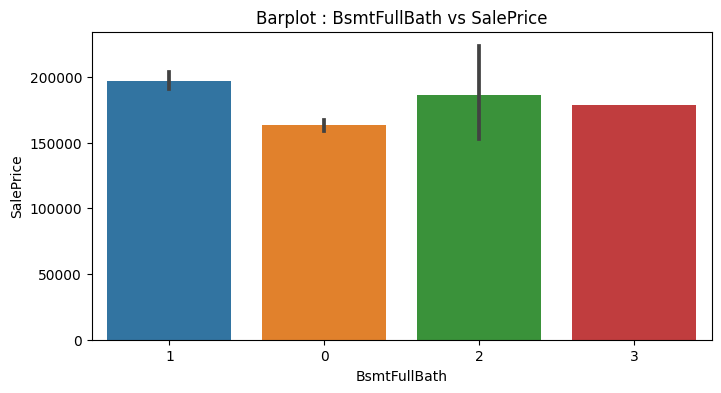

------------- column :: BsmtHalfBath -----------


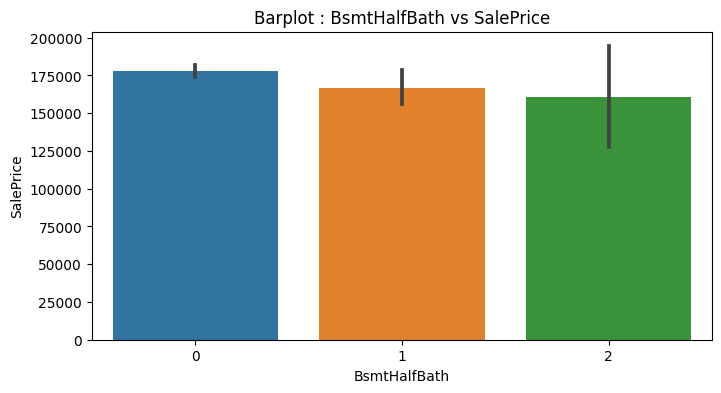

------------- column :: FullBath -----------


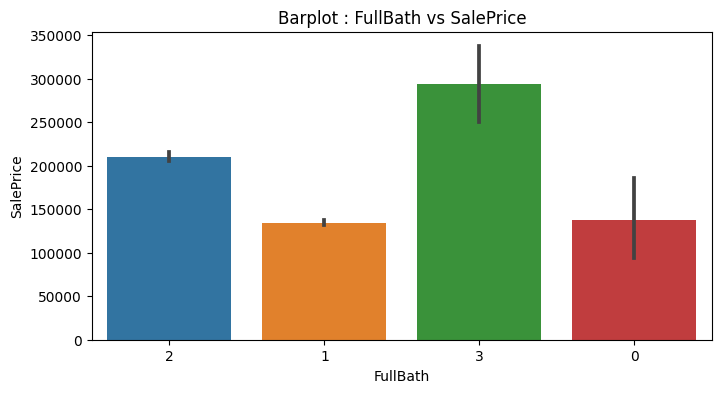

------------- column :: HalfBath -----------


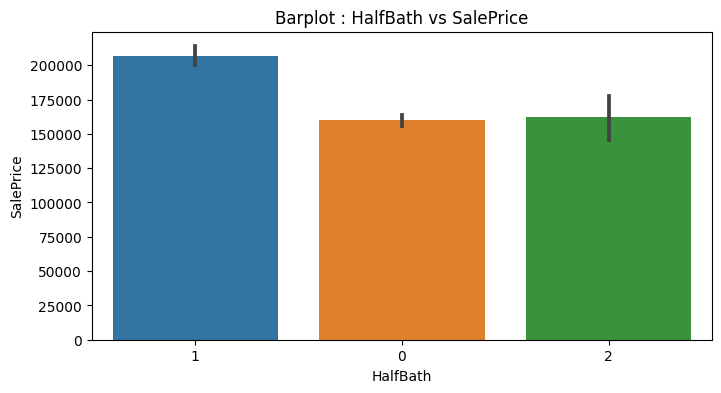

------------- column :: BedroomAbvGr -----------


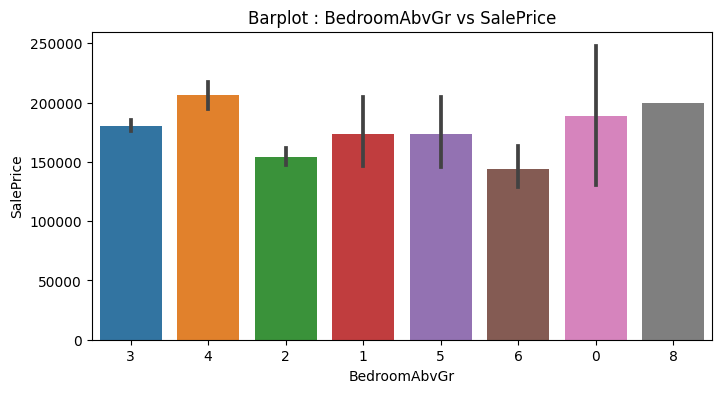

------------- column :: KitchenAbvGr -----------


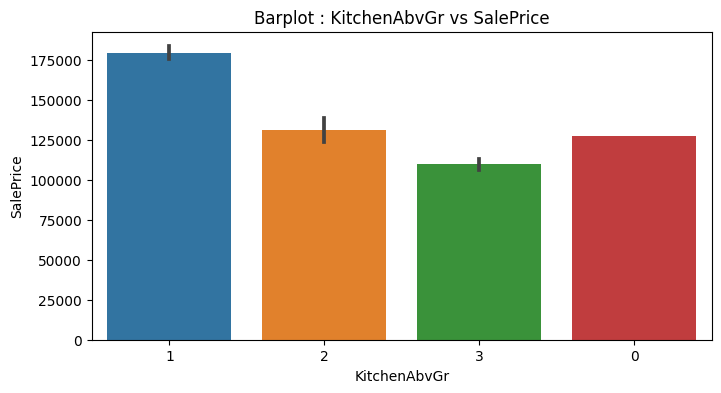

------------- column :: KitchenQual -----------


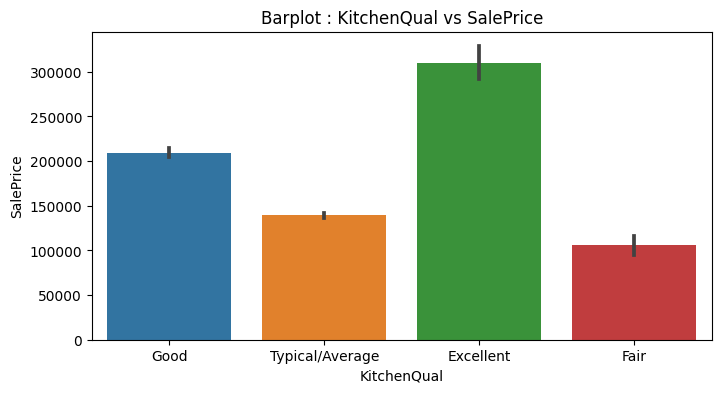

------------- column :: TotRmsAbvGrd -----------


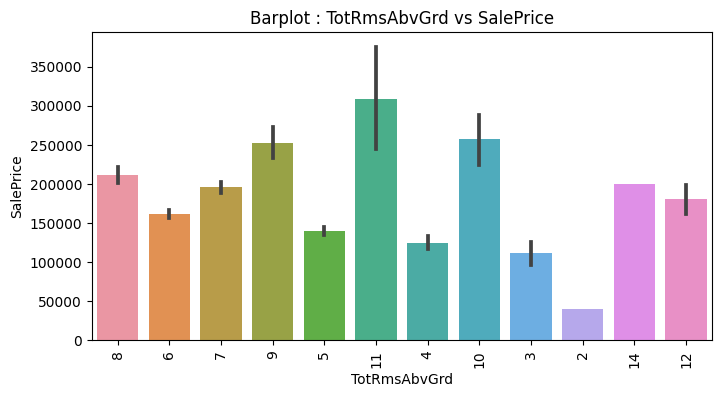

------------- column :: Functional -----------


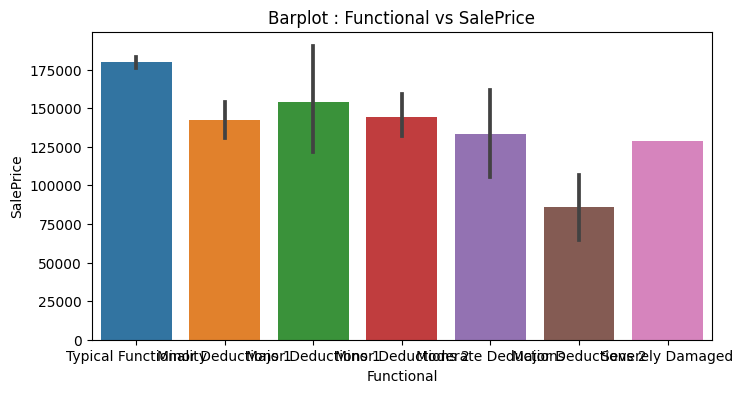

------------- column :: Fireplaces -----------


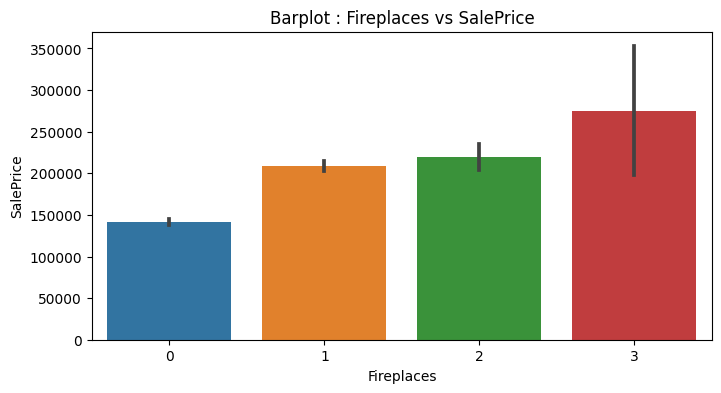

------------- column :: FireplaceQu -----------


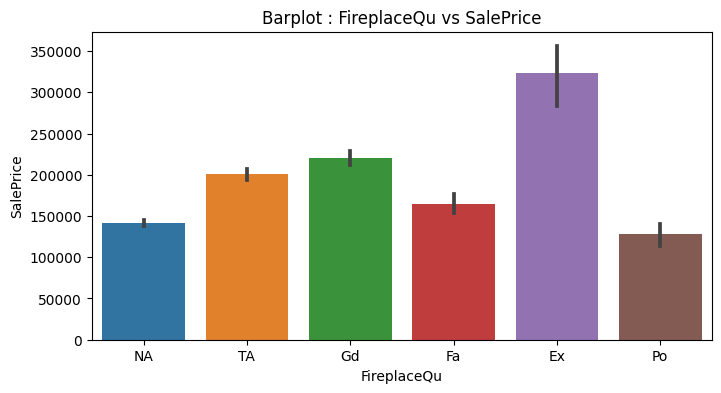

------------- column :: GarageType -----------


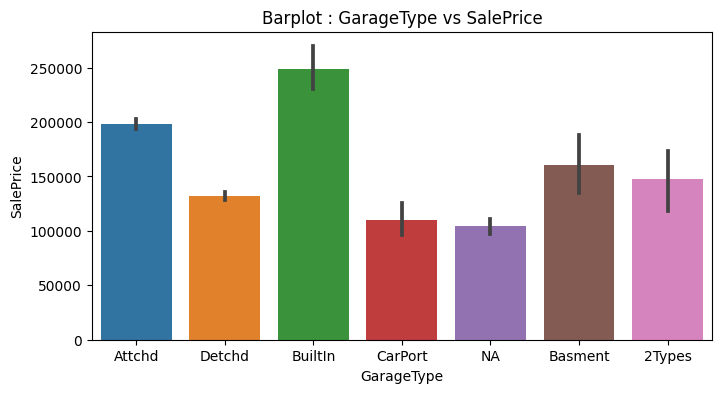

------------- column :: GarageFinish -----------


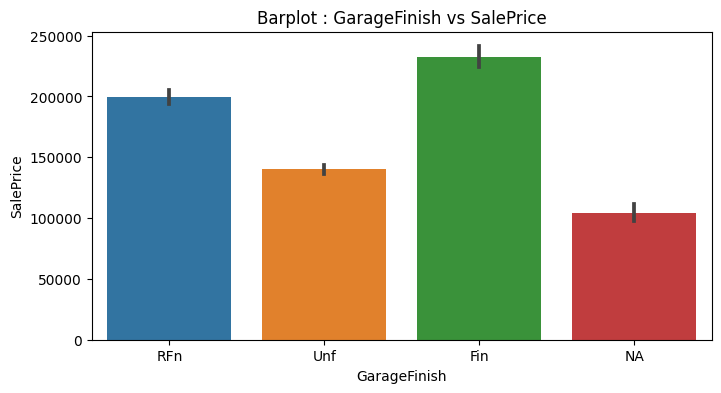

------------- column :: GarageCars -----------


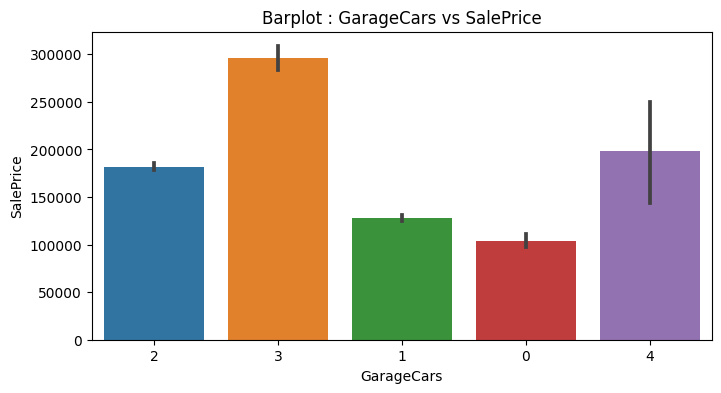

------------- column :: GarageQual -----------


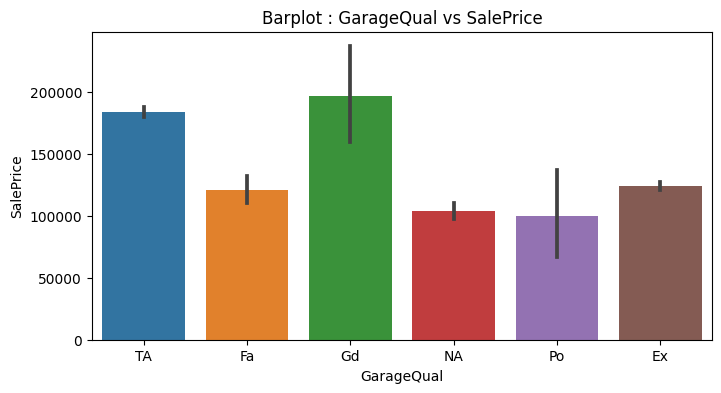

------------- column :: GarageCond -----------


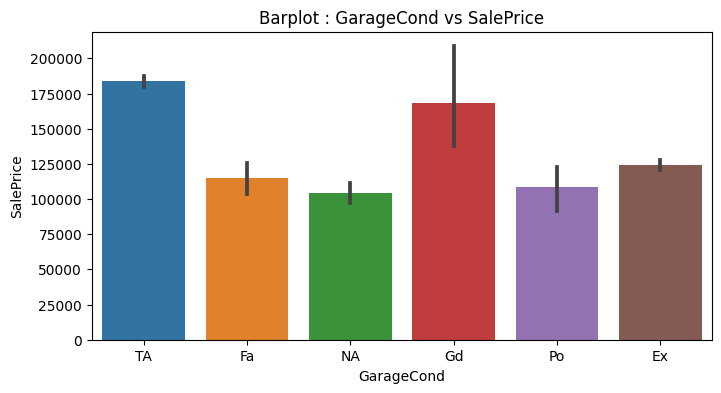

------------- column :: PavedDrive -----------


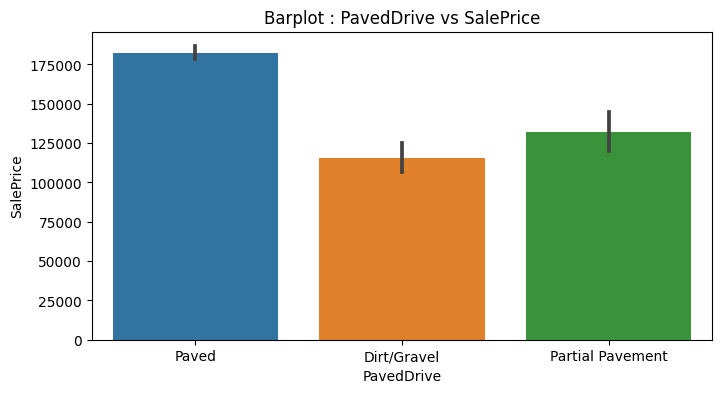

------------- column :: Fence -----------


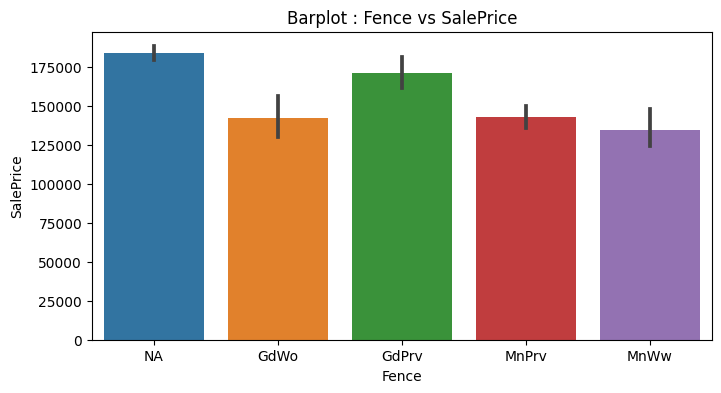

------------- column :: MoSold -----------


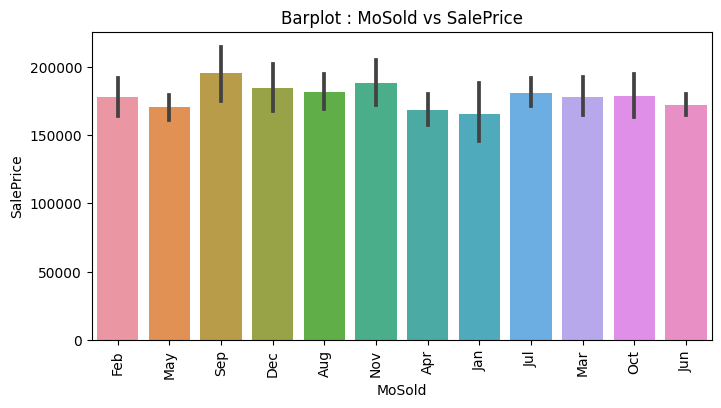

------------- column :: YrSold -----------


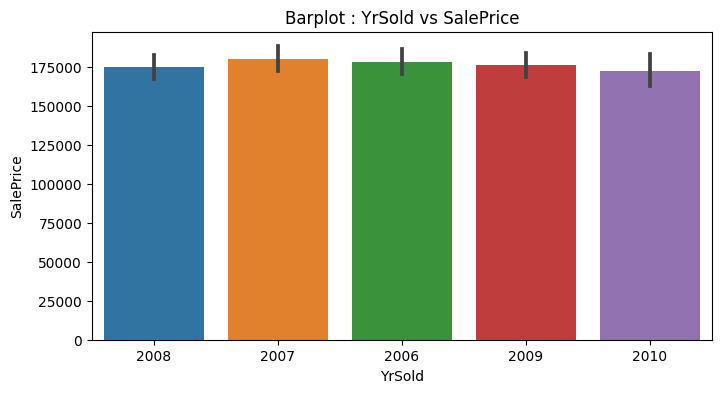

------------- column :: SaleType -----------


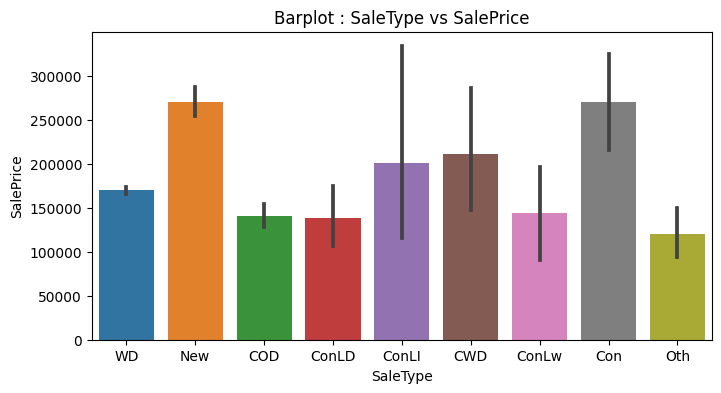

------------- column :: SaleCondition -----------


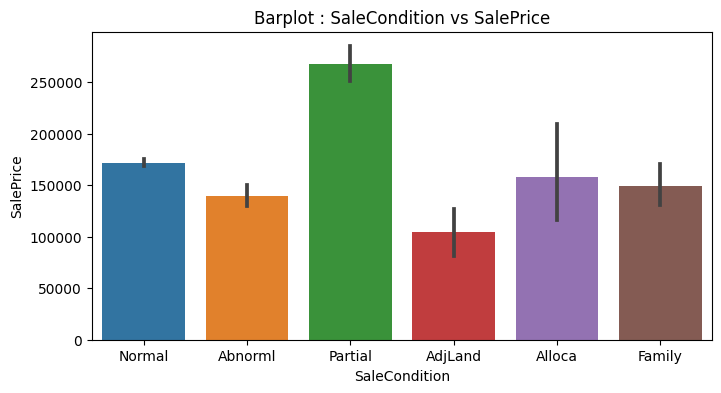

In [437]:
for col in categorical_columns:
    barplot_categorical_column(col)

In [438]:
### Box plot for categorical ield with Salesprice

In [439]:
def boxplot_with_Salesprice(column_name):
    print(f'------ column : {column_name} --------')
    sns.boxplot(x =column_name, y ='SalePrice', data = housing)
    if housing[column_name].nunique() > 10:
        plt.xticks(rotation=90)
    plt.title(f'Box plot of {column_name} with SalePrice')
    plt.xlabel(column_name)
    plt.ylabel('SalePrice')
    plt.show()

------ column : MSSubClass --------


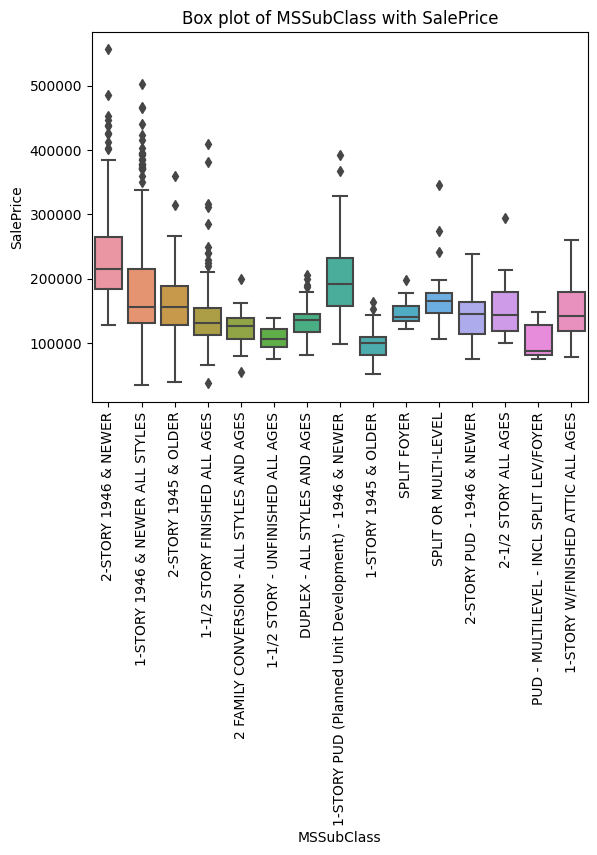

------ column : MSZoning --------


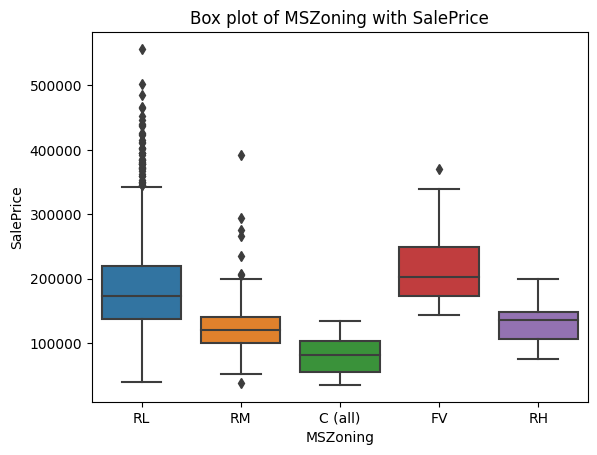

------ column : Street --------


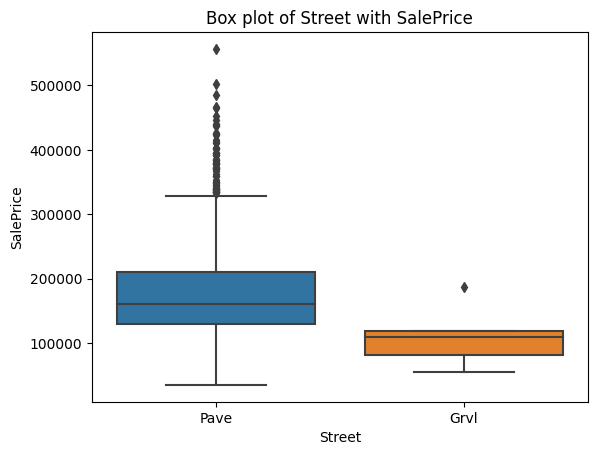

------ column : Alley --------


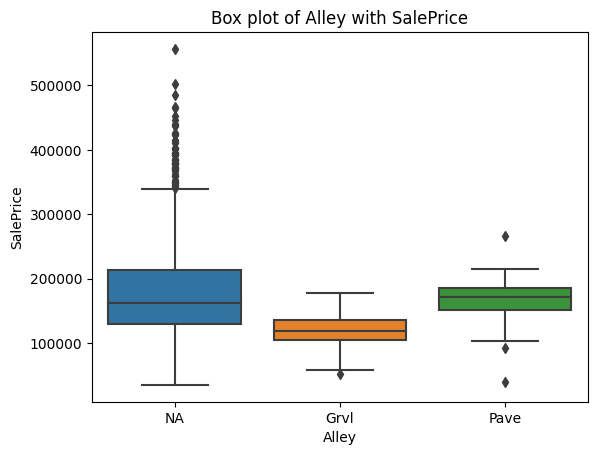

------ column : LotShape --------


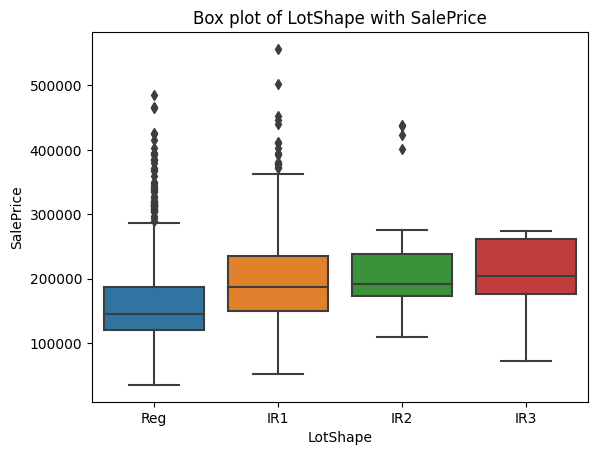

------ column : LandContour --------


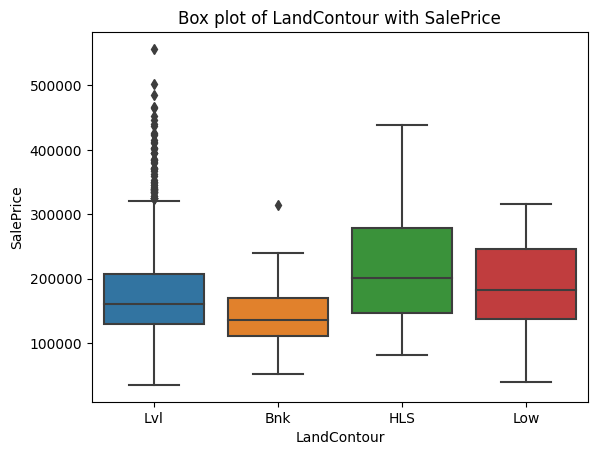

------ column : Utilities --------


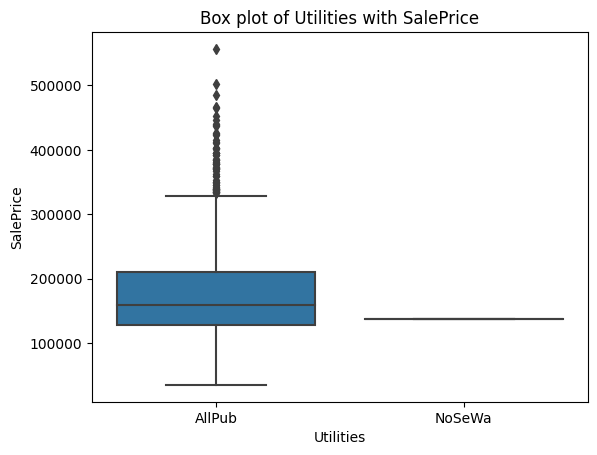

------ column : LotConfig --------


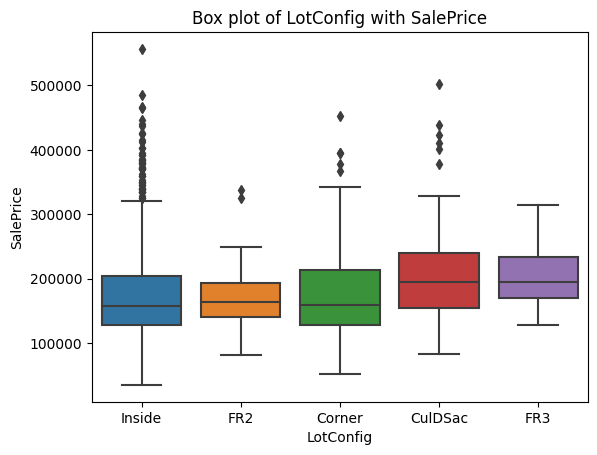

------ column : LandSlope --------


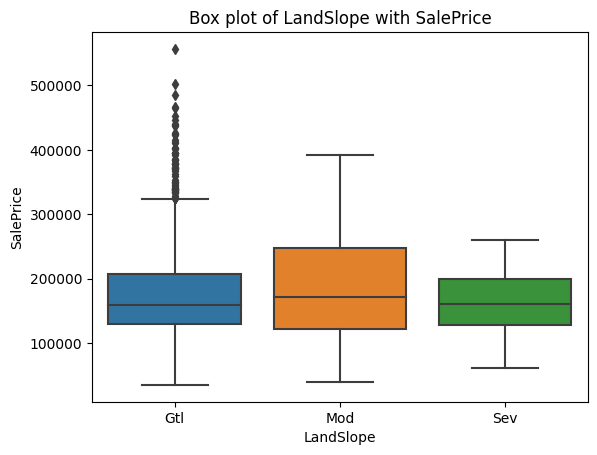

------ column : Neighborhood --------


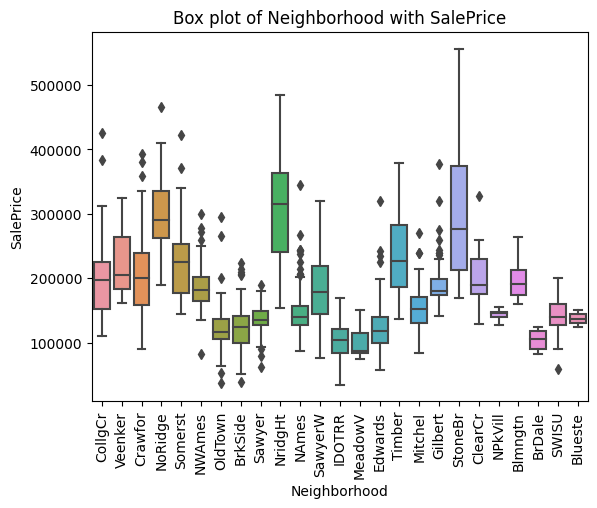

------ column : Condition1 --------


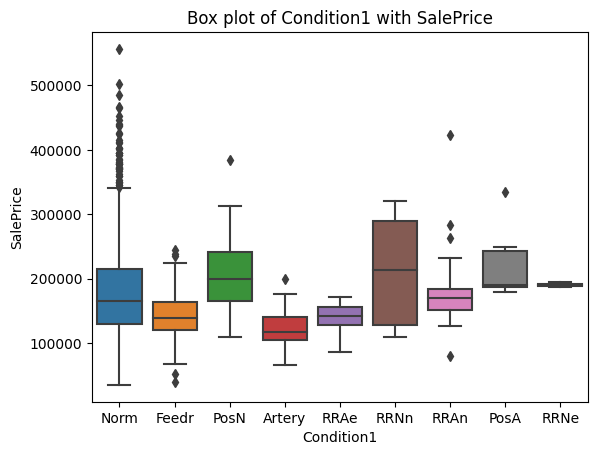

------ column : Condition2 --------


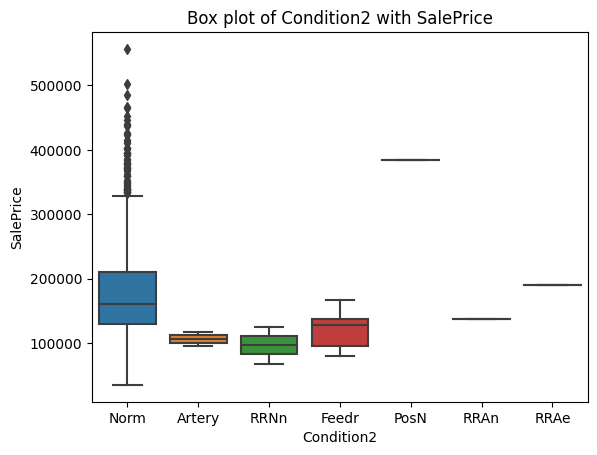

------ column : BldgType --------


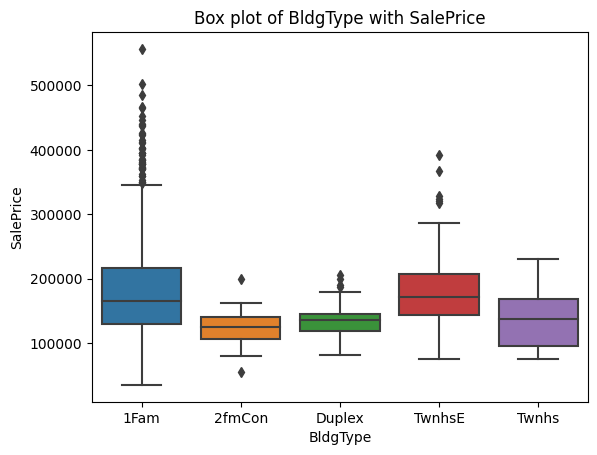

------ column : HouseStyle --------


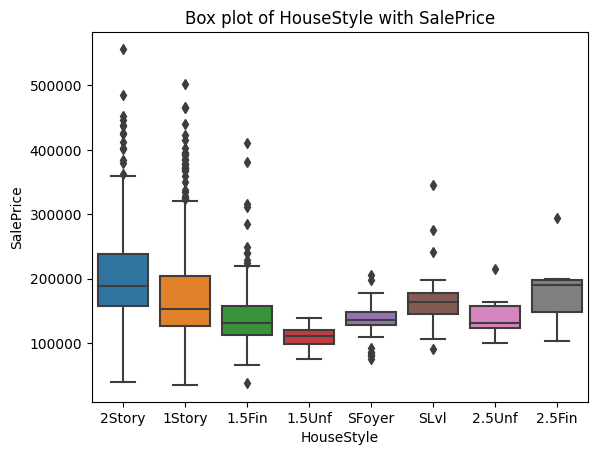

------ column : OverallQual --------


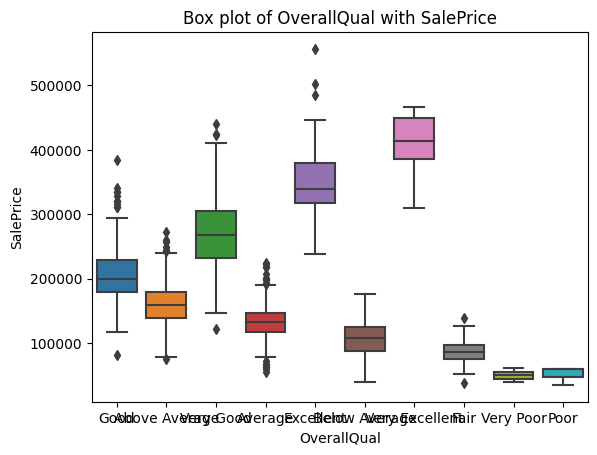

------ column : OverallCond --------


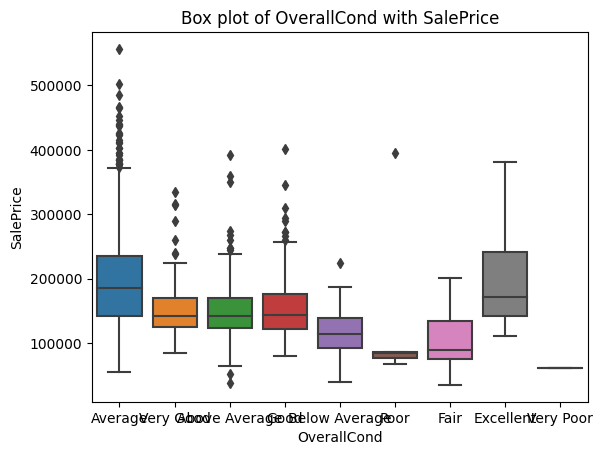

------ column : RoofStyle --------


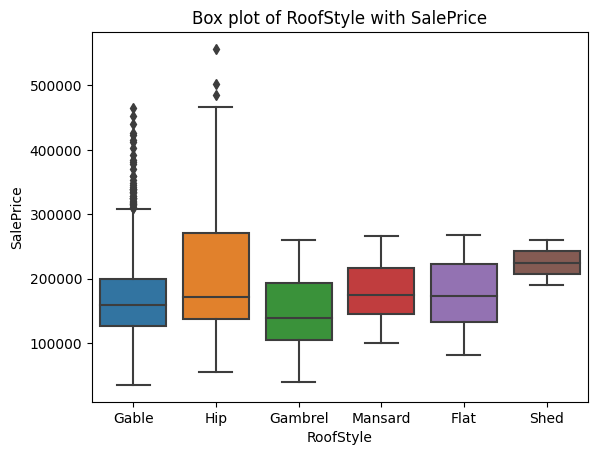

------ column : RoofMatl --------


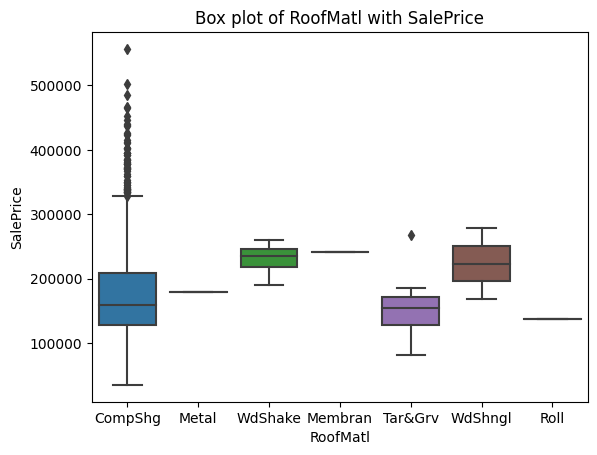

------ column : Exterior1st --------


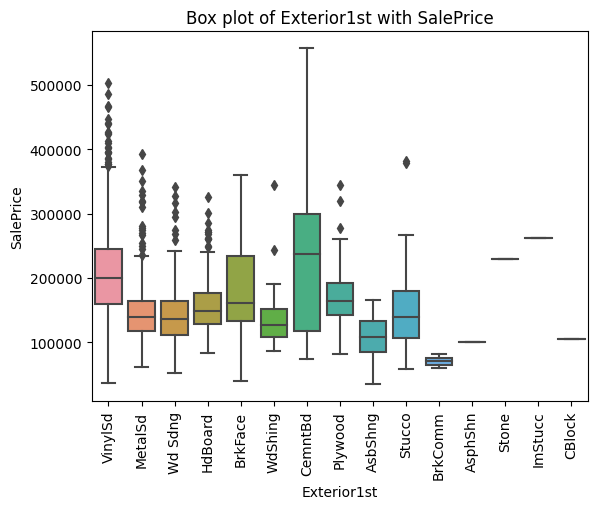

------ column : Exterior2nd --------


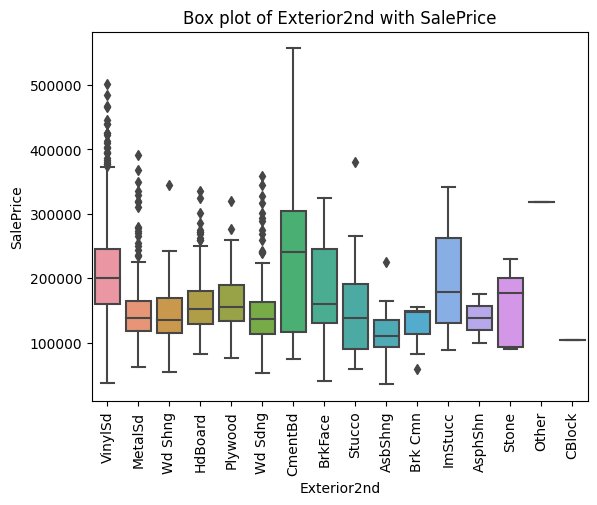

------ column : MasVnrType --------


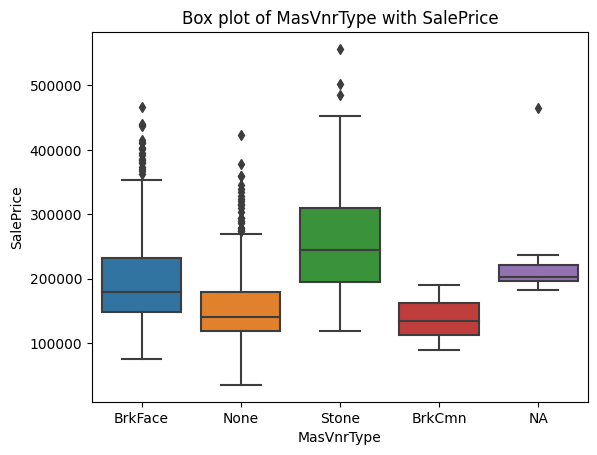

------ column : ExterQual --------


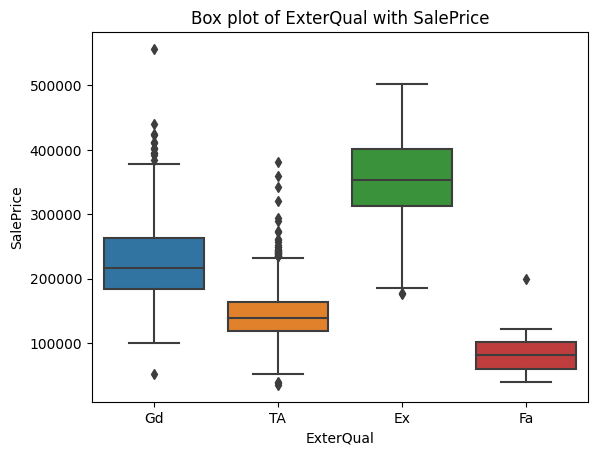

------ column : ExterCond --------


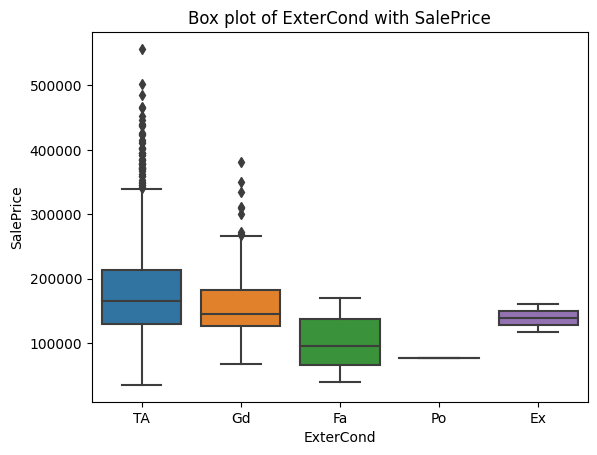

------ column : Foundation --------


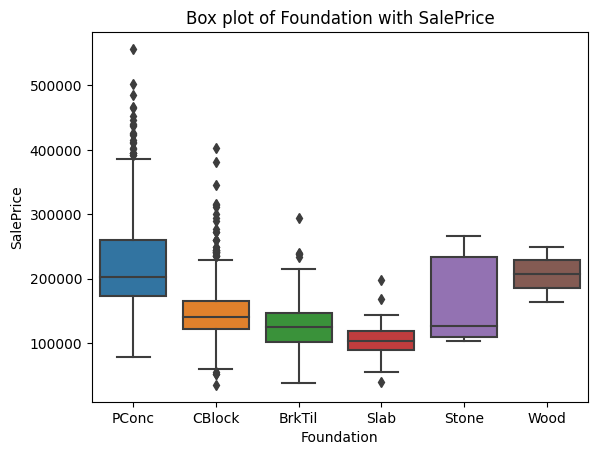

------ column : BsmtQual --------


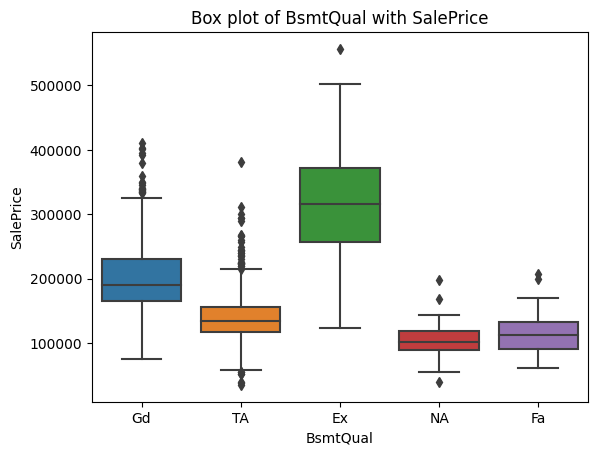

------ column : BsmtCond --------


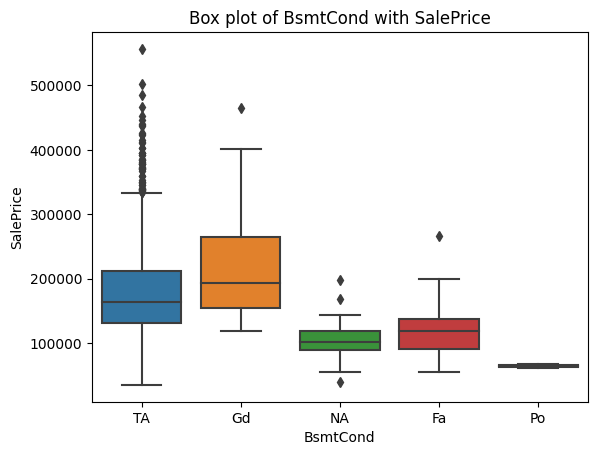

------ column : BsmtExposure --------


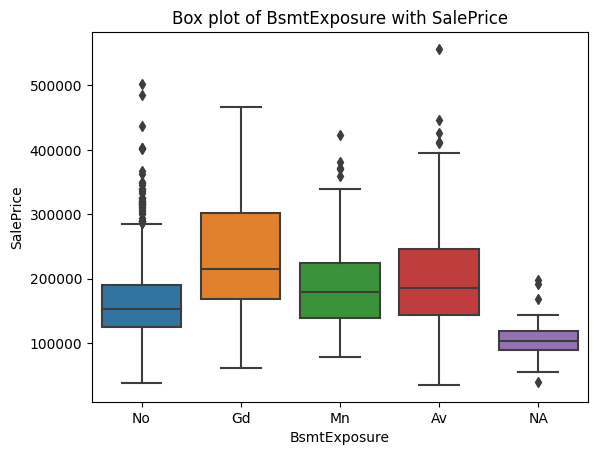

------ column : BsmtFinType1 --------


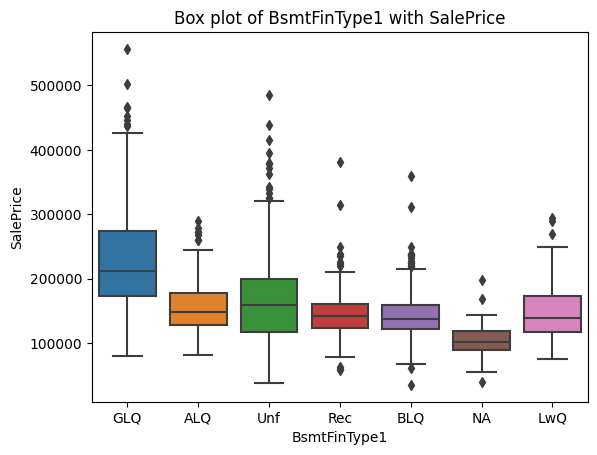

------ column : BsmtFinType2 --------


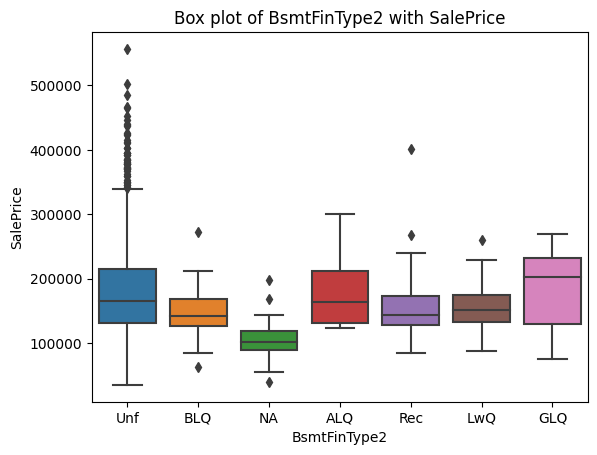

------ column : Heating --------


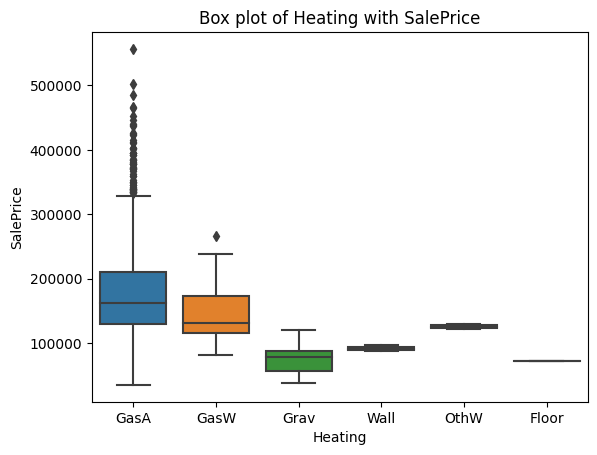

------ column : HeatingQC --------


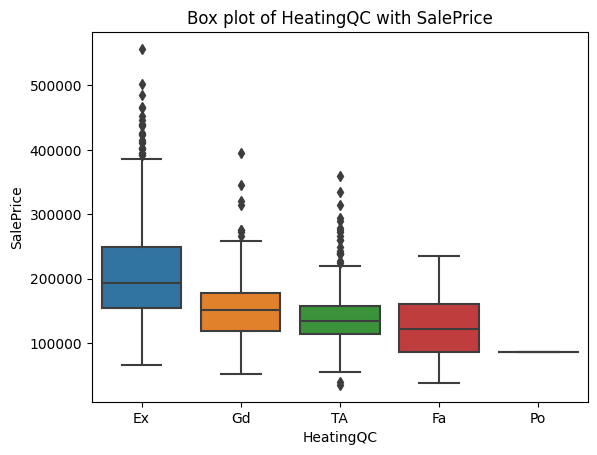

------ column : CentralAir --------


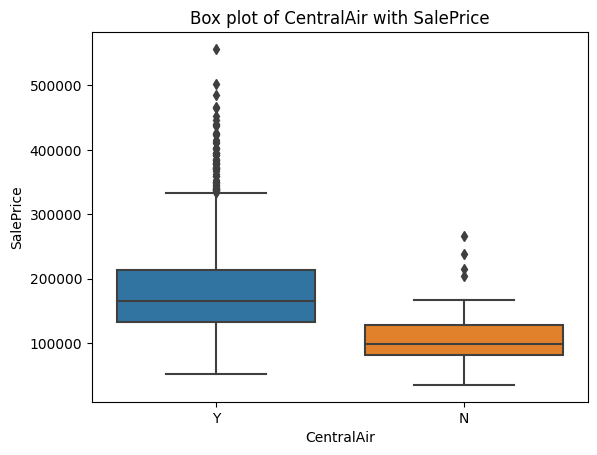

------ column : Electrical --------


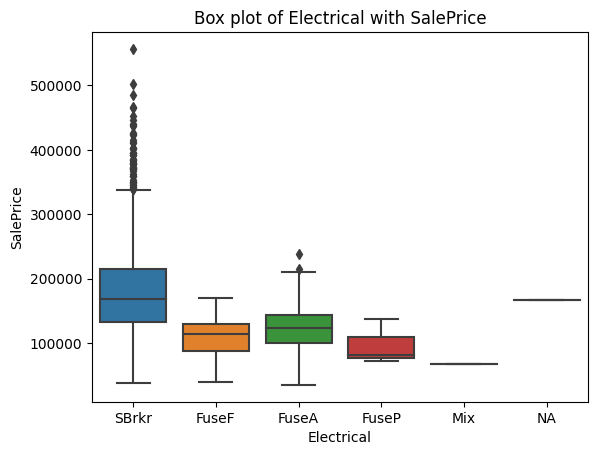

------ column : BsmtFullBath --------


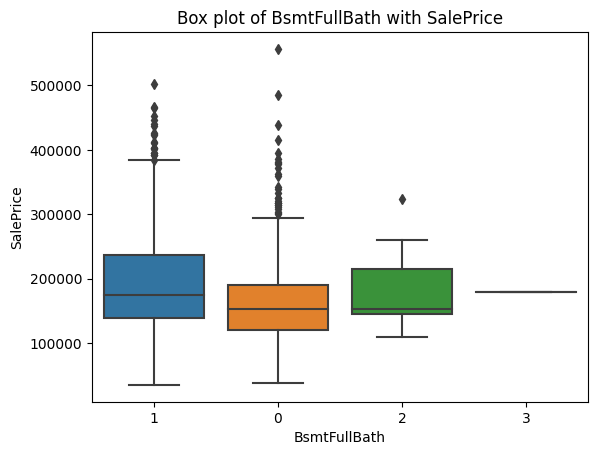

------ column : BsmtHalfBath --------


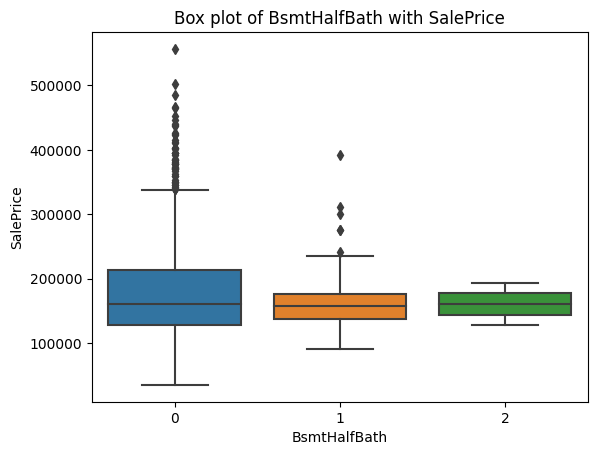

------ column : FullBath --------


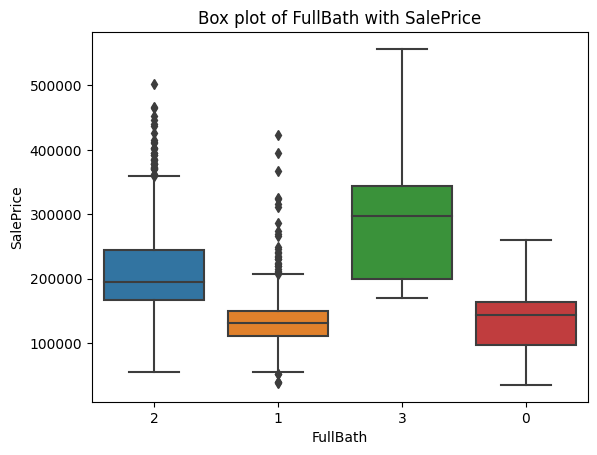

------ column : HalfBath --------


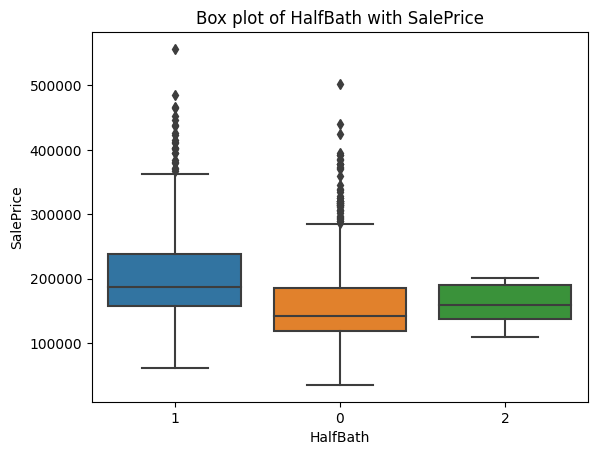

------ column : BedroomAbvGr --------


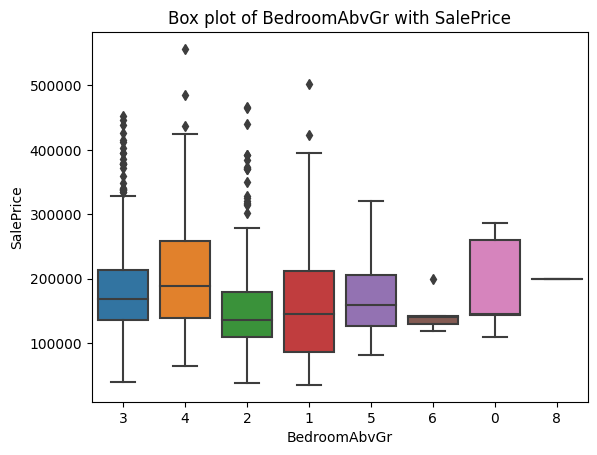

------ column : KitchenAbvGr --------


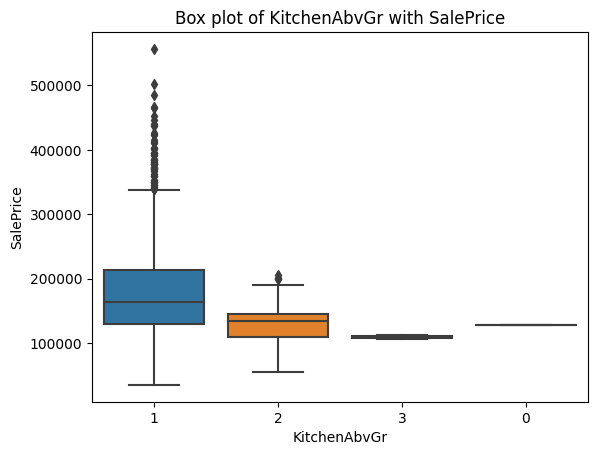

------ column : KitchenQual --------


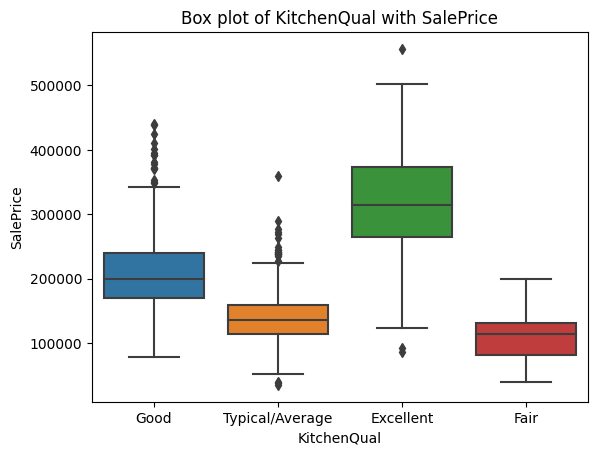

------ column : TotRmsAbvGrd --------


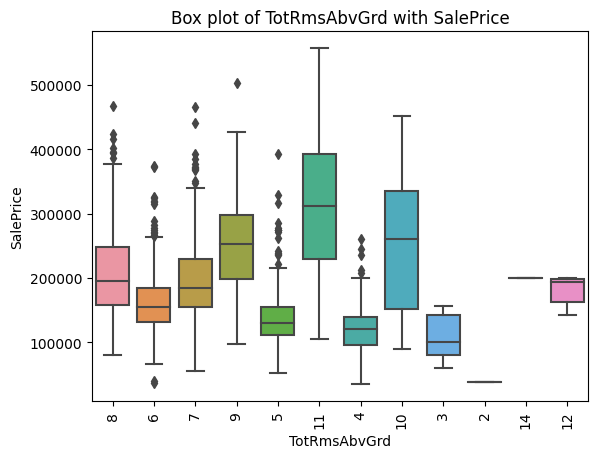

------ column : Functional --------


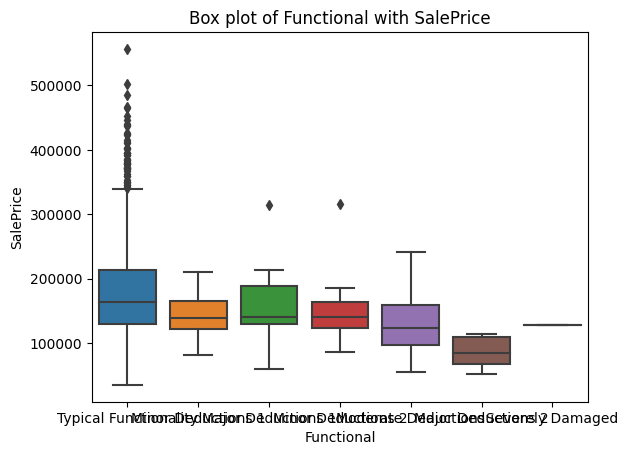

------ column : Fireplaces --------


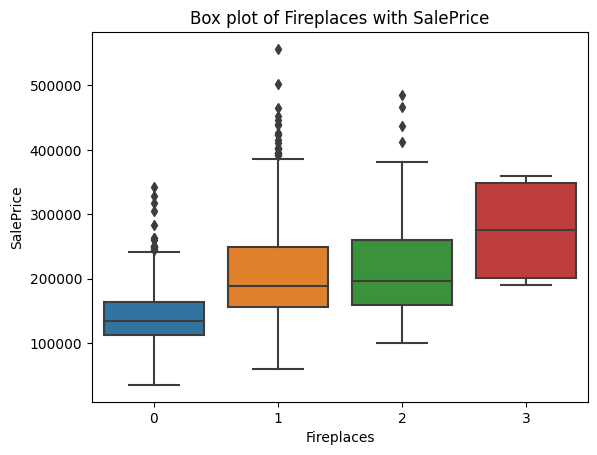

------ column : FireplaceQu --------


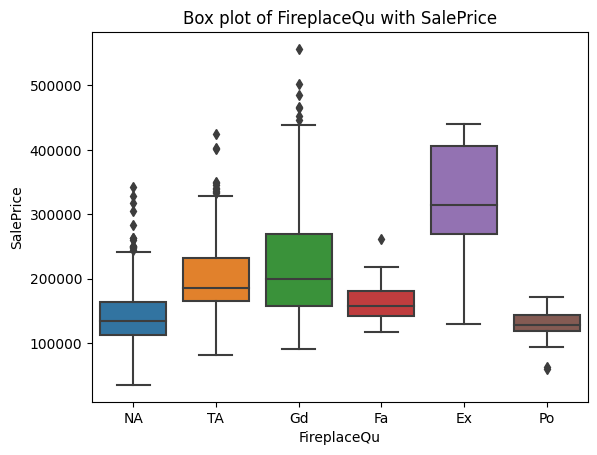

------ column : GarageType --------


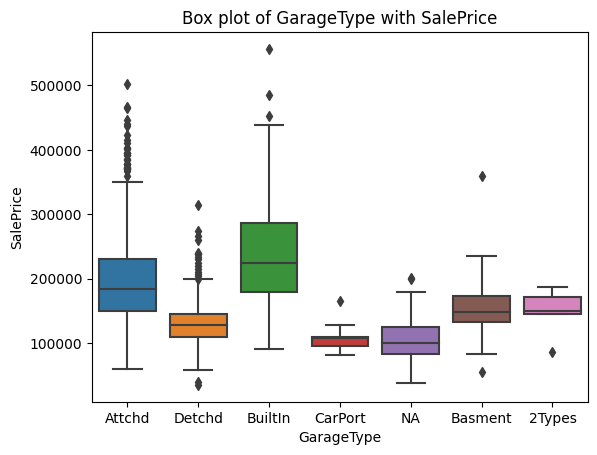

------ column : GarageFinish --------


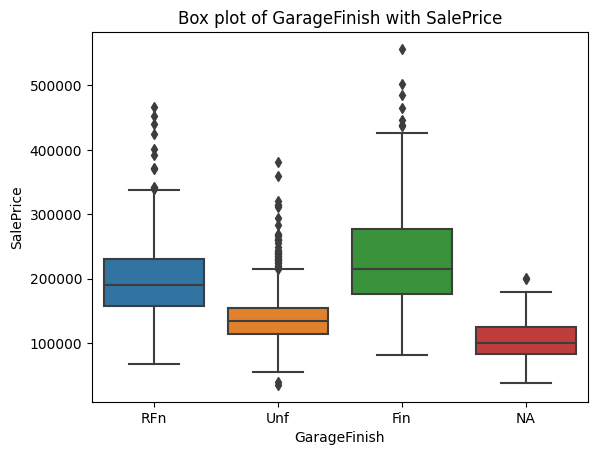

------ column : GarageCars --------


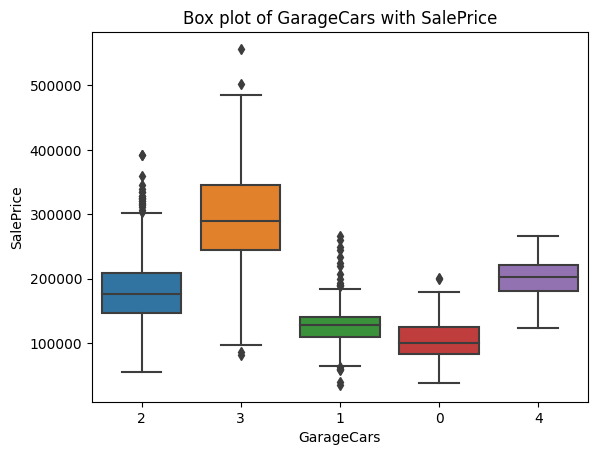

------ column : GarageQual --------


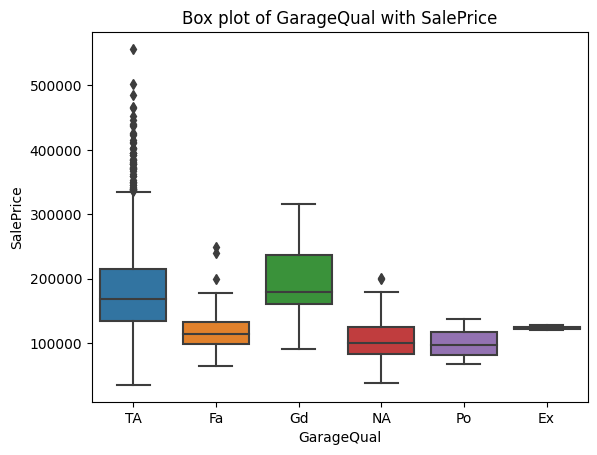

------ column : GarageCond --------


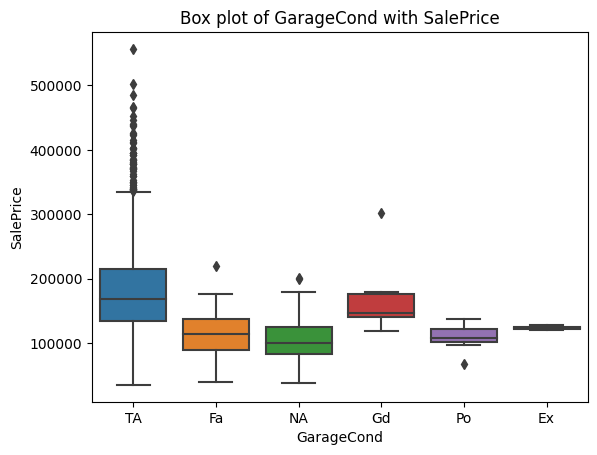

------ column : PavedDrive --------


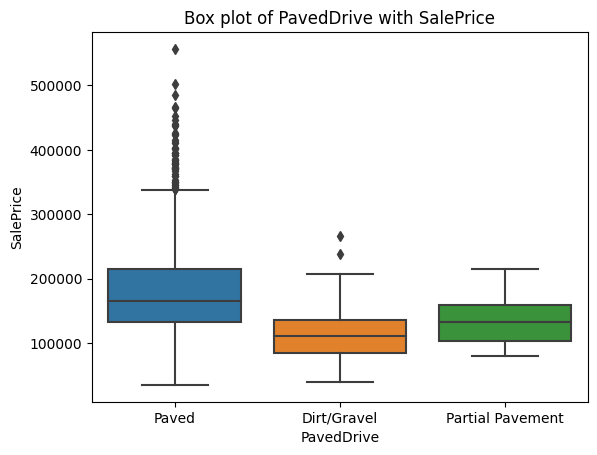

------ column : Fence --------


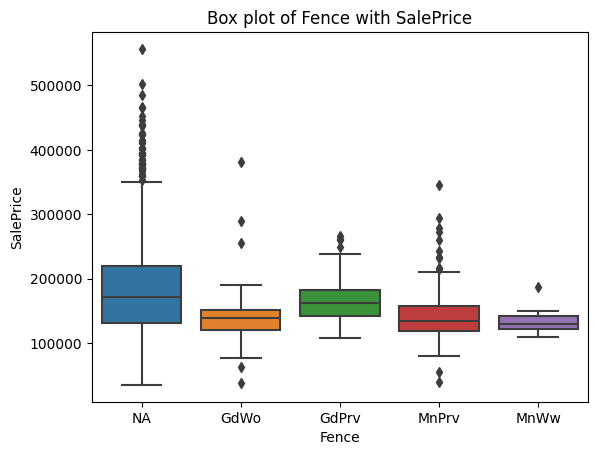

------ column : MoSold --------


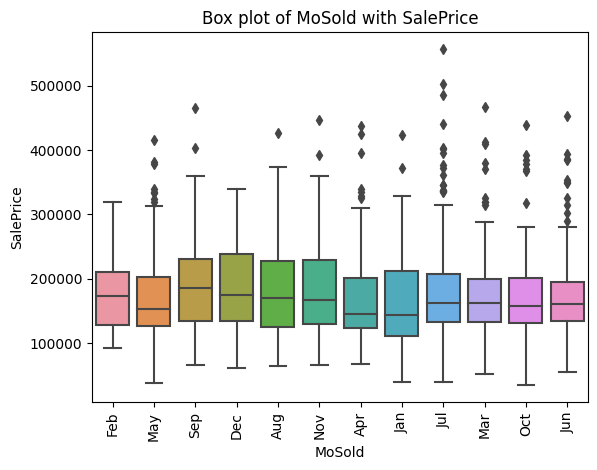

------ column : YrSold --------


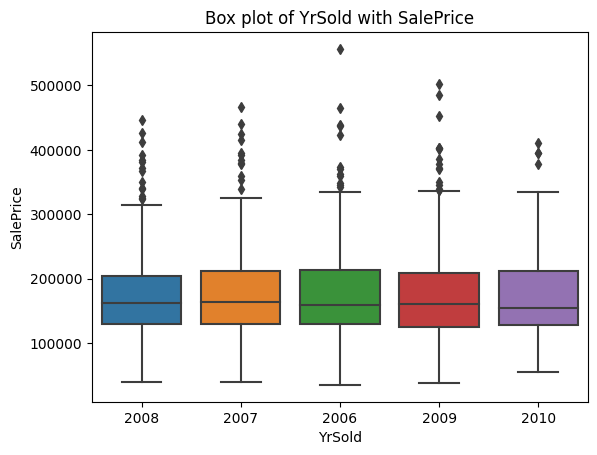

------ column : SaleType --------


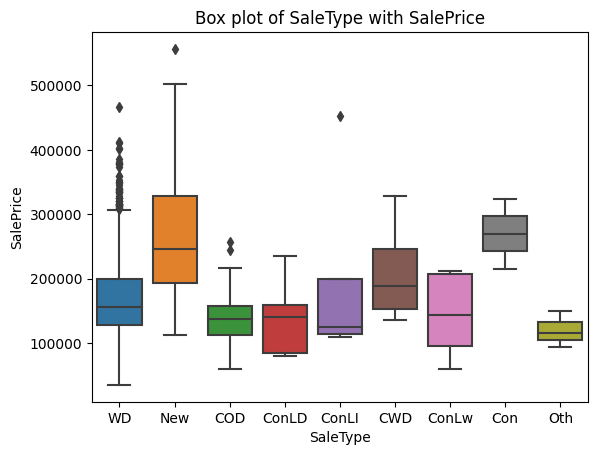

------ column : SaleCondition --------


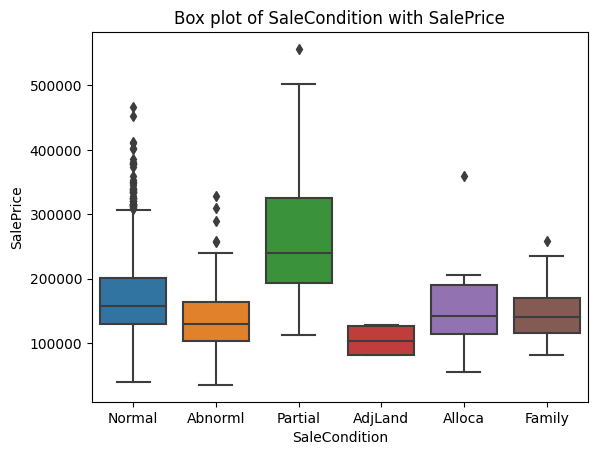

In [440]:
for col in categorical_columns:
    boxplot_with_Salesprice(col)

## Scatter plot for numerical columns

In [441]:
numerical_columns.extend(year_fields)
print(numerical_columns)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']


In [442]:
def scatter_plot_numerical_columns(column_name):
    print('--------- column name - ', column_name)
    plt.figure(figsize=(5,4))
#     plt.scatter(housing[column_name], housing['SalePrice'])
    sns.scatterplot(x=column_name, y='SalePrice',  hue='SalePrice', data=housing)
    plt.title(f'Scatter plot of {column_name} with SalePrice')
    plt.xlabel(column_name)
    plt.ylabel('SalePrice')
    plt.show()

--------- column name -  LotFrontage


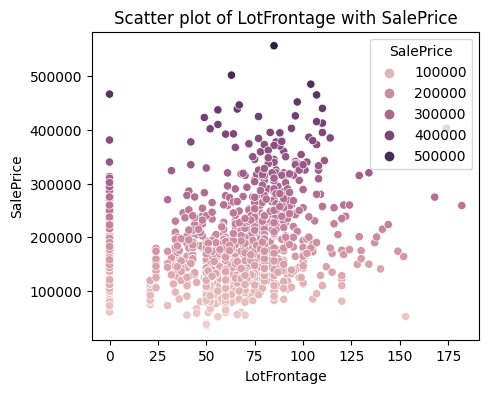

--------- column name -  LotArea


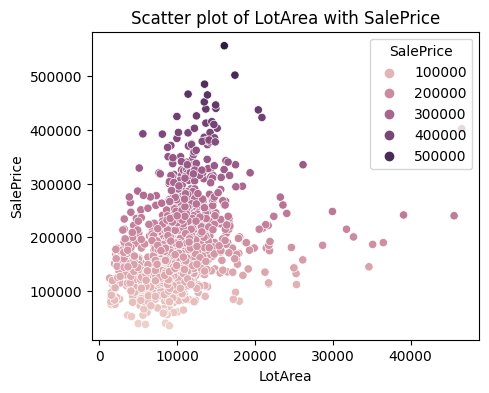

--------- column name -  MasVnrArea


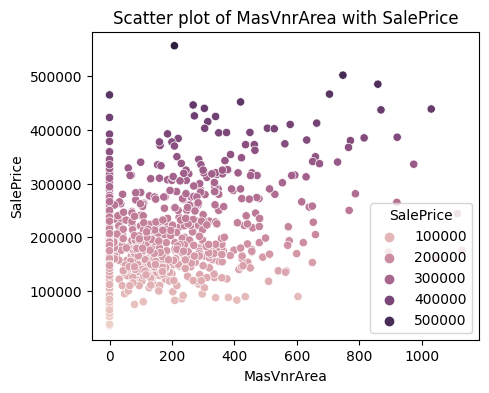

--------- column name -  BsmtFinSF1


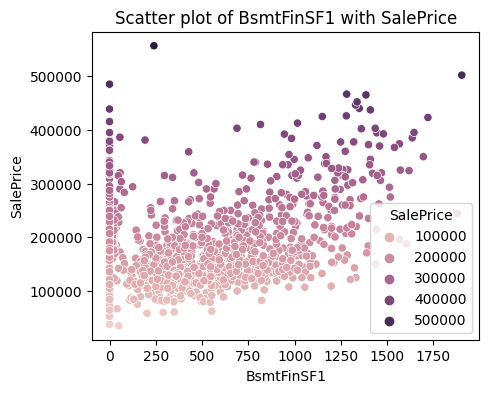

--------- column name -  BsmtFinSF2


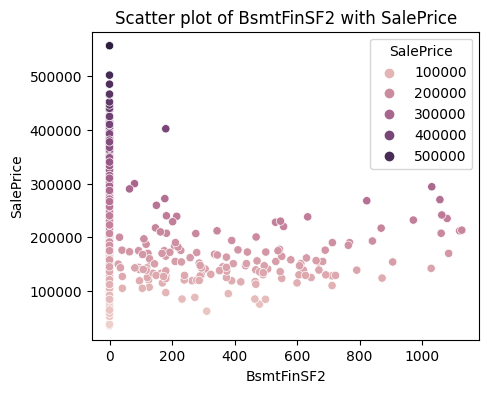

--------- column name -  BsmtUnfSF


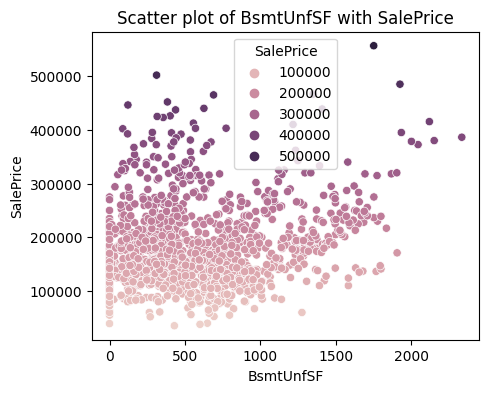

--------- column name -  TotalBsmtSF


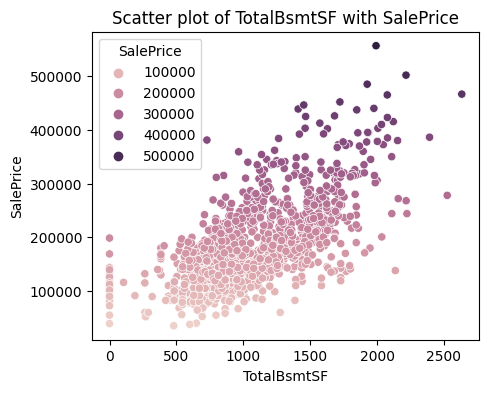

--------- column name -  1stFlrSF


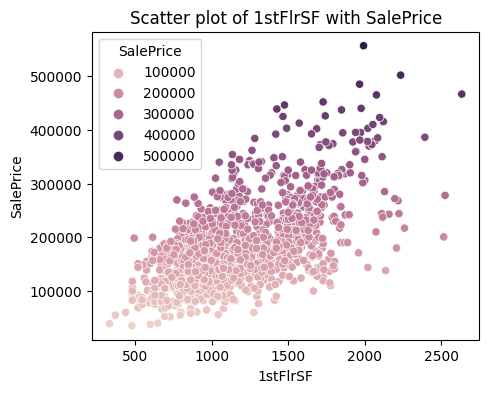

--------- column name -  2ndFlrSF


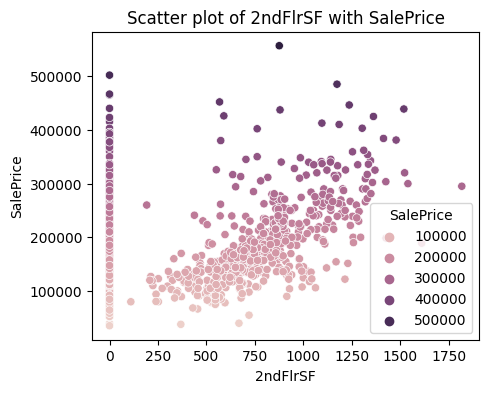

--------- column name -  LowQualFinSF


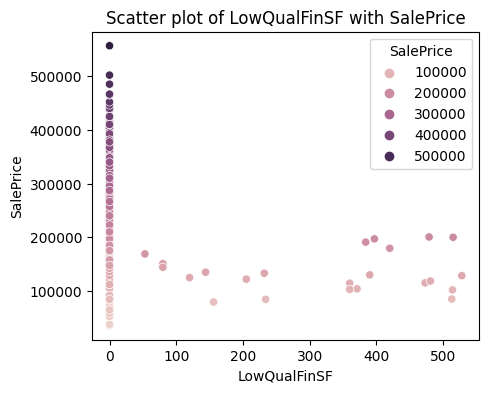

--------- column name -  GrLivArea


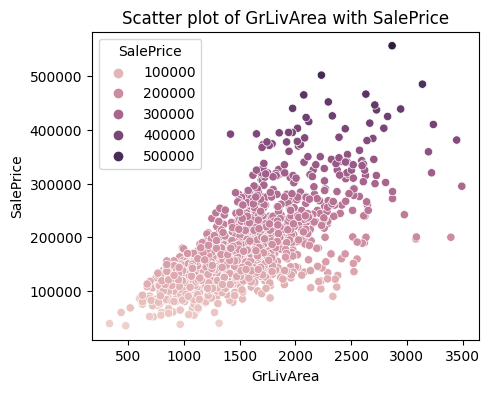

--------- column name -  GarageArea


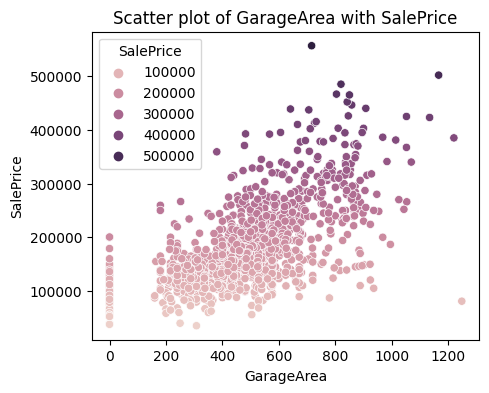

--------- column name -  WoodDeckSF


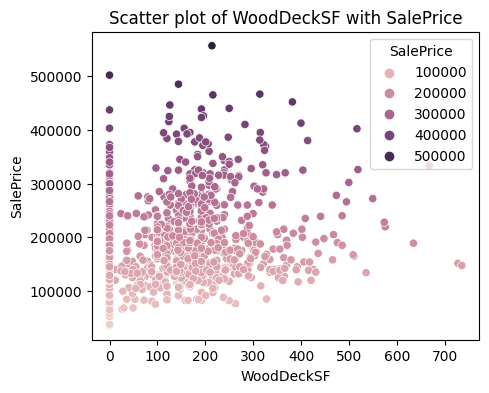

--------- column name -  OpenPorchSF


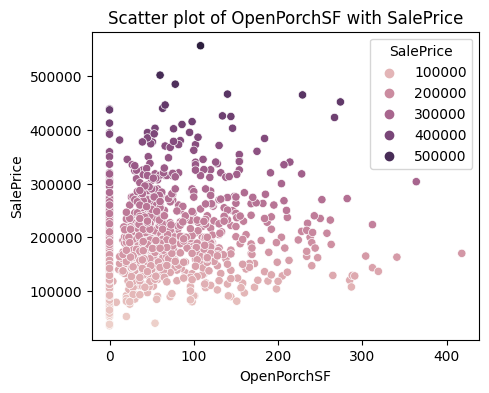

--------- column name -  EnclosedPorch


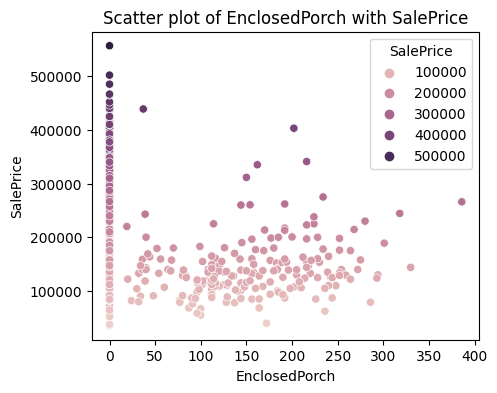

--------- column name -  3SsnPorch


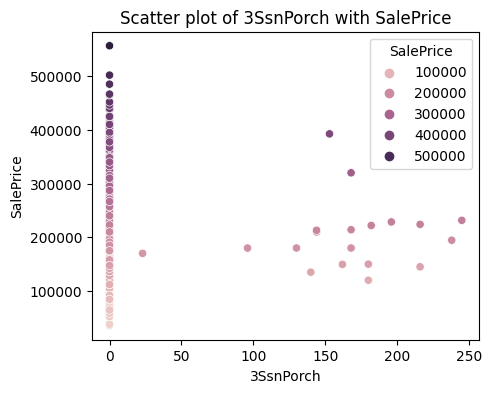

--------- column name -  ScreenPorch


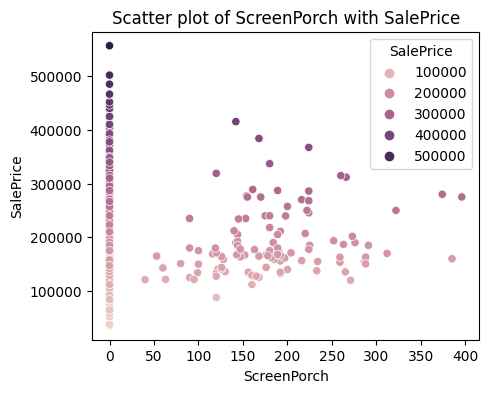

--------- column name -  PoolArea


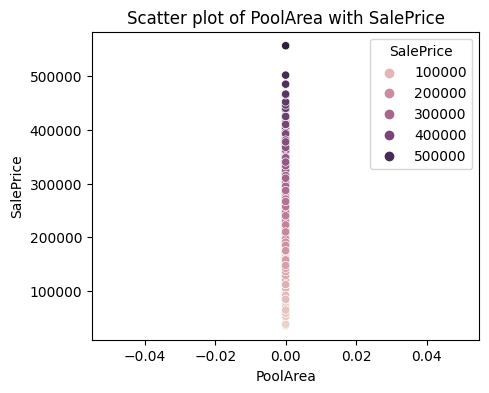

--------- column name -  MiscVal


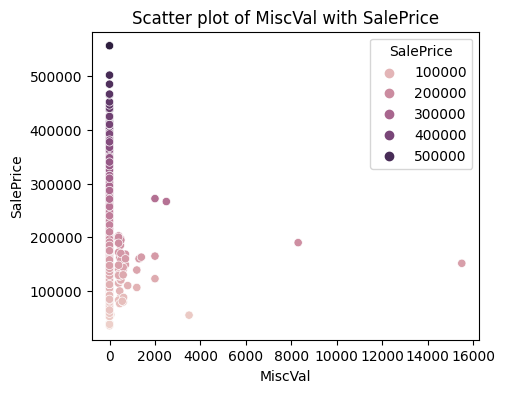

--------- column name -  SalePrice


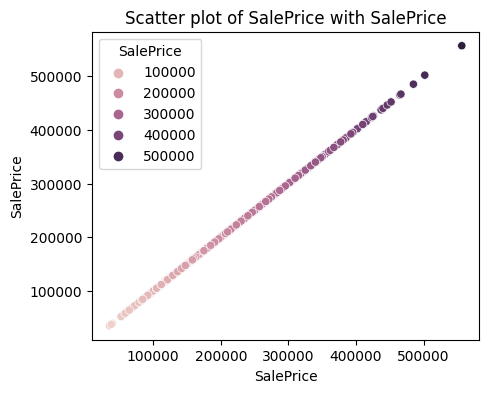

--------- column name -  YearBuilt


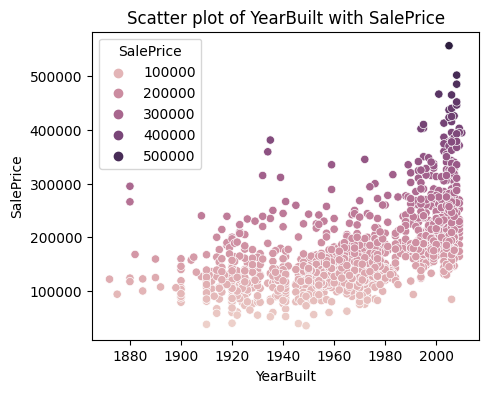

--------- column name -  YearRemodAdd


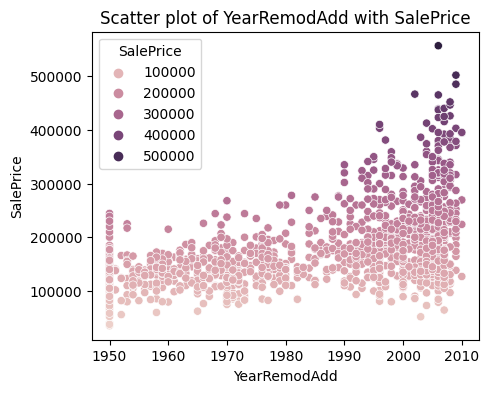

--------- column name -  GarageYrBlt


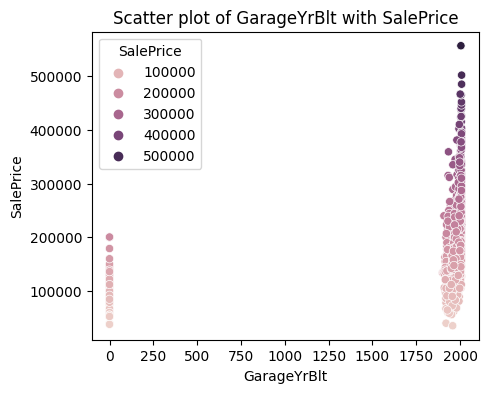

In [443]:
for col in numerical_columns:
    scatter_plot_numerical_columns(col)

## Analyzing the distribution of price for different year columns

--------- column name -  YearBuilt


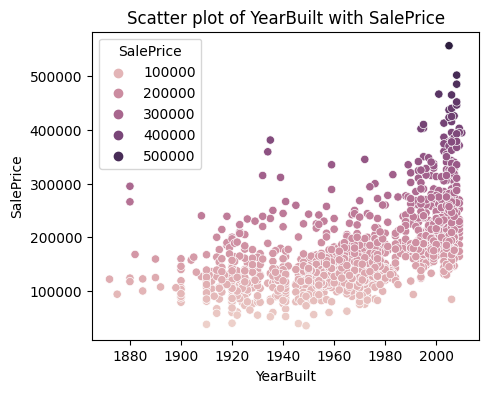

--------- column name -  YearRemodAdd


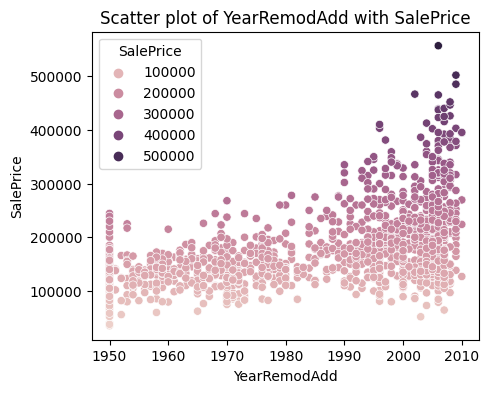

--------- column name -  GarageYrBlt


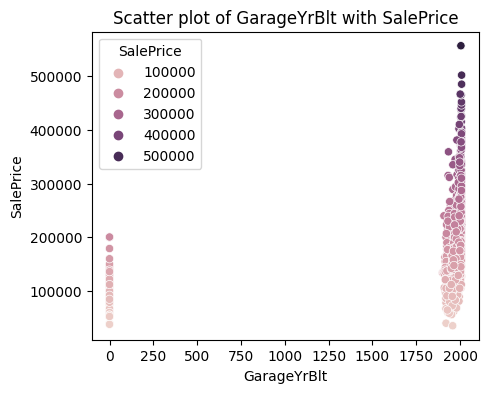

In [444]:
for col in year_fields:
    scatter_plot_numerical_columns(col)

### Heat map on numerical columns

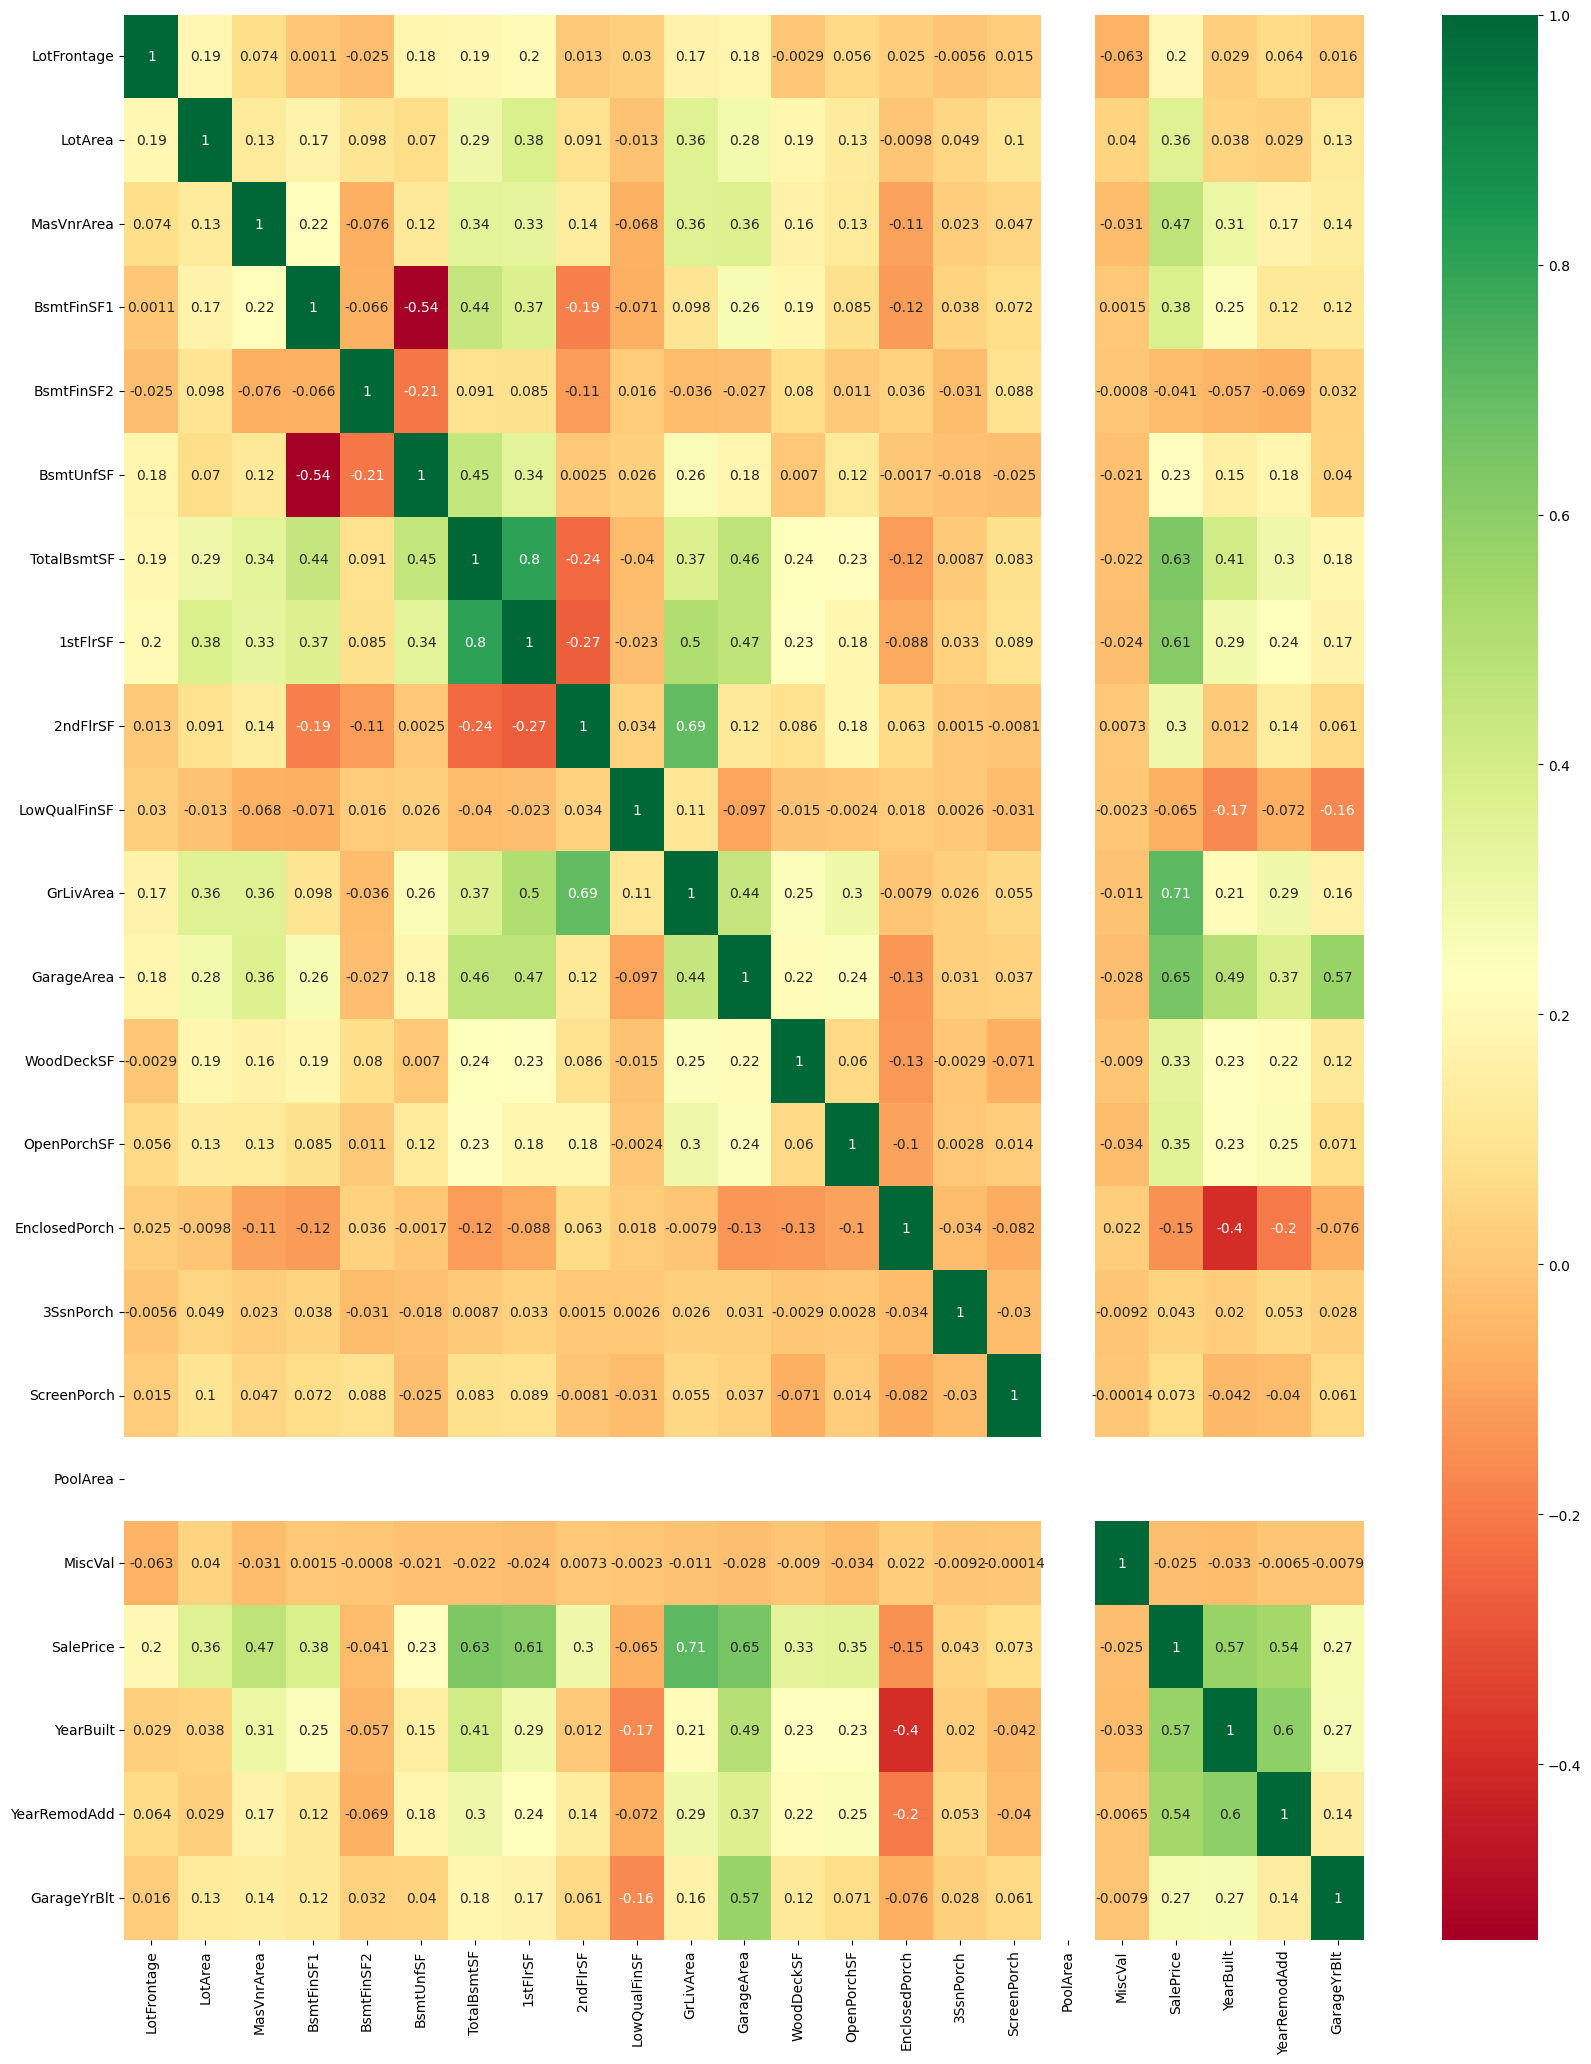

In [445]:
plt.figure(figsize=(20,25))
sns.heatmap(housing[numerical_columns].corr(), annot=True, cmap="RdYlGn")
plt.show()

## Insights
- Few Outliers data has been removed
- Different plots has been plotted for both continuous and categorical data with SalesPrice column

# 4. Data Preparation

### 4.1 Dummy variable creation

In [446]:

df = pd.DataFrame()
for col in categorical_columns:
    df = pd.concat([df, pd.get_dummies(housing[col], drop_first=True, prefix=col)], axis=1)

df.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER ALL STYLES  MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  MSSubClass_DUPLEX - ALL STYLES AND AGES  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                                         0                                0                                           0                                                  0                                                            0                                                  0                                   0                                0                                1                                      0                                        0                                                  0                        0                                0            0            0            1            0            1         1           0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1   
1                                         0                                0                                           1                                                  0                                                            0                                                  0                                   0                                0                                0                                      0                                        0                                                  0                        0                                0            0            0            1            0            1         1           0             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0   
2                                         0                                0                                           0                                                  0                                                            0                                                  0                                   0                                0                                1                                      0                                        0                                                  0                        0                                0            0            0            1            0            1         1           0             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1   
3                                         0                                

### Concat housing data with dummy variables

In [447]:

print(f'Initial shape of Housing - ', housing.shape)
housing = pd.concat([housing, df], axis=1)

print(f'Final shape of Housing post creation of Dummy variables - ', housing.shape)

Initial shape of Housing -  (1420, 78)
Final shape of Housing post creation of Dummy variables -  (1420, 378)


### Deleting the original fields of dummy variables

In [448]:

print('Initial shape of Housing BEFORE DROPPING- ', housing.shape)
housing.drop(categorical_columns, axis=1, inplace=True)

print('FINAL shape of Housing AFTER DROPPING- ', housing.shape)

Initial shape of Housing BEFORE DROPPING-  (1420, 378)
FINAL shape of Housing AFTER DROPPING-  (1420, 323)


## Converting the column data type as int

In [449]:
housing = housing.astype("int")

## Insights
- All categorical fields are considered for dummy variable creation
- The new dimension of data set after dummy creation is 1409 rows and 322 columns
- The original columns have been dropped

## 4.2 Spliting X and y

In [450]:
y = housing.pop('SalePrice')
X = housing

### Analyzing multicolinearity

In [451]:
## Getting the absolute values of the correlation
housing_corr = X.corr().abs()

# Select upper triangle of correlation matrix
upper_Matrix = housing_corr.where(np.triu(np.ones(housing_corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.70
columns_high_corr = [column for column in upper_Matrix.columns if any(upper_Matrix[column] > 0.70)]
len(columns_high_corr)

## Drop high colinerity features 
X.drop(columns_high_corr, axis=1, inplace=True)

## Insights
- Correlation table has been analyzed for any high correlation
- Have dropped the columns having high correlation 

### 4.3 Creating training and test set

In [452]:
# split into train and test

## The train test data set always have the same rows
np.random.seed(0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [453]:
print('Shape of X_train - ', X_train.shape)
print('Shape of y_train - ', y_train.shape)

print('Shape of X_test - ', X_test.shape)
print('Shape of y_test - ', y_test.shape)

Shape of X_train -  (993, 270)
Shape of y_train -  (993,)
Shape of X_test -  (426, 270)
Shape of y_test -  (426,)


## Insights
- The training and test set has been the ration of 70:30

### 4.4 scaling the features

In [454]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns


# ## transforming the test data
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [455]:
print(X_test.columns)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'], dtype='object', length=270)


## Insights
- All columns are converted to int type
- Minmax scaler is applied to the data set
- Train data is fit and transform
- Test data is transformed b scaling technique

# 5. Model Building and Evaluation

## Generic Functions to Calculate the Metrics

### Calculate Metrics Function

In [456]:
def get_metrics(y_pred_train_param, y_pred_test_param):
    
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train_param)
    print('r2_train_lr - ', r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test_param)
    print('r2_test_lr - ',r2_test_lr)
    metric.append(r2_test_lr)

    rss_train_lr = np.sum(np.square(y_train - y_pred_train_param))
    print('rss_train_lr - ',rss_train_lr)
    metric.append(rss_train_lr)

    rss_test_lr = np.sum(np.square(y_test - y_pred_test_param))
    print('rss_test_lr - ', rss_test_lr)
    metric.append(rss_test_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train_param)
    print('mse_train_lr - ',mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test_param)
    print('mse_test_lr - ',mse_test_lr)
    metric.append(mse_test_lr**0.5)
    
    return metric

### Linear Regression Metrics

In [457]:
def get_Linear_metrics(X_train_param, X_test_param):
    ## Predict the train and test set
    y_pred_train = lm.predict(X_train_param)
    y_pred_test = lm.predict(X_test_param)

    return get_metrics(y_pred_train, y_pred_test)

### Ridge Metrics

In [458]:
def get_ridge_metrics(X_train_param, X_test_param):
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    y_pred_train = ridge.predict(X_train_param)
    y_pred_test = ridge.predict(X_test_param)

    return get_metrics(y_pred_train, y_pred_test)

### LASSO Metrics

In [459]:
def get_lasso_metrics(X_train_param, X_test_param):
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    y_pred_train = lasso.predict(X_train_param)
    y_pred_test = lasso.predict(X_test_param)

    return get_metrics(y_pred_train, y_pred_test)

## Creating Compared Metrics Dataframe

In [460]:
def compared_metrics(lin_metric, ridge_metric, lasso_metric):
    # Creating a table which contain all the metrics

    lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': lin_metric
        }

    lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

    rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
    ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

    final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
    final_metric
    
    return final_metric

## Function to build Ridge model

In [461]:
def build_ridge_model(X_train_param, X_test_param):
    
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

    ridge = Ridge()

    # cross validation
    folds = 10
    model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
    
    print('CROSS VALIDATION')
    print('Number of folds :: ', folds)
    print('scoring :: neg_mean_absolute_error')
    
    ## Fitting the model
    print('X_train_param shape - ', X_train_param.shape)
    print('X_test_param shape - ', X_test_param.shape)
    print('y_train shape - ', y_train_param.shape)
    model_cv.fit(X_train_param, y_train) 
    

    # Printing the best hyperparameter alpha
    print('best hyperparameter alpha for  RIDGE :: ', model_cv.best_params_)
    best_alpha = model_cv.best_params_
    best_alpha_value = best_alpha.get('alpha')
    alpha = best_alpha_value


    #Fitting Ridge model for alpha 
    ridge = Ridge(alpha=alpha)

    ridge.fit(X_train_param, y_train_param)
    print(ridge.coef_)

    ## Lets calculate some metrics such as R2 score, RSS and RMSE
    print('Metrics for Ridge Model')
    ridge_metrics = get_ridge_metrics(X_train_param, X_test_param)
    return ridge_metrics

## Function to build LASSO model

In [462]:
def build_lasso_model(X_train_param, X_test_param):
    lasso = Lasso()

    folds = 10
    # cross validation
    model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
    print('CROSS VALIDATION')
    print('Number of folds :: ', folds)
    print('scoring :: neg_mean_absolute_error')
    
    ## fitting the model
    model_cv.fit(X_train_param, y_train) 
    

    # Printing the best hyperparameter alpha
    print('best hyperparameter alpha for  LASSO :: ',model_cv.best_params_)
    best_alpha = model_cv.best_params_
    best_alpha_value = best_alpha.get('alpha')
    alpha = best_alpha_value

    #Fitting Ridge model for alpha 
    lasso = Lasso(alpha=alpha)
        
    lasso.fit(X_train_param, y_train) 
    print(lasso.coef_)

    # Lets calculate some metrics such as R2 score, RSS and RMSE
    lasso_metrics = get_lasso_metrics(X_train_param, X_test_param)
    return lasso_metrics

In [463]:
## Calculation of VIF

def calculate_VIF(dataframe):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#  5.1 MODEL- A : Taking all the features

## MODEL - A Linear Regression model

In [464]:
# creating an object
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)
lm_lin_model_A_coef = lm.coef_

## Calculate the linear metrics
lin_metrics = get_Linear_metrics(X_train, X_test)

-116576.68441591147
[-2.46614711e+03  4.74856509e+04  7.76935755e+04  7.93354584e+03
  1.33709299e+04 -6.96683368e+16 -4.12375082e+16 -8.54754384e+16
  9.63428208e+16 -2.66417354e+03 -1.54811319e+04  1.73787086e+05
  7.56976179e+04  1.17256736e+04  1.10015358e+04  9.10358134e+03
  4.59520116e+03  1.26212543e+04  1.78487385e+04 -1.66698550e+16
  1.10544695e+04  1.14708283e+04  1.60454369e+04  5.99790709e+03
 -1.01437657e+04  2.76462707e+04 -5.44523795e+02  3.98160904e+04
  1.25235381e+04  2.37348699e+03 -1.19428635e+04 -1.41849217e+04
 -8.83102363e+03  3.72225000e+03  5.47400000e+03  1.12200000e+04
  2.78550000e+03  5.74400000e+03  5.61983750e+04 -6.02800000e+03
 -9.16000000e+03  5.00350000e+03 -9.26925000e+03  1.52200000e+03
  6.47400000e+03 -6.96600000e+03 -3.66000000e+02 -1.77853750e+04
  2.48500000e+03 -8.72600000e+03 -3.27062500e+03 -5.96000000e+02
  7.12200000e+03 -1.23025000e+04  8.50511182e+03  6.60650000e+03
  7.34650000e+03  6.86425000e+03 -3.34150000e+03  2.66870000e+04
 -7.7

In [465]:
calculate_VIF(X_train)

Features       VIF
5                                           BsmtFinSF1       inf
6                                           BsmtFinSF2       inf
7                                            BsmtUnfSF       inf
8                                          TotalBsmtSF       inf
12                                         GarageYrBlt  46391.31
230                                       GarageCars_2  26889.82
229                                       GarageCars_1  12195.95
231                                       GarageCars_3   6166.72
86                                     Condition2_Norm    782.23
38                                         Street_Pave    591.63
23          MSSubClass_1-STORY 1946 & NEWER ALL STYLES    349.99
193                                     BedroomAbvGr_3    232.88
29                     MSSubClass_2-STORY 1946 & NEWER    219.73
2                                            YearBuilt    201.07
215                   Functional_Typical Functionality    180.90
169                                       Heating_GasA    155.03
11                                           GrLivArea    148.43
192                                     BedroomAbvGr_2    103.20
232                                       GarageCars_4     98.67
21            MSSubClass_1-1/2 STORY FINISHED ALL AGES     96.06
194                                     BedroomAbvGr_4     64.40
13                                          GarageArea     60.86
39                                            Alley_NA     53.98
24   MSSubClass_1-STORY PUD (Planned Unit Developme...     50.21
177                                       CentralAir_Y     49.13
9                                             2ndFlrSF     48.85
30               MSSubClass_2-STORY PUD - 1946 & NEWER     48.01
78                                     Condition1_Norm     47.47
131                                Exterior1st_VinylSd     46.75
46                                     LandContour_Lvl     45.70
156                                        BsmtCond_TA     44.16
22                     MSSubClass_1-STORY 1945 & OLDER     43.03
34                     MSSubClass_SPLIT OR MULTI-LEVEL     42.41
28                     MSSubClass_2-STORY 1945 & OLDER     42.01
240                                   PavedDrive_Paved     41.72
37                                         MSZoning_RL     39.03
216                                       Fireplaces_1     37.98
31             MSSubClass_DUPLEX - ALL STYLES AND AGES     35.28
206                                     TotRmsAbvGrd_6     26.70
181                                   Electrical_SBrkr     24.98
27                     MSSubClass_2-1/2 STORY ALL AGES     23.48
127                                Exterior1st_MetalSd     21.96
125                                Exterior1st_HdBoard     21.04
220                                     FireplaceQu_Gd     20.91
205                                     TotRmsAbvGrd_5     20.19
26   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...     19.83
269                               SaleCondition_Normal     19.04
222                                     FireplaceQu_TA     18.58
132                                Exterior1st_Wd Sdng     18.45
1                                              LotArea     17.64
207                                     TotRmsAbvGrd_7     16.67
65                                  Neighborhood_NAmes     16.45
3                                         YearRemodAdd     16.38
191                                     BedroomAbvGr_1     15.87
33                              MSSubClass_SPLIT FOYER     15.77
70                                Neighborhood_OldTown     14.45
32   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...     12.77
223                                  GarageType_Attchd     10.71
204                                     TotRmsAbvGrd_4     10.23
128                                Exterior1st_Plywood     10.22
159                                    BsmtExposure_No     10.21
187             

### MODEL- A : Ridge Regularization 

In [466]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
    
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## Fitting the model
model_cv.fit(X_train, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  RIDGE :: ', model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value


#Fitting Ridge model for alpha 
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge_model_A_coef = ridge.coef_
ridge_coef_model_A = pd.DataFrame({"columns": X_train.columns, "ridge_coef": ridge_model_A_coef})
ridge_coef_model_A.sort_values(by="ridge_coef", key=abs, ascending=False, inplace=True)
print(ridge_coef_model_A)


## Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for Ridge Model for Model - A')
ridge_lin_metrics = get_ridge_metrics(X_train, X_test)


CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  RIDGE ::  {'alpha': 2.0}
                                               columns    ridge_coef
11                                           GrLivArea  90601.727468
101                         OverallQual_Very Excellent  52684.647388
97                               OverallQual_Excellent  48422.873836
8                                          TotalBsmtSF  47297.083286
2                                            YearBuilt  41751.795081
5                                           BsmtFinSF1  38995.305641
74                                Neighborhood_StoneBr  35483.606610
1                                              LotArea  31958.697860
102                              OverallQual_Very Good  25484.768468
264                                       SaleType_New  24958.576922
59                                Neighborhood_

### Insights of Model-A Ridge
- r2 score for train and test data are 0.948 and 0.892
- Optimal alpha value for Lasso came to be 2
- r2 score and mse having quite a gap, that means model performing different for training and test data

###  MODEL-A : LASSO

In [467]:
# lasso_lin_metrics = build_lasso_model(X_train, X_test) ## Function calling
lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## fitting the model
model_cv.fit(X_train, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  LASSO :: ',model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value

#Fitting Ridge model for alpha 
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso_model_A_coef = lasso.coef_

lasso_coef_model_A = pd.DataFrame({"columns": X_train.columns, "lass_coef_A": lasso_model_A_coef})
lasso_coef_model_A.sort_values(by="lass_coef_A", key=abs, ascending=False, inplace=True)
print(lasso_coef_model_A)

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model for Model - A')
lasso_lin_metrics = get_lasso_metrics(X_train, X_test)

CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  LASSO ::  {'alpha': 50}
                                               columns    lass_coef_A
11                                           GrLivArea  161670.188678
101                         OverallQual_Very Excellent   73550.747264
97                               OverallQual_Excellent   59400.376441
2                                            YearBuilt   54289.415029
8                                          TotalBsmtSF   48444.957073
74                                Neighborhood_StoneBr   34319.838640
1                                              LotArea   32715.861194
5                                           BsmtFinSF1   29465.342034
102                              OverallQual_Very Good   27961.265334
59                                Neighborhood_Crawfor   26625.878848
264                                  

### Creating a table which contain all the metrics

In [468]:
model_A_metrics = compared_metrics(lin_metrics, ridge_lin_metrics, lasso_lin_metrics)
model_A_metrics

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.531429e-01      9.473823e-01      9.451746e-01
1   R2 Score (Test)      -6.398987e+18      9.047404e-01      9.113917e-01
2       RSS (Train)       2.579967e+11      2.897149e+11      3.018703e+11
3        RSS (Test)       1.130252e+31      1.682569e+11      1.565087e+11
4       MSE (Train)       1.611879e+04      1.708090e+04      1.743555e+04
5        MSE (Test)       1.628856e+14      1.987383e+04      1.916746e+04

In [469]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm_lin_model_A_coef
betas['Ridge'] = ridge_model_A_coef
betas['Lasso'] = lasso_model_A_coef

betas.sort_values(by='Lasso', ascending=False, inplace=True)

pd.set_option('display.max_rows', None)
betas

Linear         Ridge          Lasso
GrLivArea                                           1.737871e+05  90601.727468  161670.188678
OverallQual_Very Excellent                          7.080869e+04  52684.647388   73550.747264
OverallQual_Excellent                               5.098875e+04  48422.873836   59400.376441
YearBuilt                                           7.769358e+04  41751.795081   54289.415029
TotalBsmtSF                                         9.634282e+16  47297.083286   48444.957073
Neighborhood_StoneBr                                4.167162e+04  35483.606610   34319.838640
LotArea                                             4.748565e+04  31958.697860   32715.861194
BsmtFinSF1                                         -6.966834e+16  38995.305641   29465.342034
OverallQual_Very Good                               2.598600e+04  25484.768468   27961.265334
Neighborhood_Crawfor                                2.668700e+04  22485.098176   26625.878848
SaleType_New                                        2.566900e+04  24958.576922   25903.705295
Neighborhood_NridgHt                                1.975525e+04  19005.502954   17060.583711
Street_Pave                                         5.619838e+04  22280.002641   16401.089756
Exterior1st_BrkFace                                 2.823100e+04  20072.343167   16062.424964
OverallCond_Excellent                               1.666750e+04  12605.710715   14706.038812
GarageArea                                          1.172567e+04  17130.397068   14383.953429
MasVnrArea                                          1.337093e+04  17889.975367   14271.317807
Neighborhood_NoRidge                                1.508200e+04  16801.690808   13143.553387
Functional_Typical Functionality                    1.047400e+04   9245.649165   13052.550683
GarageCars_3                                       -5.936600e+04   9253.584435   12435.305295
FullBath_3                                          9.200000e+03  15104.010027   11440.098928
BsmtExposure_Gd                                     1.068975e+04  12753.972135   11268.315049
YearRemodAdd                                        7.933546e+03  12332.844106   10404.473422
OpenPorchSF                                         9.103581e+03  11264.738946    9021.727261
OverallQual_Good                                    7.780000e+03   8186.872305    8997.859643
WoodDeckSF                                          1.100154e+04  12467.878005    8563.416922
ScreenPorch                                         1.784874e+04  10769.433471    8495.994860
OverallCond_Very Good                               9.903062e+03   6452.688422    8451.957600
OverallCond_Good                                    7.070000e+03   6772.730541    7699.516598
SaleCondition_Normal                                8.502000e+03   7399.316072    7275.180780
BsmtFinType1_GLQ                                    5.762000e+03   6840.659291    7184.210725
Exterior1st_CemntBd                                 1.264900e+04   9185.661112    6593.419032
BsmtFullBath_2                                      1.782225e+04   9265.846536    6576.646559
Neighborhood_ClearCr                                6.864250e+03   4911.277121    6553.093348
MSZoning_FV                                         1.122000e+04   7230.299265    5920.280475
HalfBath_1                                          5.940000e+03   9502.739671    5822.543917
LandContour_HLS                                     6.474000e+03   9665.144646    5526.913084
GarageType_BuiltIn                                  3.590000e+03   8880.764750    5495.834691
Condition1_Norm                                     1.078800e+04   7400.233613    5443.116596
Neighborhood_BrkSide                                7.346500e+03   1938.887555    5372.448965
Fireplaces_2                                        4.500500e+03  10534.299862    5302.911191
BedroomAbvGr_1                                      2.366000e+04   8930.376420    4808.083747
MSZoning_RL     

### Insights of Model-A Lasso
- r2 score for train and test data are 0.939 and 0.908
- Optimal alpha value for Lasso came to be 100
- mse and r2 score are quite near both for train and test set, model performing better

### Insights of Model-A
- Lasso seems to be having good r2 score and mse better than linaer and Ridge
- Lasso performs good both for train and test data set as compared to Ridge regression

# 5.2 MODEL- B1: Using RFE 

In [470]:
## Function to get the feature selection using RFE
def RFE_features(no_of_features):
    ### creation of a linearRegression object
    lrm = LinearRegression()

    ### Fitting the object
    lrm.fit(X_train, y_train)

    ### Applying the number of features to be considered
    rfe = RFE(lrm, n_features_to_select=no_of_features)
    rfe = rfe.fit(X_train, y_train)
    
    ### List of variables selected
    list(zip(X_train.columns, rfe.support_, rfe.ranking_))
    
   
    # selecting the selected variable via RFE in col list
    rfe_col = X_train.columns[rfe.support_]

    ## Train and test set for rfe_support features
    X_train_rfe2 = X_train[rfe_col]
    X_test_rfe2 = X_test[rfe_col]
       
    print(calculate_VIF(X_train_rfe2))
    
    return rfe_col

In [471]:
rfe_columns = RFE_features(280)

## Train and test set for rfe_support features
X_train_rfe = X_train[rfe_columns]
X_test_rfe = X_test[rfe_columns]

                                              Features       VIF
5                                           BsmtFinSF1       inf
6                                           BsmtFinSF2       inf
7                                            BsmtUnfSF       inf
8                                          TotalBsmtSF       inf
12                                         GarageYrBlt  46391.31
230                                       GarageCars_2  26889.82
229                                       GarageCars_1  12195.95
231                                       GarageCars_3   6166.72
86                                     Condition2_Norm    782.23
38                                         Street_Pave    591.63
23          MSSubClass_1-STORY 1946 & NEWER ALL STYLES    349.99
193                                     BedroomAbvGr_3    232.88
29                     MSSubClass_2-STORY 1946 & NEWER    219.73
2                                            YearBuilt    201.07
215                   Fun

In [472]:
##  removing high VIF values
VIF_data = calculate_VIF(X_train_rfe)


In [473]:
high_vif = VIF_data[VIF_data['VIF'] > 10]
high_VIF_features = high_vif['Features']

In [474]:
## Train and test set for low VIF
X_train_rfe = X_train_rfe.drop(high_VIF_features, axis=1)
X_test_rfe = X_test_rfe.drop(high_VIF_features, axis=1)

### MODEL- B1 : Ridge Regularization 

In [475]:
# ridge_b1_metrics = build_ridge_model(X_train_rfe, X_test_rfe)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
    
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## Fitting the model
model_cv.fit(X_train_rfe, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  RIDGE :: ', model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value


#Fitting Ridge model for alpha 
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge_model_B1_coef = ridge.coef_

ridge_coef_model_b1 = pd.DataFrame({"columns": X_train_rfe.columns, "ridge_coef_B1": ridge_model_B1_coef})
ridge_coef_model_b1.sort_values(by="ridge_coef_B1", key=abs, ascending=False, inplace=True)
print(ridge_coef_model_b1)

## Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for Ridge Model for Model - B1')
ridge_b1_metrics = get_ridge_metrics(X_train_rfe, X_test_rfe)


CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  RIDGE ::  {'alpha': 3.0}
                                          columns  ridge_coef_B1
69                     OverallQual_Very Excellent   78424.508887
65                          OverallQual_Excellent   76372.753792
70                          OverallQual_Very Good   46154.483695
44                           Neighborhood_StoneBr   40446.498883
39                           Neighborhood_NoRidge   37486.705710
1                                      MasVnrArea   36168.748021
31                           Neighborhood_Crawfor   33212.229102
40                           Neighborhood_NridgHt   30553.508503
204                                  SaleType_New   30113.908006
146                                    FullBath_3   28202.578132
3                                      WoodDeckSF   27955.846460
90                        

## Insights for Ridge for Model - B1
- Optimal value for Ridge remails same as Model A Ridge to be 2
- r2 score is reduced as compared to Model A 
- mse score has been increases
- overall this model not performing better as compared to model A

### Model-B1  LASSO

In [476]:
## Applying LASSO regularization
# lasso_b1_metrics = build_lasso_model(X_train_rfe, X_test_rfe)

lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## fitting the model
model_cv.fit(X_train_rfe, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  LASSO :: ',model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value

#Fitting Ridge model for alpha 
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso_model_B1_coef = lasso.coef_

lasso_coef_model_b1 = pd.DataFrame({"columns": X_train_rfe.columns, "lasso_coef_B1": lasso_model_B1_coef})
lasso_coef_model_b1.sort_values(by="lasso_coef_B1", key=abs, ascending=False, inplace=True)
print(lasso_coef_model_b1)

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model for Model - B1')
lasso_b1_metrics = get_lasso_metrics(X_train_rfe, X_test_rfe)

CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  LASSO ::  {'alpha': 100}
                                          columns  lasso_coef_B1
69                     OverallQual_Very Excellent  121361.495666
65                          OverallQual_Excellent   98775.935385
70                          OverallQual_Very Good   55986.166959
44                           Neighborhood_StoneBr   37274.484434
31                           Neighborhood_Crawfor   37042.406328
1                                      MasVnrArea   35821.418828
39                           Neighborhood_NoRidge   34276.387556
204                                  SaleType_New   30327.626789
146                                    FullBath_3   28855.420284
3                                      WoodDeckSF   25840.353222
66                               OverallQual_Fair  -24877.010301
40                        

## Insights for Lasso for Model - B1
- Optimal value for Lasso remails same as Model A to be 100
- r2 score is reduced as compared to Model A 
- mse score has been increases
- overall this model not performing better as compared to model A

In [477]:
# Creating a table which contain all the metrics
model_B1_metrics = compared_metrics(lin_metrics, ridge_b1_metrics, lasso_b1_metrics)

In [478]:

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm_lin_model_A_coef
betas['Ridge'] = ridge_model_A_coef
betas['Lasso'] = lasso_model_A_coef

betas.sort_values(by='Lasso', ascending=False, inplace=True)

pd.set_option('display.max_rows', None)
betas

Linear         Ridge          Lasso
GrLivArea                                           1.737871e+05  90601.727468  161670.188678
OverallQual_Very Excellent                          7.080869e+04  52684.647388   73550.747264
OverallQual_Excellent                               5.098875e+04  48422.873836   59400.376441
YearBuilt                                           7.769358e+04  41751.795081   54289.415029
TotalBsmtSF                                         9.634282e+16  47297.083286   48444.957073
Neighborhood_StoneBr                                4.167162e+04  35483.606610   34319.838640
LotArea                                             4.748565e+04  31958.697860   32715.861194
BsmtFinSF1                                         -6.966834e+16  38995.305641   29465.342034
OverallQual_Very Good                               2.598600e+04  25484.768468   27961.265334
Neighborhood_Crawfor                                2.668700e+04  22485.098176   26625.878848
SaleType_New                                        2.566900e+04  24958.576922   25903.705295
Neighborhood_NridgHt                                1.975525e+04  19005.502954   17060.583711
Street_Pave                                         5.619838e+04  22280.002641   16401.089756
Exterior1st_BrkFace                                 2.823100e+04  20072.343167   16062.424964
OverallCond_Excellent                               1.666750e+04  12605.710715   14706.038812
GarageArea                                          1.172567e+04  17130.397068   14383.953429
MasVnrArea                                          1.337093e+04  17889.975367   14271.317807
Neighborhood_NoRidge                                1.508200e+04  16801.690808   13143.553387
Functional_Typical Functionality                    1.047400e+04   9245.649165   13052.550683
GarageCars_3                                       -5.936600e+04   9253.584435   12435.305295
FullBath_3                                          9.200000e+03  15104.010027   11440.098928
BsmtExposure_Gd                                     1.068975e+04  12753.972135   11268.315049
YearRemodAdd                                        7.933546e+03  12332.844106   10404.473422
OpenPorchSF                                         9.103581e+03  11264.738946    9021.727261
OverallQual_Good                                    7.780000e+03   8186.872305    8997.859643
WoodDeckSF                                          1.100154e+04  12467.878005    8563.416922
ScreenPorch                                         1.784874e+04  10769.433471    8495.994860
OverallCond_Very Good                               9.903062e+03   6452.688422    8451.957600
OverallCond_Good                                    7.070000e+03   6772.730541    7699.516598
SaleCondition_Normal                                8.502000e+03   7399.316072    7275.180780
BsmtFinType1_GLQ                                    5.762000e+03   6840.659291    7184.210725
Exterior1st_CemntBd                                 1.264900e+04   9185.661112    6593.419032
BsmtFullBath_2                                      1.782225e+04   9265.846536    6576.646559
Neighborhood_ClearCr                                6.864250e+03   4911.277121    6553.093348
MSZoning_FV                                         1.122000e+04   7230.299265    5920.280475
HalfBath_1                                          5.940000e+03   9502.739671    5822.543917
LandContour_HLS                                     6.474000e+03   9665.144646    5526.913084
GarageType_BuiltIn                                  3.590000e+03   8880.764750    5495.834691
Condition1_Norm                                     1.078800e+04   7400.233613    5443.116596
Neighborhood_BrkSide                                7.346500e+03   1938.887555    5372.448965
Fireplaces_2                                        4.500500e+03  10534.299862    5302.911191
BedroomAbvGr_1                                      2.366000e+04   8930.376420    4808.083747
MSZoning_RL     

## Insights of Model- B1
- Lasso performed better than Ridge and linear regression
- However this model did not performed better than Model- A

# Model B2 - Different number of Features  in RFE : 150

In [479]:
## Getting RFE features
rfe_selected_columns = RFE_features(150)

## Train and test set for reduced rfe_support features
X_train_rfe2 = X_train[rfe_selected_columns]
X_test_rfe2 = X_test[rfe_selected_columns]

                                              Features       VIF
4                                           BsmtFinSF1       inf
5                                           BsmtFinSF2       inf
6                                            BsmtUnfSF       inf
7                                          TotalBsmtSF       inf
10                                         GarageYrBlt  37456.28
133                                       GarageCars_2  21611.21
132                                       GarageCars_1   9790.30
134                                       GarageCars_3   4957.71
29                                         Street_Pave    187.26
1                                            YearBuilt     98.22
135                                       GarageCars_4     79.47
108                                       Heating_GasA     73.05
11                                          GarageArea     46.45
9                                            GrLivArea     36.34
49                       

### Model B2: Ridge Regularization

In [480]:

# ridge_b2_metrics = build_ridge_model(X_train_rfe2, X_test_rfe2)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
    
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## Fitting the model
model_cv.fit(X_train_rfe2, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  RIDGE :: ', model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value


#Fitting Ridge model for alpha 
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe2, y_train)
ridge_model_B2_coef = ridge.coef_

ridge_coef_model_b2 = pd.DataFrame({"columns": X_train_rfe2.columns, "ridge_coef_B2": ridge_model_B2_coef})
ridge_coef_model_b2.sort_values(by="ridge_coef_B2", key=abs, ascending=False, inplace=True)
print(ridge_coef_model_b2)

## Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for Ridge Model for Model - B2')
ridge_b2_metrics = get_ridge_metrics(X_train_rfe2, X_test_rfe2)

CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  RIDGE ::  {'alpha': 0.6}
                                               columns  ridge_coef_B2
9                                            GrLivArea  169697.618792
1                                            YearBuilt   79957.996579
65                          OverallQual_Very Excellent   73782.045325
61                               OverallQual_Excellent   57379.446498
100                                    Foundation_Wood  -51131.749003
0                                              LotArea   47696.791737
47                                Neighborhood_StoneBr   44653.067938
29                                         Street_Pave   41488.169393
7                                          TotalBsmtSF   37085.666700
4                                           BsmtFinSF1   34543.508031
77                                  

### Insight for Ridge Model - B2
- Optimal value comes to be 0.4
- r2 score seems to be good for training set however quite a low for the test set
- mse seems to be low for train and high for test, looks like the mode is <b>overfitting</b>
- So overall not a good model

## Model B2 : LASSO

In [481]:

# lasso_b2_metrics = build_lasso_model(X_train_rfe2, X_test_rfe2)

lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## fitting the model
model_cv.fit(X_train_rfe2, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  LASSO :: ',model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value

#Fitting Ridge model for alpha 
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe2, y_train) 
lasso_model_B2_coef = lasso.coef_

lasso_coef_model_b2 = pd.DataFrame({"columns": X_train_rfe2.columns, "lasso_coef_B2": lasso_model_B2_coef})
lasso_coef_model_b2.sort_values(by="lasso_coef_B2", key=abs, ascending=False, inplace=True)
print(lasso_coef_model_b2)

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model for Model - B2')
lasso_b2_metrics = get_lasso_metrics(X_train_rfe2, X_test_rfe2)

CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  LASSO ::  {'alpha': 20}
                                               columns  lasso_coef_B2
9                                            GrLivArea  187049.458614
1                                            YearBuilt   84415.871493
65                          OverallQual_Very Excellent   78528.980087
61                               OverallQual_Excellent   59730.504832
100                                    Foundation_Wood  -58815.993088
0                                              LotArea   47448.245716
47                                Neighborhood_StoneBr   43548.794938
7                                          TotalBsmtSF   37887.905921
29                                         Street_Pave   37005.200231
4                                           BsmtFinSF1   32001.995138
94                                   

### Insight for Lasso Model - B2
- Optimal value comes to be 20
- r2 score seems to be good for training set however quite a low for the test set
- mse seems to be low for train and high for test, looks like the mode is <b>overfitting</b>
- So overall not a good model

In [482]:
# Creating a table which contain all the metrics
model_B2_metrics = compared_metrics(lin_metrics, ridge_b2_metrics, lasso_b2_metrics)

In [483]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm_lin_model_A_coef
betas['Ridge'] = ridge_model_A_coef
betas['Lasso'] = lasso_model_A_coef

betas.sort_values(by='Lasso', ascending=False, inplace=True)

pd.set_option('display.max_rows', None)
betas

Linear         Ridge          Lasso
GrLivArea                                           1.737871e+05  90601.727468  161670.188678
OverallQual_Very Excellent                          7.080869e+04  52684.647388   73550.747264
OverallQual_Excellent                               5.098875e+04  48422.873836   59400.376441
YearBuilt                                           7.769358e+04  41751.795081   54289.415029
TotalBsmtSF                                         9.634282e+16  47297.083286   48444.957073
Neighborhood_StoneBr                                4.167162e+04  35483.606610   34319.838640
LotArea                                             4.748565e+04  31958.697860   32715.861194
BsmtFinSF1                                         -6.966834e+16  38995.305641   29465.342034
OverallQual_Very Good                               2.598600e+04  25484.768468   27961.265334
Neighborhood_Crawfor                                2.668700e+04  22485.098176   26625.878848
SaleType_New                                        2.566900e+04  24958.576922   25903.705295
Neighborhood_NridgHt                                1.975525e+04  19005.502954   17060.583711
Street_Pave                                         5.619838e+04  22280.002641   16401.089756
Exterior1st_BrkFace                                 2.823100e+04  20072.343167   16062.424964
OverallCond_Excellent                               1.666750e+04  12605.710715   14706.038812
GarageArea                                          1.172567e+04  17130.397068   14383.953429
MasVnrArea                                          1.337093e+04  17889.975367   14271.317807
Neighborhood_NoRidge                                1.508200e+04  16801.690808   13143.553387
Functional_Typical Functionality                    1.047400e+04   9245.649165   13052.550683
GarageCars_3                                       -5.936600e+04   9253.584435   12435.305295
FullBath_3                                          9.200000e+03  15104.010027   11440.098928
BsmtExposure_Gd                                     1.068975e+04  12753.972135   11268.315049
YearRemodAdd                                        7.933546e+03  12332.844106   10404.473422
OpenPorchSF                                         9.103581e+03  11264.738946    9021.727261
OverallQual_Good                                    7.780000e+03   8186.872305    8997.859643
WoodDeckSF                                          1.100154e+04  12467.878005    8563.416922
ScreenPorch                                         1.784874e+04  10769.433471    8495.994860
OverallCond_Very Good                               9.903062e+03   6452.688422    8451.957600
OverallCond_Good                                    7.070000e+03   6772.730541    7699.516598
SaleCondition_Normal                                8.502000e+03   7399.316072    7275.180780
BsmtFinType1_GLQ                                    5.762000e+03   6840.659291    7184.210725
Exterior1st_CemntBd                                 1.264900e+04   9185.661112    6593.419032
BsmtFullBath_2                                      1.782225e+04   9265.846536    6576.646559
Neighborhood_ClearCr                                6.864250e+03   4911.277121    6553.093348
MSZoning_FV                                         1.122000e+04   7230.299265    5920.280475
HalfBath_1                                          5.940000e+03   9502.739671    5822.543917
LandContour_HLS                                     6.474000e+03   9665.144646    5526.913084
GarageType_BuiltIn                                  3.590000e+03   8880.764750    5495.834691
Condition1_Norm                                     1.078800e+04   7400.233613    5443.116596
Neighborhood_BrkSide                                7.346500e+03   1938.887555    5372.448965
Fireplaces_2                                        4.500500e+03  10534.299862    5302.911191
BedroomAbvGr_1                                      2.366000e+04   8930.376420    4808.083747
MSZoning_RL     

### Insights for Model- B2
- As compared to model A this model does not perform better

# Model B3 - Different number of Features  in RFE : 50

In [484]:
## Getting RFE features
rfe_selected_columns = RFE_features(50)

## Train and test set for reduced rfe_support features
X_train_rfe3 = X_train[rfe_selected_columns]
X_test_rfe3 = X_test[rfe_selected_columns]

                                   Features       VIF
2                                BsmtFinSF1       inf
3                                BsmtFinSF2       inf
4                                 BsmtUnfSF       inf
5                               TotalBsmtSF       inf
7                               GarageYrBlt  27122.11
44                             GarageCars_2  15594.27
43                             GarageCars_1   7051.93
45                             GarageCars_3   3576.32
46                             GarageCars_4     56.97
13                              Street_Pave     51.10
1                                 YearBuilt     40.52
8                                GarageArea     37.29
42         Functional_Typical Functionality     14.81
6                                 GrLivArea     14.11
11          MSSubClass_2-1/2 STORY ALL AGES      7.40
0                                   LotArea      7.27
23                        HouseStyle_2.5Unf      4.91
22                        Ho

### Model B2: Ridge Regularization

In [485]:


# ridge_b3_metrics = build_ridge_model(X_train_rfe3, X_test_rfe3)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
    
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## Fitting the model
model_cv.fit(X_train_rfe3, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  RIDGE :: ', model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value


#Fitting Ridge model for alpha 
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe3, y_train)
ridge_model_B3_coef = ridge.coef_

ridge_coef_model_b3 = pd.DataFrame({"columns": X_train_rfe3.columns, "ridge_coef_B3": ridge_model_B3_coef})
ridge_coef_model_b3.sort_values(by="ridge_coef_B3", key=abs, ascending=False, inplace=True)
print(ridge_coef_model_b3)

## Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for Ridge Model for Model - B3')
ridge_b3_metrics = get_ridge_metrics(X_train_rfe3, X_test_rfe3)

CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  RIDGE ::  {'alpha': 1.0}
                                    columns  ridge_coef_B3
6                                 GrLivArea  186219.723241
25               OverallQual_Very Excellent   79722.941437
1                                 YearBuilt   77109.748227
24                    OverallQual_Excellent   63392.151650
0                                   LotArea   50800.425303
18                     Neighborhood_StoneBr   41407.638618
2                                BsmtFinSF1   39852.669121
13                              Street_Pave   38277.477442
5                               TotalBsmtSF   36906.285387
12  MSSubClass_DUPLEX - ALL STYLES AND AGES  -36345.287089
15                     Neighborhood_Crawfor   34829.968342
27                    OverallCond_Excellent   27817.939930
35                        Exterior2nd_O

In [486]:

# lasso_b3_metrics = build_lasso_model(X_train_rfe3, X_test_rfe3)
lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## fitting the model
model_cv.fit(X_train_rfe3, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  LASSO :: ',model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value

#Fitting Ridge model for alpha 
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe3, y_train) 
lasso_model_B3_coef = lasso.coef_

lasso_coef_model_b3 = pd.DataFrame({"columns": X_train_rfe3.columns, "lasso_coef_B3": lasso_model_B3_coef})
lasso_coef_model_b3.sort_values(by="lasso_coef_B3", key=abs, ascending=False, inplace=True)
print(lasso_coef_model_b3)

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model for Model - B3')
lasso_b3_metrics = get_lasso_metrics(X_train_rfe3, X_test_rfe3)

CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  LASSO ::  {'alpha': 20}
                                    columns  lasso_coef_B3
6                                 GrLivArea  198328.950228
25               OverallQual_Very Excellent   88798.681940
1                                 YearBuilt   79766.375183
24                    OverallQual_Excellent   65183.818116
0                                   LotArea   51716.912126
18                     Neighborhood_StoneBr   41396.001446
13                              Street_Pave   39942.965184
5                               TotalBsmtSF   38442.241581
12  MSSubClass_DUPLEX - ALL STYLES AND AGES  -37690.404115
2                                BsmtFinSF1   37549.004383
15                     Neighborhood_Crawfor   33971.893939
35                        Exterior2nd_Other  -33878.544656
30                         RoofMatl_Memb

In [487]:
# Creating a table which contain all the metrics
model_B3_metrics = compared_metrics(lin_metrics, ridge_b3_metrics, lasso_b3_metrics)

In [488]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm_lin_model_A_coef
betas['Ridge'] = ridge_model_A_coef
betas['Lasso'] = lasso_model_A_coef

betas.sort_values(by='Lasso', ascending=False, inplace=True)

pd.set_option('display.max_rows', None)
betas

Linear         Ridge          Lasso
GrLivArea                                           1.737871e+05  90601.727468  161670.188678
OverallQual_Very Excellent                          7.080869e+04  52684.647388   73550.747264
OverallQual_Excellent                               5.098875e+04  48422.873836   59400.376441
YearBuilt                                           7.769358e+04  41751.795081   54289.415029
TotalBsmtSF                                         9.634282e+16  47297.083286   48444.957073
Neighborhood_StoneBr                                4.167162e+04  35483.606610   34319.838640
LotArea                                             4.748565e+04  31958.697860   32715.861194
BsmtFinSF1                                         -6.966834e+16  38995.305641   29465.342034
OverallQual_Very Good                               2.598600e+04  25484.768468   27961.265334
Neighborhood_Crawfor                                2.668700e+04  22485.098176   26625.878848
SaleType_New                                        2.566900e+04  24958.576922   25903.705295
Neighborhood_NridgHt                                1.975525e+04  19005.502954   17060.583711
Street_Pave                                         5.619838e+04  22280.002641   16401.089756
Exterior1st_BrkFace                                 2.823100e+04  20072.343167   16062.424964
OverallCond_Excellent                               1.666750e+04  12605.710715   14706.038812
GarageArea                                          1.172567e+04  17130.397068   14383.953429
MasVnrArea                                          1.337093e+04  17889.975367   14271.317807
Neighborhood_NoRidge                                1.508200e+04  16801.690808   13143.553387
Functional_Typical Functionality                    1.047400e+04   9245.649165   13052.550683
GarageCars_3                                       -5.936600e+04   9253.584435   12435.305295
FullBath_3                                          9.200000e+03  15104.010027   11440.098928
BsmtExposure_Gd                                     1.068975e+04  12753.972135   11268.315049
YearRemodAdd                                        7.933546e+03  12332.844106   10404.473422
OpenPorchSF                                         9.103581e+03  11264.738946    9021.727261
OverallQual_Good                                    7.780000e+03   8186.872305    8997.859643
WoodDeckSF                                          1.100154e+04  12467.878005    8563.416922
ScreenPorch                                         1.784874e+04  10769.433471    8495.994860
OverallCond_Very Good                               9.903062e+03   6452.688422    8451.957600
OverallCond_Good                                    7.070000e+03   6772.730541    7699.516598
SaleCondition_Normal                                8.502000e+03   7399.316072    7275.180780
BsmtFinType1_GLQ                                    5.762000e+03   6840.659291    7184.210725
Exterior1st_CemntBd                                 1.264900e+04   9185.661112    6593.419032
BsmtFullBath_2                                      1.782225e+04   9265.846536    6576.646559
Neighborhood_ClearCr                                6.864250e+03   4911.277121    6553.093348
MSZoning_FV                                         1.122000e+04   7230.299265    5920.280475
HalfBath_1                                          5.940000e+03   9502.739671    5822.543917
LandContour_HLS                                     6.474000e+03   9665.144646    5526.913084
GarageType_BuiltIn                                  3.590000e+03   8880.764750    5495.834691
Condition1_Norm                                     1.078800e+04   7400.233613    5443.116596
Neighborhood_BrkSide                                7.346500e+03   1938.887555    5372.448965
Fireplaces_2                                        4.500500e+03  10534.299862    5302.911191
BedroomAbvGr_1                                      2.366000e+04   8930.376420    4808.083747
MSZoning_RL     

## Metrics for MODEL - A :: Taking all the features

In [489]:
model_A_metrics

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.531429e-01      9.473823e-01      9.451746e-01
1   R2 Score (Test)      -6.398987e+18      9.047404e-01      9.113917e-01
2       RSS (Train)       2.579967e+11      2.897149e+11      3.018703e+11
3        RSS (Test)       1.130252e+31      1.682569e+11      1.565087e+11
4       MSE (Train)       1.611879e+04      1.708090e+04      1.743555e+04
5        MSE (Test)       1.628856e+14      1.987383e+04      1.916746e+04

## Metrics for MODEL - B1 :: Taking 280 features

In [490]:
model_B1_metrics

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.531429e-01      8.957223e-01      8.871658e-01
1   R2 Score (Test)      -6.398987e+18      8.139736e-01      8.337980e-01
2       RSS (Train)       2.579967e+11      5.741562e+11      6.212688e+11
3        RSS (Test)       1.130252e+31      3.285780e+11      2.935622e+11
4       MSE (Train)       1.611879e+04      2.404587e+04      2.501296e+04
5        MSE (Test)       1.628856e+14      2.777246e+04      2.625096e+04

## Metrics for MODEL - B2 :: Taking 150 features

In [491]:
model_B2_metrics

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.531429e-01      9.471519e-01      9.458872e-01
1   R2 Score (Test)      -6.398987e+18      9.051613e-01      9.047765e-01
2       RSS (Train)       2.579967e+11      2.909834e+11      2.979466e+11
3        RSS (Test)       1.130252e+31      1.675133e+11      1.681931e+11
4       MSE (Train)       1.611879e+04      1.711826e+04      1.732186e+04
5        MSE (Test)       1.628856e+14      1.982987e+04      1.987006e+04

## Metrics for MODEL - B3 :: Taking 50 features

In [492]:
model_B3_metrics

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.531429e-01      9.224383e-01      9.230672e-01
1   R2 Score (Test)      -6.398987e+18      8.864548e-01      8.847053e-01
2       RSS (Train)       2.579967e+11      4.270573e+11      4.235944e+11
3        RSS (Test)       1.130252e+31      2.005547e+11      2.036447e+11
4       MSE (Train)       1.611879e+04      2.073808e+04      2.065383e+04
5        MSE (Test)       1.628856e+14      2.169759e+04      2.186411e+04

## Insights
- The model having the best r2 score for both training and test set data is for model A
- Optimal value of <b>alpha</b> for <b>Ridge regularization model A</b> is <b>2</b>
- Optimal value of <b>alpha</b> for <b>Lasso regularization model A</b> is <b>100</b>
- Lasso regularization provided a better result as compared to Ridge
- <b>r2</b> score using <b>LASSO regularization</b> for train and test data is <b>0.939 and 0.908 </b>

# Analysis on the subjective Questions

###  Ridge regression - double aplha = 4

In [493]:
## Creating Ridge Object taking double aplha
ridge = Ridge(alpha=4)

#Fitting Ridge model 
ridge.fit(X_train, y_train)

ridge_model_double_alpha = ridge.coef_
ridge_model_double_alpha_df = pd.DataFrame({"columns": X_train.columns, "ridge_coef_double_aplha": ridge_model_double_alpha})
ridge_model_double_alpha_df.sort_values(by="ridge_coef_double_aplha", key=abs, ascending=False, inplace=True)
print(ridge_model_double_alpha_df.iloc[:10])


## Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for Ridge Model for Model - A')
ridge_lin_metrics = get_ridge_metrics(X_train, X_test)

ridge_model_double_alpha_df.shape

                        columns  ridge_coef_double_aplha
11                    GrLivArea             70836.615158
8                   TotalBsmtSF             45208.471539
97        OverallQual_Excellent             44977.052423
101  OverallQual_Very Excellent             42562.344057
5                    BsmtFinSF1             36737.512642
74         Neighborhood_StoneBr             33126.314062
2                     YearBuilt             30303.115135
1                       LotArea             25508.253799
102       OverallQual_Very Good             24396.558874
264                SaleType_New             24165.663157
Metrics for Ridge Model for Model - A
r2_train_lr -  0.9428287289078776
r2_test_lr -  0.9040062888831188
rss_train_lr -  314786888446.9717
rss_test_lr -  169553473735.53473
mse_train_lr -  317005929.9566684
mse_test_lr -  398012849.14444774


(270, 2)

### LASSO

### optimal value - 100

In [494]:
#Fitting lasso model for alpha 
lasso = Lasso(alpha=100)
        
lasso.fit(X_train, y_train) 
lasso_model_A_coef = lasso.coef_

lasso_coef_model_A = pd.DataFrame({"columns": X_train.columns, "lass_coef_A": lasso_model_A_coef})
lasso_coef_model_A.sort_values(by="lass_coef_A", key=abs, ascending=False, inplace=True)
print(lasso_coef_model_A.iloc[:10])

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model for Model - A')
lasso_lin_metrics = get_lasso_metrics(X_train, X_test)

lasso_features_df = lasso_coef_model_A[abs(lasso_coef_model_A['lass_coef_A']) > 0]
lasso_features_df.shape

                        columns    lass_coef_A
11                    GrLivArea  152476.338402
101  OverallQual_Very Excellent   72498.870852
97        OverallQual_Excellent   62464.094787
8                   TotalBsmtSF   51306.241933
2                     YearBuilt   44627.705944
74         Neighborhood_StoneBr   32890.713704
102       OverallQual_Very Good   29508.305361
5                    BsmtFinSF1   29411.580599
59         Neighborhood_Crawfor   27993.517908
264                SaleType_New   26232.069412
Metrics for LASSO Model for Model - A
r2_train_lr -  0.9388820519949308
r2_test_lr -  0.9142410034754902
rss_train_lr -  336517420607.6113
rss_test_lr -  151475920616.29547
mse_train_lr -  338889648.1446237
mse_test_lr -  355577278.44200814


(118, 2)

### double aplha - 200

In [495]:
lasso = Lasso(alpha=200)
        
lasso.fit(X_train, y_train) 
lasso_model_double_aplha = lasso.coef_

lasso_model_double_aplha_df = pd.DataFrame({"columns": X_train.columns, "lass_coef_double_alpha": lasso_model_double_aplha})
lasso_model_double_aplha_df.sort_values(by="lass_coef_double_alpha", key=abs, ascending=False, inplace=True)
print(lasso_model_double_aplha_df.iloc[:10])

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model double alpha')
get_lasso_metrics(X_train, X_test)

lasso_features_double_alpha_df = lasso_model_double_aplha_df[abs(lasso_model_double_aplha_df['lass_coef_double_alpha']) > 0]
lasso_features_double_alpha_df.shape

                        columns  lass_coef_double_alpha
11                    GrLivArea           144994.960156
101  OverallQual_Very Excellent            64282.156309
97        OverallQual_Excellent            63547.126651
8                   TotalBsmtSF            54366.180058
2                     YearBuilt            31985.489378
102       OverallQual_Very Good            29810.078240
5                    BsmtFinSF1            28258.401242
74         Neighborhood_StoneBr            27881.742434
59         Neighborhood_Crawfor            26839.082349
264                SaleType_New            26311.323566
Metrics for LASSO Model double alpha
r2_train_lr -  0.9292776006555519
r2_test_lr -  0.9115152329948789
rss_train_lr -  389399843800.4032
rss_test_lr -  156290442820.05414
mse_train_lr -  392144857.80503845
mse_test_lr -  366878973.75599563


(77, 2)

### Important feature removal

In [496]:
## Getting 5 most important features

#Fitting lasso model for alpha 
lasso = Lasso(alpha=100)
        
lasso.fit(X_train, y_train) 
lasso_model_A_coef = lasso.coef_

lasso_coef_model_A = pd.DataFrame({"columns": X_train.columns, "lass_coef_A": lasso_model_A_coef})
lasso_coef_model_A.sort_values(by="lass_coef_A", key=abs, ascending=False, inplace=True)

## Printing 5 important predictors
lasso_imp_5_features = (lasso_coef_model_A.iloc[:5])['columns']
print(list(lasso_imp_5_features))

['GrLivArea', 'OverallQual_Very Excellent', 'OverallQual_Excellent', 'TotalBsmtSF', 'YearBuilt']


In [497]:
## removing importatnt features from X_train
X_train_new = X_train.drop(lasso_imp_5_features, axis=1)
X_test_new = X_test.drop(lasso_imp_5_features, axis=1)

In [498]:
## New model

# lasso_lin_metrics = build_lasso_model(X_train_new, X_test) ## Function calling
lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
print('CROSS VALIDATION')
print('Number of folds :: ', folds)
print('scoring :: neg_mean_absolute_error')
    
## fitting the model
model_cv.fit(X_train_new, y_train) 
    

# Printing the best hyperparameter alpha
print('best hyperparameter alpha for  LASSO :: ',model_cv.best_params_)
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha.get('alpha')
alpha = best_alpha_value

#Fitting lasso model for alpha 
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
lasso_new_model_coef = lasso.coef_

lasso_new_model_df = pd.DataFrame({"columns": X_train_new.columns, "lass_new_model_coef": lasso_new_model_coef})
lasso_new_model_df.sort_values(by="lass_new_model_coef", key=abs, ascending=False, inplace=True)
print(lasso_new_model_df[:5])


lasso_new_model_features = (lasso_new_model_df.iloc[:5])['columns']
print(list(lasso_new_model_features))

# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Metrics for LASSO Model removing features')
get_lasso_metrics(X_train_new, X_test_new)


CROSS VALIDATION
Number of folds ::  10
scoring :: neg_mean_absolute_error
Fitting 10 folds for each of 28 candidates, totalling 280 fits
best hyperparameter alpha for  LASSO ::  {'alpha': 50}
                 columns  lass_new_model_coef
4             BsmtFinSF1        107598.598451
6              BsmtUnfSF        102478.812941
71  Neighborhood_StoneBr         52807.660028
7               2ndFlrSF         48886.458105
1                LotArea         43024.276825
['BsmtFinSF1', 'BsmtUnfSF', 'Neighborhood_StoneBr', '2ndFlrSF', 'LotArea']
Metrics for LASSO Model removing features
r2_train_lr -  0.9259109516579586
r2_test_lr -  0.8803395279488804
rss_train_lr -  407936723289.0167
rss_test_lr -  211356019775.06268
mse_train_lr -  410812410.1601377
mse_test_lr -  496140891.49075747


[0.9259109516579586,
 0.8803395279488804,
 407936723289.0167,
 211356019775.06268,
 20268.507842466788,
 22274.220334071346]